<h1 style='color: blue; font-size: 50px; font-weight: bold;'> Case Data Master 2024 - Leonardo Aderaldo Vargas - T789785
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
</p>  

O Case proposto apresenta o histórico de dois anos (2015-2017) de uma empresa que oferece serviço de streaming de música baseado em assinatura.

Quando os usuários se inscrevem no serviço, eles podem optar por renovar o serviço manualmente ou renovar automaticamente. Os usuários podem cancelar ativamente sua associação a qualquer momento. 

Para este cenário, temos os seguintes desafios:

1) Problema de Classificação:

- Sabendo que existe a seguinte ação de retenção para clientes: Quando detectamos que um cliente não renova a assinatura, oferecemos 3 meses grátis. Porém, identificamos que essa ação é muito reativa e entendemos que uma abordagem proativa seria mais efetiva.
- Sendo assim, é proposto que você crie um modelo classificador para prever clientes que serão um churn 3 meses no futuro (ou seja, clientes que possuem assinatura ativa no período analisado e 3 meses depois desse período ele não é mais ativo, ou porque cancelou ou não renovou a assinatura) e indique os clientes que serão direcionados para ação de forma proativa
- Assumindo que, usando a ação de forma proativa, 50% dos clientes que iriam cancelar (Verdadeiro Positivo) respondem de forma positiva e continuam ativos por mais um ano, qual sua avaliação sobre sua solução?
- Mínimo esperado: Criação de Target, Feature Engineering, Feature Selection, Predictive Modeling, Quantidade de clientes retidos e resultado financeiro da ação.


2) Problema de Clusterização

- Considerando o problema escolhido (Churn), realize uma análise não-supervisionada dos clientes com objetivo de aprofundar a compreensão sobre características deles.

- Algumas sugestões: análise de clientes com diferentes perfis de uso da plataforma, com as variadas estimações de churn, análise de perfis com diferentes volatidade/incerteza nas respostas de churn, análise de erros sistemáticos cometidos pelos modelos do case supervisionado, análise da variação temporal no comportamento dos clientes da base.


<h1 style='color: Orange; font-size: 50px; font-weight: bold;'> Pontos de Desenvolvimento do Case
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
</p>  

### 1) Criação de Target

- Criar a regra da Target

### 2) Separação de Amostras

- Separação de um conjunto de dados de Treino, Validação, Teste e OOT
- Em cada amostra, conferir se elas são similares. Nessa etapa, posso ver tanto a distribuição de Target quanto compará-las através de Testes de Hipótese como chi2 ou KS

### 3) Análise Exploratória

- Identificar quantas variáveis contínuas e categóricas temos em percentual através de um gráfico de barras
- Identificar qual a porcentagem de valores ausentes em cada variável através de um gráfico de barras
- Para variáveis contínuas: analisar correlação entre as variáveis, analisar distribuição via boxplot a fim de entender se há diferença significativa nas distribuiçoes de cada feature para a Target 0 ou 1, presença de outliers via IIQ...
- Para variáveis categóricas: analisar as distribuições de cada categoria, analisar o Weight of Evidence a fim de entender a relação com a target ou usar testes de chi2...

### 4) Feature Engineering

> 1. Desenvolver features factíveis, úteis e criativas para o meu problema

### 5) Pré-Processamento

> 1. Aplicar Target Encoder através do WOE para as categóricas

> 2. Entender qual método de imputação usarei e se usarei algo...

> 3. Para variáveis contínuas, manter apenas instâncias entre o p1 e o p99 para eliminar erros

> 4. Fazer um cálculo de PSI para as variáveis contínuas e categóricas a fim de garantir features estáveis e, consequentemente, predições estáveis

> 5. Aplicar Escolanemento

### 6) Feature Selection

> 1. Para variáveis contínuas: aplicar o Variance Threshold e eliminar variáveis altamente correlacionadas

> 2. Para variáveis categóricas: aplicar o WOE e calcular um IV, mantendo apenas as categóricas com IV alto

> 3. Rodar uma Random Forest Feature Importance para fazer o filtro final

### 7) Classificador

> 1.  Treinar uma Regressão Logística, Random Forest e um XGBoost
> 2. Fazer otimização de hiperparâmetros
> 3. Fazer calibração de probabilidades
> 4. Definir o threshold de decisão para classes 0 ou 1

### 8) Análise de Resultados

> 1. Responder as questões propostas

### 9) Clusterização

> 1. Fazer um não supervisionado que seja capaz de inferir algo próximo ao classificador e discutir as mudanças
> 2. Testarei um KMeans, Hierarquico ou DBSCAN a depender da natureza dos meus dados


<font color='purple' style='font-size: 40px;'> Bibliotecas </font>
<hr style='border: 2px solid purple;'>

In [1]:

## Bibliotecas de Análise de Dados
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image
from tabulate import tabulate
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Bibliotecas de Manipulação de Tempo
from datetime import datetime, date

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform, chi2_contingency
from statsmodels.stats.weightstats import ztest
from numpy import interp
import random

# Bibliotecas de Seleção de Modelos
from skopt import BayesSearchCV

# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Bibliotecas de Modelos de Machine Learning
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Bibliotecas de Métricas de Machine Learning
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, precision_recall_curve, average_precision_score, f1_score, log_loss, brier_score_loss, confusion_matrix, silhouette_score


# Parâmetros de Otimização
import random
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F
 

# # Spark Session
# spark = SparkSession.builder.getOrCreate()

<font color='yellow' style='font-size: 40px;'> Importação de Dados </font>
<hr style='border: 2px solid yellow;'>

### 1) Base Members

> 1. msno: user id

> 2. city: cidade

> 3. bd: idade --> essa coluna tem outliers desde -7000 até 2015

> 4. registered_via: tipo de registro

> 5. registration_init_time: data do registro inicial no formato %Y%m%d

> 6. gender: gênero

> 7. is_ativo: assinatura ativa (Target Classificador Problema 1)

> 8. safra: safra

### 2) Base Transacations

> 1. msno: user id

> 2. payment_method_id: método de pagamento

> 3. payment_plan_days: quantidade de dias de afiliação

> 4. plan_list_price: preço

> 5. actual_amount_paid: montante pago

> 6. is_auto_renew: flag renovação automática

> 7. transaction_date: data da transação no formato %Y%m%d

> 8. membership_expire_date: data de expiração da afiliação

> 9. is_cancel: flag que indica se o usuário cancelou ou não a afiliação nesta transação

### 3) Base User Logs

> 1. msno: user id

> 2. safra

> 3. num_25: quantidade de músicas tocadas por menos de 25% da duração da música

> 4. num_50: quantidade de músicas tocadas entre 25% e 50% da duração da música

> 5. num_75: quantidade de músicas tocadas entre 50% e 75% da duração da música

> 6. num_985: quantidade de músicas tocadas entre 75% até 98.5% da duração da música

> 7. num_100: quantidade de músicas tocadas entre 98.5% até 100% da duração da música

> 8. num_unq: quantidade única de músicas já tocadas

> 9. total_scs: número total de segundos tocados

<font color='red' style='font-size: 40px;'> 1) Definição da Target</font>
<hr style='border: 2px solid red;'>

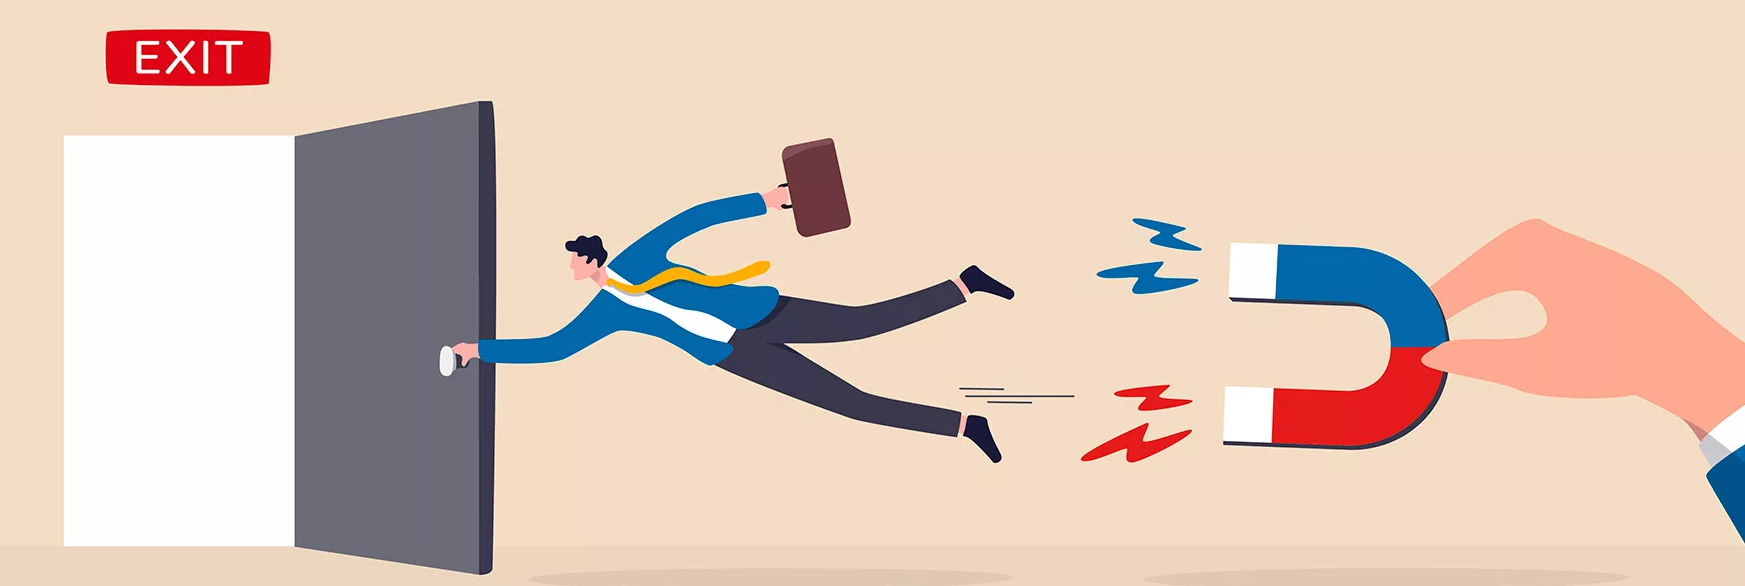

# <font color='green' style='font-size: 30px;'> 1.1) Detecção dos Clientes que podem ter TARGET - Seleção de apenas amostra com ao menos 1 mês como cliente</font>
<hr style='border: 2px solid green;'>

> 1. Como a base possui muitos clientes, decidiu-se avaliar quais já contraram a assinatura em um mês pelo menos.

> 2. Clientes que nunca contraram nunca foram ativos, logo, não deveriam entrar no nosso modelo de Churn


In [2]:
tabela_de_membros = pd.read_parquet('../00_DataMaster/data/members.parquet')[["msno", "safra", "is_ativo"]]
membros_que_tem_pelo_menos_uma_marcacao_de_ativo = tabela_de_membros.groupby("msno", as_index = False)["is_ativo"].sum().rename({"is_ativo":"quantidade_de_meses_de_atividade"}, axis = 1)
membros_que_tem_pelo_menos_uma_marcacao_de_ativo = membros_que_tem_pelo_menos_uma_marcacao_de_ativo.loc[membros_que_tem_pelo_menos_uma_marcacao_de_ativo["quantidade_de_meses_de_atividade"] > 0]

quantidade_de_meses_de_atividade = int(membros_que_tem_pelo_menos_uma_marcacao_de_ativo["msno"].nunique())

print(f"A quantidade de clientes com pelo menos um mês de assinatura é {quantidade_de_meses_de_atividade}")

A quantidade de clientes com pelo menos um mês de assinatura é 1563999


# <font color='green' style='font-size: 30px;'> 1.2) Amostragem Aleatória de 30% do Público para desenvolvimento do Case - Apenas clientes que foram ativos em pelo menos 1 mês </font>
<hr style='border: 2px solid green;'>

> 1. Como o case apresenta em torno de 1.5MM de clientes que já contraram uma assinatura, decidiu-se aplicar uma amostragem aleatória de 30% do público para o desenvolvimento

> 2. A justificativa de criar uma amostra se dá pelo fato da base verdadeira ser muito grande, impossibilitando de ser trabalhada em sua totalidade por limitações de hardware

> 3. Pela Lei dos Grandes Números, sabe-se que à medida que o tamanho da amostra aumenta, o valor esperado das observações da amostra se aproxima do valor esperado da população.

> 4. Sendo assim, pelo tamanho suficiente da amostra, sabe-se que ela assemelha-se muito a população, garantindo que todo o case possa ser analisado através de uma amostra.


In [3]:
amostra_aleatoria = membros_que_tem_pelo_menos_uma_marcacao_de_ativo[["msno"]].drop_duplicates().sample(frac = 0.3, random_state = 42, replace = False)
amostra_aleatoria.to_parquet("../00_DataMaster/data/amostra_aleatoria.parquet", index = False)

# <font color='green' style='font-size: 30px;'> 1.3) Criação da Target</font>
<hr style='border: 2px solid green;'>

> 1. Para a criação da Target, avaliou-se se o cliente era ativo em M e deixou de ser ou em M+1, M+2 ou M+3

> 2. Posteriormente, excluiu-se da amostra as observações de clientes inativos, pois elas não possuem informações relevantes

> 3. Além disso, decidiu-se retirar do desenvolvimento do case as amostras da safra 2016-12-01, pois elas não possuem Target e, portanto, não podemos avaliar nenhum tipo de performance em cima desses casos

In [4]:
### Amostra de Desenvolvimento + Base de Membros
amostra_aleatoria = pd.read_parquet("../00_DataMaster/data/amostra_aleatoria.parquet")
tabela_de_membros = pd.read_parquet('../00_DataMaster/data/members.parquet')[["msno", "safra", "is_ativo"]]

### Puxando Informações de safra e atividade para a amostra
amostra_aleatoria_com_target = amostra_aleatoria.merge(tabela_de_membros, on = ["msno"], how = "left").sort_values(by = ["msno", "safra"], ascending = True)
#amostra_aleatoria_com_target['safra'] = pd.to_datetime(amostra_aleatoria_com_target['safra'], format='%Y%m')

# Criar as colunas de verificação para os próximos 3 meses
amostra_aleatoria_com_target['ativo_M+1'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-1)
amostra_aleatoria_com_target['ativo_M+2'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-2)
amostra_aleatoria_com_target['ativo_M+3'] = amostra_aleatoria_com_target.groupby('msno')['is_ativo'].shift(-3)

# MARCAÇÃO DE CHURN E NÃO CHURN
amostra_aleatoria_com_target["churn"] = np.where(
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+1'] == 0) | 
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+2'] == 0) |
    (amostra_aleatoria_com_target['is_ativo'] == 1) & (amostra_aleatoria_com_target['ativo_M+3'] == 0),
    1,  ### MARCAÇÃO DE CHURN
    0   ### MARCAÇÃO DE NÃO CHURN
)

amostra_aleatoria_com_target.tail(12)

msno   safra  is_ativo  ativo_M+1  ativo_M+2  ativo_M+3  churn
2807397  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201601         1       1.00       0.00       0.00      1
2807407  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201602         1       0.00       0.00       0.00      1
2807402  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201603         0       0.00       0.00       0.00      0
2807406  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201604         0       0.00       0.00       1.00      0
2807401  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201605         0       0.00       1.00       1.00      0
2807403  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201606         0       1.00       1.00       1.00      0
2807398  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201607         1       1.00       1.00       1.00      0
2807396  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201608         1       1.00       1.00       1.00      0
2807404  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201609         1       1.00       1.00       1.00      0
2807400  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201610         1       1.00       1.00        NaN      0
2807399  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201611         1       1.00        NaN        NaN      0
2807405  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201612         1        NaN        NaN        NaN      0

# <font color='green' style='font-size: 30px;'> 1.4) Análise da Target</font>
<hr style='border: 2px solid green;'>

> 1. Como exposto nos gráficos abaixo, a distribuição entre clientes com CHURN e sem CHURN não é proporcional, portanto, estaremos lidando com um problema de desbalanceamento de classes e isso deverá ser tratado futuramente

> 2. Percebe-se também a presença de uma volatilidade nas safras 201601, 201602 e 201611. Aparentemente, o motivo dessa volatidade provavelmente é um Mix de Público:

- Os dois primeiros meses concentram muitos clientes com CHURN
- os último mês concentra poucos clientes com CHURN, mas é o mês com maior quantidade de pessoas, ou seja, entraram muitos clientes. Isso é um alerta pois não temos como ver 3 meses a frente se todos são CHURN, ou seja, marcaríamos o cliente como CHURN ou NÃO CHURN com apenas 1 mês de análise

> 3. Decidiu-se eliminar as observações de clientes marcados como inativos pois eles não fornecem informação útil e podem poluir a análise (clientes que não são ativos são marcados como não churn, mas ele sequer é cliente!)


In [5]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo, rotation):        

    k = 0
    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
    ax.set_title(f'{titulo}')
    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
    ax.set_ylabel(f'Quantidade', fontsize = 14)
    total = []
    for bar in ax.patches:
        height = bar.get_height()
        total.append(height)
    total = builtins.sum(total)
    
    sizes = []
    for bar in ax.patches:
        height = bar.get_height()
        sizes.append(height)
        ax.text(bar.get_x() + bar.get_width()/1.6,
                height,
                f'{builtins.round((height/total)*100, 2)}%',
                ha = 'center',
                fontsize = 12
        )
    ax.set_ylim(0, builtins.max(sizes)*1.1)
    ax.set_xticklabels(df[lista_variaveis[k]].unique(), rotation = rotation, ha='right', fontsize=10)
    # Formatação manual dos rótulos do eixo y para remover a notação científica
    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)
    # Adicionamos os nomes das categorias no eixo x
    ax.set_xticklabels(ax.get_xticklabels(), ha='right', fontsize=10)

    plt.tight_layout()
    plt.show()

In [6]:
def plota_grafico_linhas(df, x, y, nao_calcula_media, title):

    if nao_calcula_media:
        # Criando o gráfico de linha
        plt.figure(figsize=(10, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        media = df[y].mean()
        # Criando o gráfico de linha
        plt.figure(figsize=(10, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando linha da média
        plt.axhline(y=media, color='r', linestyle='--', linewidth=1, label=f'Média: {media:.2f}')
        plt.legend()

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

A quantidade de amostras com Churn é 484523
A quantidade de amostras sem Churn é 2598854


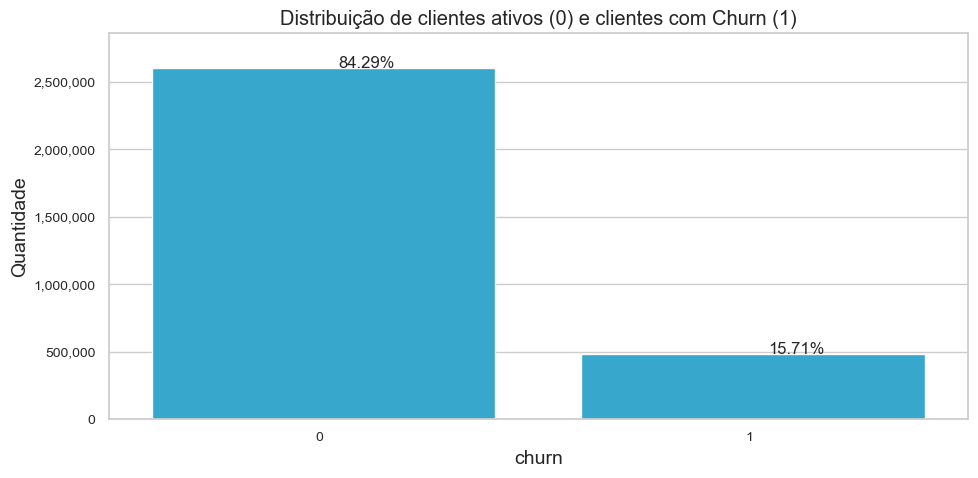

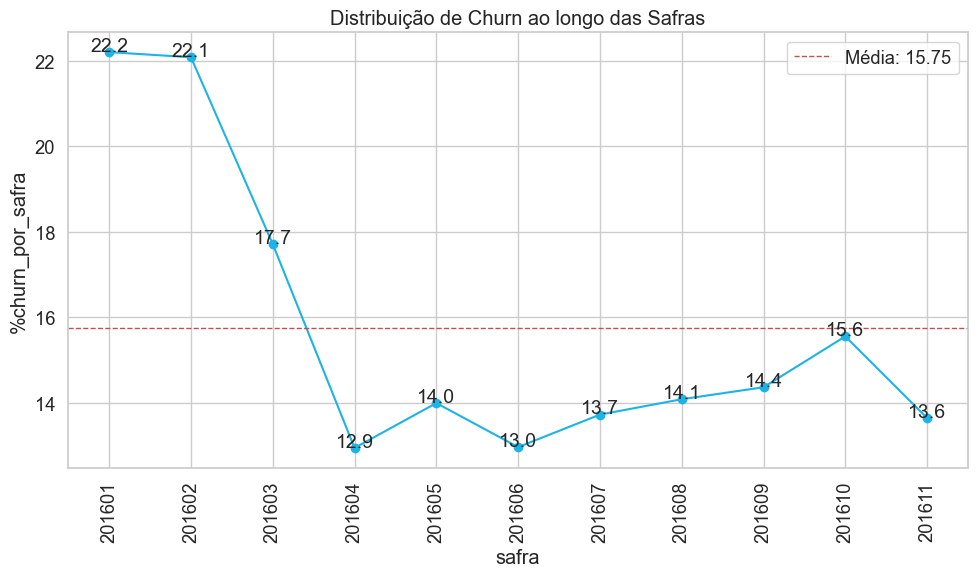

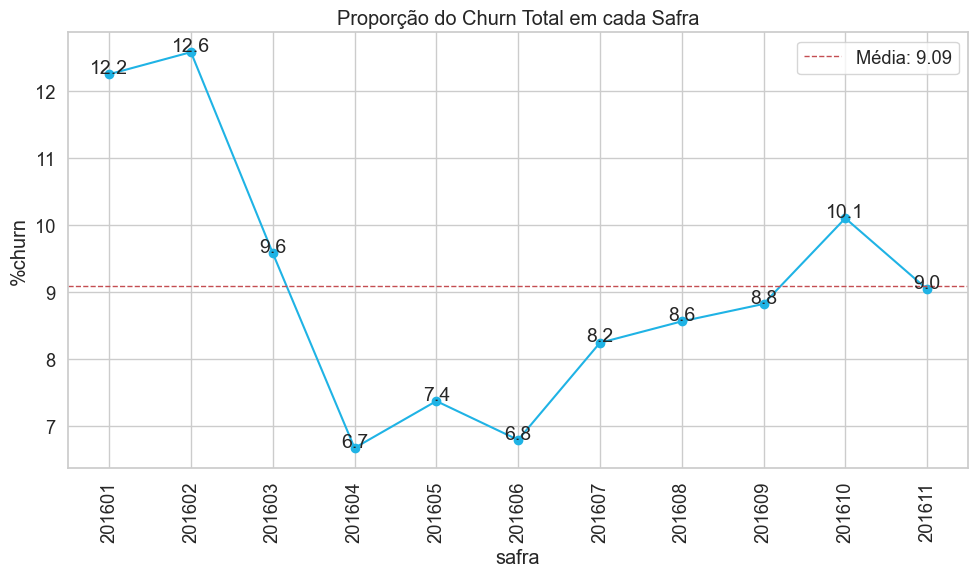

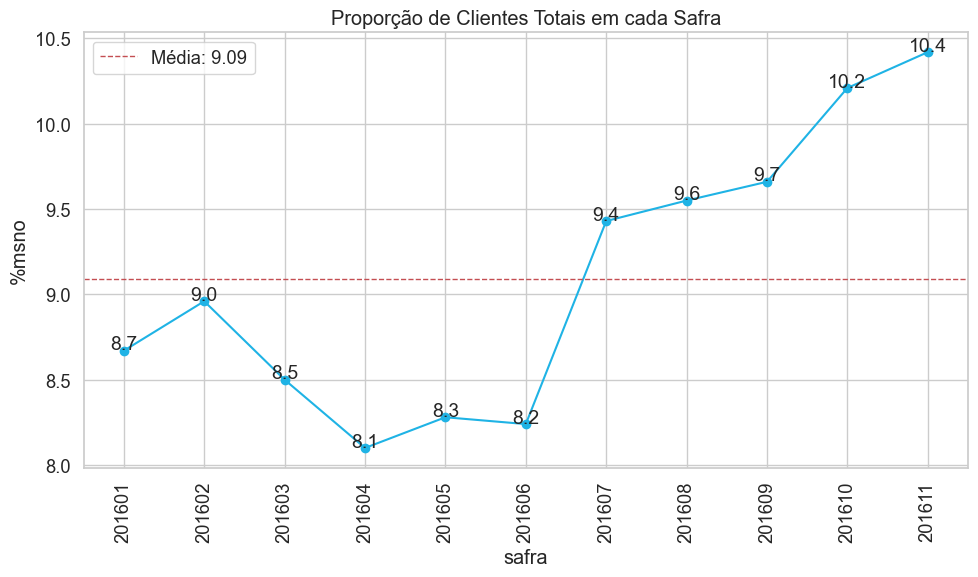

In [7]:
# RETIRANDO A SAFRA DE 2016-12-01 POIS ELA NÃO POSSUI TARGET

amostra_aleatoria_com_target = amostra_aleatoria_com_target.loc[(amostra_aleatoria_com_target["safra"] != "201612") & (amostra_aleatoria_com_target["is_ativo"] == 1)]
#amostra_aleatoria_com_target["safra"] = amostra_aleatoria_com_target["safra"].apply(lambda x: x.strftime('%Y%m'))

# VOLUMETRIA
quantidade_de_amostras_com_churn = amostra_aleatoria_com_target.loc[amostra_aleatoria_com_target["churn"] == 1].shape[0]
quantidade_de_amostras_sem_churn = amostra_aleatoria_com_target.loc[amostra_aleatoria_com_target["churn"] == 0].shape[0]

print(f"A quantidade de amostras com Churn é {quantidade_de_amostras_com_churn}")
print(f"A quantidade de amostras sem Churn é {quantidade_de_amostras_sem_churn}")

plota_barras(['churn'], False, amostra_aleatoria_com_target, 1, 1, 'Distribuição de clientes ativos (0) e clientes com Churn (1)', 0)

# VOLUMETRIA AO LONGO DAS SAFRAS
churn_por_safra = amostra_aleatoria_com_target[["msno", "safra", "churn"]].groupby("safra").agg({"churn":"sum", "msno":"count"}).reset_index()
churn_por_safra["total_churn"] = churn_por_safra["churn"].sum()
churn_por_safra["total_msno"] = churn_por_safra["msno"].sum()
churn_por_safra["%churn_por_safra"] = round(churn_por_safra["churn"]/churn_por_safra["msno"]*100, 2)
churn_por_safra["%churn"] = round((churn_por_safra["churn"]/churn_por_safra["total_churn"])*100, 2)
churn_por_safra["%msno"] = round((churn_por_safra["msno"]/churn_por_safra["total_msno"])*100, 2)

plota_grafico_linhas(churn_por_safra, "safra", "%churn_por_safra", False, "Distribuição de Churn ao longo das Safras")
plota_grafico_linhas(churn_por_safra, "safra", "%churn", False, "Proporção do Churn Total em cada Safra")
plota_grafico_linhas(churn_por_safra, "safra", "%msno", False, "Proporção de Clientes Totais em cada Safra")

In [8]:
amostra_aleatoria_com_target[["msno", "safra", "churn"]].to_parquet("../00_DataMaster/data/amostra_aleatoria_com_target.parquet", index = False)

<font color='red' style='font-size: 40px;'> 2) Seleção das Amostras de Treinamento, Validação, Teste e OOT </font>
<hr style='border: 2px solid red;'>

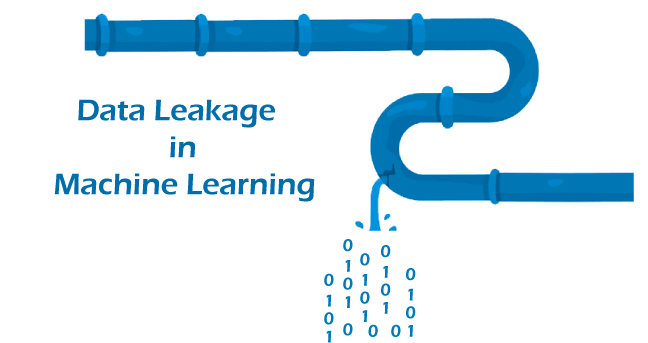

# <font color='green' style='font-size: 30px;'> 2.1) Puxando informações para a amostra aleatória </font>
<hr style='border: 2px solid green;'>

> 1. Como selecionamos uma amostra aleatória, devemos puxar as demais variáveis para iniciarmos efetivamente o case

> 2. Embora hajam safras mais antigas para as tabelas de Transações e User Logs, para as análises iniciais, optou-se por garantir manter as variáveis no mesmo intervalo temporal da Target (201601~201611)


In [9]:
# Amostra Aleatória
amostra_aleatoria_com_target = pd.read_parquet("../00_DataMaster/data/amostra_aleatoria_com_target.parquet")
amostra_aleatoria_com_target["safra"] = amostra_aleatoria_com_target["safra"].apply(lambda x:str(x))

# Tabela de Membros
tabela_de_membros = pd.read_parquet("../00_DataMaster/data/members.parquet").drop("is_ativo", axis = 1)
tabela_de_membros["safra"] = tabela_de_membros["safra"].apply(lambda x:str(x))

# Tabela de Transações
tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes.loc[tabela_de_transacoes["safra"].isin(['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609', '201610', '201611'])]

# Tabela de User Logs
tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs.loc[tabela_user_logs["safra"].isin(['201601', '201602', '201603', '201604', '201605', '201606','201607', '201608', '201609', '201610', '201611'])]


In [10]:
df_case_data_masters = amostra_aleatoria_com_target.merge(tabela_de_membros, on = ["msno", "safra"], how = "left")
df_case_data_masters = df_case_data_masters.merge(tabela_de_transacoes, on = ["msno", "safra"], how = "left")
df_case_data_masters = df_case_data_masters.merge(tabela_user_logs, on = ["msno", "safra"], how = "left")

In [11]:
df_case_data_masters

msno   safra  churn registration_init_time city  bd  gender registered_via payment_method_id payment_plan_days plan_list_price actual_amount_paid is_auto_renew transaction_date membership_expire_date is_cancel  num_25  num_50  num_75  num_985  num_100  num_unq  total_secs
0        +++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=  201611      0               20140608    1   0    None              7                41                30              99                 99             1         20161116               20161215         0  128.00   71.00   50.00   101.00   470.00   488.00   148668.07
1        ++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=  201603      0               20160315   18  21    male              7                41                30             149                149             1         20160315               20160415         0   52.00    7.00   16.00    20.00   273.00   101.00    76357.19
2        ++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=  201604      0               20160315   18  21    male              7                41                30             149                149             1         20160415               20160515         0  245.00   56.00   50.00    92.00   858.00   917.00   248566.52
3        ++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=  201605      0               20160315   18  21    male              7                41                30             149                149             1         20160515               20160615         0  156.00   37.00   28.00    21.00   343.00   363.00   101241.81
4        ++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=  201606      0               20160315   18  21    male              7                41                30             149                149             1         20160615               20160715         0  122.00   40.00   25.00    26.00   604.00   365.00   168964.18
...                                               ...     ...    ...                    ...  ...  ..     ...            ...               ...               ...             ...                ...           ...              ...                    ...       ...     ...     ...     ...      ...      ...      ...         ...
3083372  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201607      0               20140611    4  48  female              9                39                30             149                149             1         20160731               20160924         0   13.00    3.00    2.00     4.00   119.00   132.00    32597.06
3083373  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201608      0               20140611    4  48  female              9                39                30             149                149             1         20160831               20161024         0   33.00   14.00    4.00     4.00   135.00   142.00    37684.99
3083374  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201609      0               20140611    4  48  female              9                39                30             149                149             1         20160930               20161124         0   77.00   17.00   10.00     6.00   113.00   189.00    36214.65
3083375  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201610      0               20140611    4  48  female              9                39                30             149                149             1         20161031               20161224         0   17.00    3.00    3.00     1.00    66.00    85.00    18055.72
3083376  zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=  201611      0               20140611    4  48  female              9                39                30             149                149             1         20161130               20170124         0    4.00    5.00    1.00     1.00     8.00    17.00     3092.74

[3083377 rows x 23 columns]

In [12]:
df_case_data_masters.to_parquet("../00_DataMaster/data/df_case_data_masters.parquet", index = False)

# <font color='green' style='font-size: 30px;'> 2.2) Separação em Treino, Validação, Teste e OOT </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 201603 e 201609, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 201610,

> 3. Escolheu-se treinar o modelo com 201603 ~ 201609 para termos uma distribuiçao de churn relativamente constante ao longo dos meses; ao passo que 201610 ficou como OOT para avaliarmos se o modelo performa bem em cenários atípicos um pouco atípicos (início da mudança de Mix de P[ublico])

### Considerações

-  '201601', --> Distribuição de Churn muito distinta
-  '201602', --> Distribuição de Churn muito distinta
-  '201603', --> TRAINING/TESTE
-  '201604', --> TRAINING/TESTE
-  '201605', --> TRAINING/TESTE
-  '201606', --> TRAINING/TESTE
-  '201607', --> TRAINING/TESTE
-  '201608', --> TRAINING/TESTE
-  '201609', --> TRAINING/TESTE
-  '201610', --> OOT
-  '201611', --> Safra Arriscada para ser usada como Target pois analisaríamos com apenas 1 mês a frente
-  '201612' --> Não tem Target

In [13]:
df_case_data_masters = pd.read_parquet("../00_DataMaster/data/df_case_data_masters.parquet")

amostra_treino_validacao = (
    df_case_data_masters
        .loc[~df_case_data_masters["safra"].isin(["201601", "201602", "201610", "201611"])]
        [["msno"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["msno"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["msno"].isin(list(train["msno"].unique()))]
    [["msno"]]
    .drop_duplicates()
)

test = (
    df_case_data_masters
        .loc[
            (~df_case_data_masters["safra"].isin(["201601", "201602", "201610", "201611"])) & 
            (~df_case_data_masters["msno"].isin(list(train["msno"].unique()))) & 
            (~df_case_data_masters["msno"].isin(list(valid["msno"].unique())))
        ]
        [["msno"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

oot = (
    df_case_data_masters
        .loc[df_case_data_masters["safra"].isin(["201610"])]
        [["msno"]]
        .drop_duplicates()
)


print(f"A quantidade de IDs distintos no Treino (201603~201609) é: {train.shape[0]}")
print(f"A quantidade de IDs distintos na Validação (201603~201609) é: {valid.shape[0]}")
print(f"A quantidade de IDs distintos no Teste (201603~201609) é: {test.shape[0]}")
print(f"A quantidade de IDs distintos no OOT (201610) é: {oot.shape[0]}")



A quantidade de IDs distintos no Treino (201603~201609) é: 271604
A quantidade de IDs distintos na Validação (201603~201609) é: 30178
A quantidade de IDs distintos no Teste (201603~201609) é: 60357
A quantidade de IDs distintos no OOT (201610) é: 314728


In [14]:
df_train = train.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201602", "201610", "201611"])], on = "msno", how = "left")
df_valid = valid.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201602", "201610", "201611"])], on = "msno", how = "left")
df_test = test.merge(df_case_data_masters.loc[~df_case_data_masters["safra"].isin(["201601", "201602", "201610", "201611"])], on = "msno", how = "left")
df_oot = oot.merge(df_case_data_masters.loc[df_case_data_masters["safra"].isin(["201610"])], on = "msno", how = "left")

print(f"A quantidade de amostras no Treino (201603~201609) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (201603~201609) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (201603~201609) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (201610) é: {df_oot.shape[0]}")

A quantidade de amostras no Treino (201603~201609) é: 1370504
A quantidade de amostras na Validação (201603~201609) é: 151938
A quantidade de amostras no Teste (201603~201609) é: 304886
A quantidade de amostras no OOT (201610) é: 314728


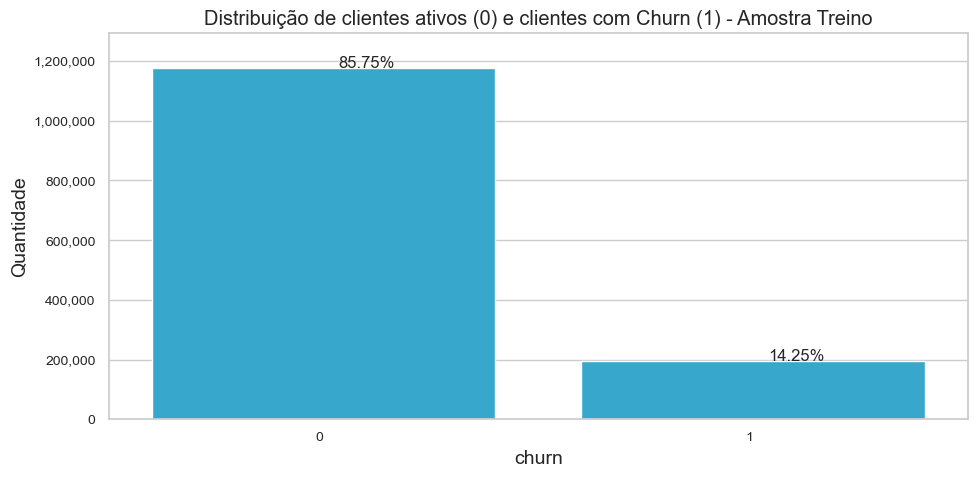

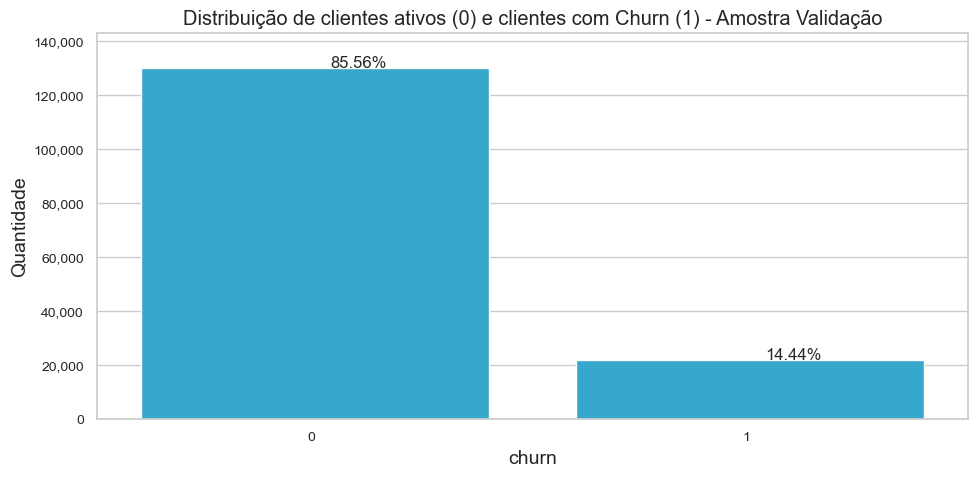

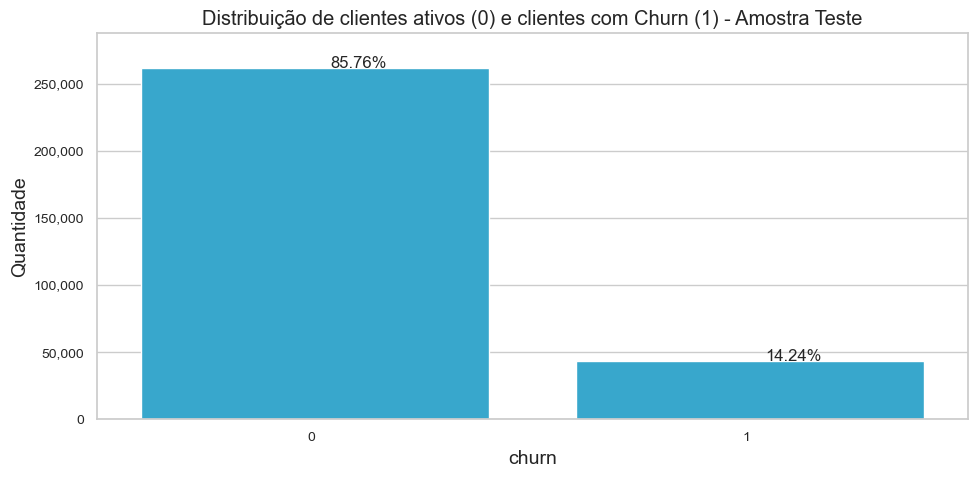

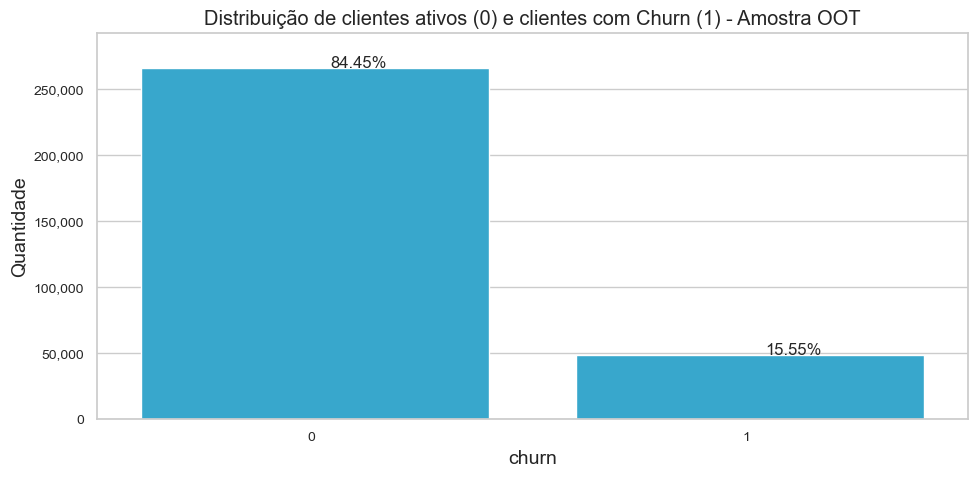

In [15]:
amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]
i = 0
for amostra in amostras:

    plota_barras(['churn'], False, amostra, 1, 1, f'Distribuição de clientes ativos (0) e clientes com Churn (1) - Amostra {tipo[i]}', 0)

    i = i + 1

In [16]:
df_train.to_parquet("../00_DataMaster/data/df_train.parquet", index = False)
df_valid.to_parquet("../00_DataMaster/data/df_valid.parquet", index = False)
df_test.to_parquet("../00_DataMaster/data/df_test.parquet", index = False)
df_oot.to_parquet("../00_DataMaster/data/df_oot.parquet", index = False)

<font color='red' style='font-size: 40px;'> 3)  Análise Exploratória - Feita apenas com a Amostra de **TREINO**</font>
<hr style='border: 2px solid red;'>

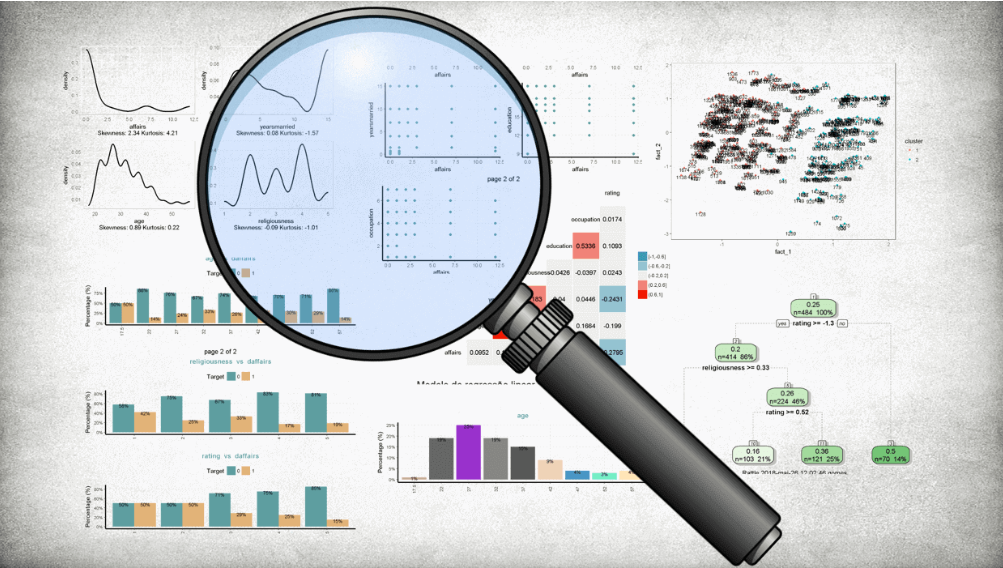

In [17]:
df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")
df_valid = pd.read_parquet("../00_DataMaster/data/df_valid.parquet")
df_test = pd.read_parquet("../00_DataMaster/data/df_test.parquet")
df_oot = pd.read_parquet("../00_DataMaster/data/df_oot.parquet")

colunas_ordenadas = [
    "msno", "churn", "safra", 'is_cancel',
    'is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id', 
    'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
    "registration_init_time", "transaction_date", "membership_expire_date"
] 

df_train = df_train[colunas_ordenadas]
df_valid = df_valid[colunas_ordenadas]
df_test = df_test[colunas_ordenadas]
df_oot = df_oot[colunas_ordenadas]

# <font color='green' style='font-size: 30px;'> 3.1) Identificação de tipos de variáveis </font>
<hr style='border: 2px solid green;'>

> 1. Inicialmente, decidiu-se analisar quantos valores distintos há em cada variável

> 2. Variáveis com menos valores distintos tendem a ser categóricas, ao passo que muitos valores distintos tendem a ser contínuas

> 3. Além disso, somado a descrição da variável, pode-se inferir seu tipo com mais acurácia

> 4. Notou-se também que algumas variáveis estão em um formato não condizente (idade em string, por exemplo). Para corrigir isso, modificou-se o tipo das variáveis de maneira a corrigí-las.

> 5. Sendo assim, definiu-se que:

- variaveis_categoricas = ['is_auto_renew', 'is_cancel', 'gender', 'registered_via', 'city', 'payment_method_id']
- variaveis_continuas = ['payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']
- variaveis_de_data = ["registration_init_time", "transaction_date", "membership_expire_date"]
- safra = ["safra"]
- target = ["churn"]
- user_id = ["msno"]

- Identificação do tipo de cada variável

In [18]:
# Dados das variáveis e suas descrições
data = {
    'base': [
        'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members', 'Base Members',
        'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions', 'Base Transactions',
        'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs', 'Base User Logs'
    ],
    'variavel': [
        'msno', 'city', 'bd', 'registered_via', 'registration_init_time', 'gender', 'is_ativo', 'safra',
        'msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'transaction_date', 'membership_expire_date', 'is_cancel',
        'msno', 'safra', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'
    ],
    'descricao': [
        'user id', 'cidade', 'idade --> essa coluna tem outliers desde -7000 até 2015', 'tipo de registro', 'data do registro inicial no formato %Y%m%d', 'gênero', 'assinatura ativa (Target Classificador Problema 1)', 'safra',
        'user id', 'método de pagamento', 'quantidade de dias de afiliação', 'preço', 'montante pago', 'flag renovação automática', 'data da transação no formato %Y%m%d', 'data de expiração da afiliação', 'flag que indica se o usuário cancelou ou não a afiliação nesta transação',
        'user id', 'safra', 'quantidade de músicas tocadas por menos de 25% da duração da música', 'quantidade de músicas tocadas entre 25% e 50% da duração da música', 'quantidade de músicas tocadas entre 50% e 75% da duração da música', 'quantidade de músicas tocadas entre 75% até 98.5% da duração da música', 'quantidade de músicas tocadas entre 98.5% até 100% da duração da música', 'quantidade única de músicas já tocadas', 'numero total de segundos tocados'
    ]
}

df_variaveis_descricoes = pd.DataFrame(data)

# Dados dos tipos das variáveis
target = ["churn"]
user_id = ["msno"]
variaveis_de_data = ["safra", "registration_init_time", "transaction_date", "membership_expire_date"]
variaveis_categoricas_continuas = {}

for var in df_train.drop(target + user_id + variaveis_de_data, axis=1).columns:
    variaveis_categoricas_continuas[var] = int(df_train[var].nunique())

variaveis_categoricas_continuas_df = pd.DataFrame(list(variaveis_categoricas_continuas.items()), columns=['variavel', 'numero_valores_unicos']).sort_values(by = "numero_valores_unicos", ascending = True)
variaveis_categoricas_continuas_df = variaveis_categoricas_continuas_df.merge(df_variaveis_descricoes, on = "variavel", how = "left")

display(variaveis_categoricas_continuas_df)
display(pd.DataFrame(df_train.dtypes).reset_index().rename({"index":"variavel", 0:"tipagem"}, axis = 1))


variavel  numero_valores_unicos               base                                                                 descricao
0            is_cancel                      2  Base Transactions  flag que indica se o usuário cancelou ou não a afiliação nesta transação
1        is_auto_renew                      2  Base Transactions                                                 flag renovação automática
2               gender                      2       Base Members                                                                    gênero
3       registered_via                      6       Base Members                                                          tipo de registro
4                 city                     21       Base Members                                                                    cidade
5    payment_plan_days                     26  Base Transactions                                           quantidade de dias de afiliação
6    payment_method_id                     34  Base Transactions                                                       método de pagamento
7   actual_amount_paid                     39  Base Transactions                                                             montante pago
8      plan_list_price                     39  Base Transactions                                                                     preço
9                   bd                    164       Base Members                   idade --> essa coluna tem outliers desde -7000 até 2015
10              num_75                    504     Base User Logs        quantidade de músicas tocadas entre 50% e 75% da duração da música
11              num_50                    809     Base User Logs        quantidade de músicas tocadas entre 25% e 50% da duração da música
12             num_985                    905     Base User Logs    quantidade de músicas tocadas entre 75% até 98.5% da duração da música
13              num_25                   2514     Base User Logs       quantidade de músicas tocadas por menos de 25% da duração da música
14             num_unq                   5631     Base User Logs                                    quantidade única de músicas já tocadas
15             num_100                   7193     Base User Logs   quantidade de músicas tocadas entre 98.5% até 100% da duração da música
16          total_secs                1220160     Base User Logs                                          numero total de segundos tocados

variavel  tipagem
0                     msno   object
1                    churn    int32
2                    safra   object
3                is_cancel   object
4            is_auto_renew   object
5                   gender   object
6           registered_via   object
7                     city   object
8        payment_method_id   object
9        payment_plan_days   object
10         plan_list_price   object
11      actual_amount_paid   object
12                      bd   object
13                  num_25  float64
14                  num_50  float64
15                  num_75  float64
16                 num_985  float64
17                 num_100  float64
18                 num_unq  float64
19              total_secs  float64
20  registration_init_time   object
21        transaction_date   object
22  membership_expire_date   object

In [19]:
def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]


In [20]:
df_train["is_auto_renew"] = changing_feature_type(df_train, "is_auto_renew", "int")
df_train["is_cancel"] = changing_feature_type(df_train, "is_cancel", "int")
df_train["bd"] = changing_feature_type(df_train, "bd", "int")
df_train["registered_via"] = changing_feature_type(df_train, "registered_via", "int")
df_train["payment_plan_days"] = changing_feature_type(df_train, "payment_plan_days", "float")
df_train["plan_list_price"] = changing_feature_type(df_train, "plan_list_price", "float")
df_train["actual_amount_paid"] = changing_feature_type(df_train, "actual_amount_paid", "float")

In [21]:
variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
variaveis_continuas = ['payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs']
variaveis_de_data = ["registration_init_time", "transaction_date", "membership_expire_date"]
is_cancel = ['is_cancel']
safra = ["safra"]
target = ["churn"]
user_id = ["msno"]

# <font color='green' style='font-size: 30px;'> 3.2) Identificação inconsistências nas variáveis </font>
<hr style='border: 2px solid green;'>

> 1. Muitas variáveis possuem diversos valores nulos

> 2. Ao que tudo indica, existem três tipos de nulos:

- Variáveis cadastrais nulas
- Variáveis de consumo nulas
- Variáveis cadastrais e de consumo nulas

> 3. Na etapa de pré-processamento devemos levar isso em consideração e tratá-los de alguma forma

- Quantidade de registros nulos na base 

Existem 20 variáveis no Dataset
Existem 4 variáveis sem registros nulos no Dataset


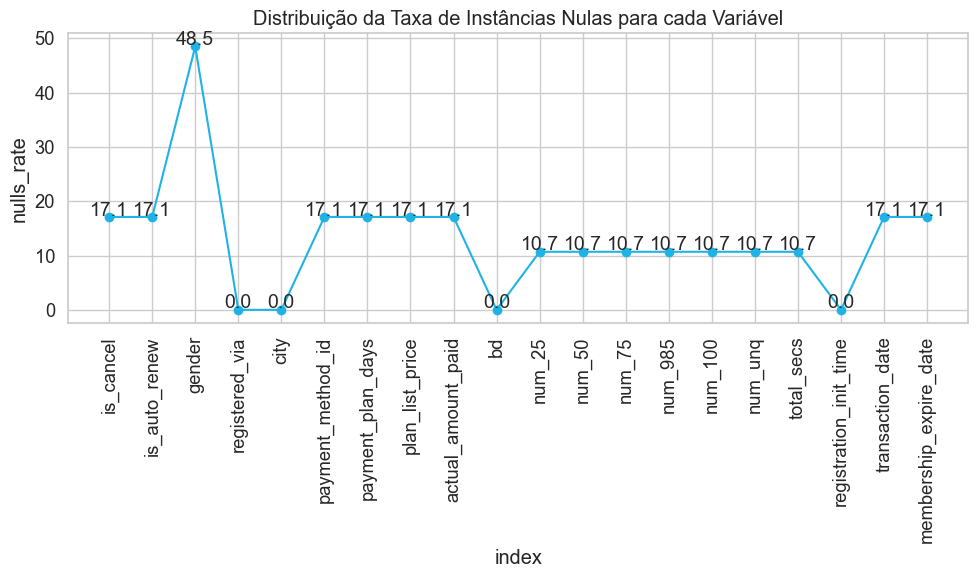

In [22]:
df_nulls = (
    pd.DataFrame(
        df_train
        .drop(["msno", "safra", "churn"], axis = 1)
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_train.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

In [23]:
# print("Tipo 1 - Clientes com variáveis 'cadastrais' nulas")
# display(df_train.loc[(df_train["actual_amount_paid"].isna()) & (~df_train["num_25"].isna())].head(10))
# print()
# print("Tipo 2 - Clientes com variáveis 'de consumo' nulas")
# display(df_train.loc[(~df_train["actual_amount_paid"].isna()) & (df_train["num_25"].isna())].head(10))
# print()
# print("Tipo 3 - Clientes com variáveis 'cadastrais' e 'de consumo' nulas")
# display(df_train.loc[(df_train["actual_amount_paid"].isna()) & df_train["num_25"].isna()].head(10))

# <font color='green' style='font-size: 30px;'> 3.3) Análise de Variáveis Contínuas </font>
<hr style='border: 2px solid green;'>

> 1. Nesta etapa, objetiva-se entender o padrão das variáveis contínuas

> 2. Inicialmente, decidiu-se analisar a distribuição de cada uma delas a fim de entender se há Outliers incomuns (erros) em cada variável. Para isso, pode-se avaliar os percentis de cada variável, excluindo os dois extremos (p1 e p99.8, por exemplo)

> 3. Além disso, podemos entender se existe correlação entre as variáveis, pois se existir e ela for muito forte, uma dessas variáveis poderá ser eliminada durante o processo de treinamento do Modelo

> 4. Finalmente, pode-se avaliar a diferença de distribuição de cada variável em relação aas amostras Churn e Não Churn, pois isso mostraria variáveis com potencial de discriminação entre ambas as classes

- Análise de Distribuição

In [24]:
def analisa_distribuicao_via_percentis(df, variaveis):
    def sublinha_percentis(s):
        is_1_percentile = s.name == '1%'
        is_99_8_percentile = s.name == '99.8%'
        if is_1_percentile or is_99_8_percentile:
            return ['background-color: blue'] * len(s)
        else:
            return [''] * len(s)

    percentis = df[variaveis].describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 0.995, 0.998]).style.apply(sublinha_percentis, axis=1)    

    return percentis

In [25]:
### Retirando amostras nulas para ver a distribuição
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))

analisa_distribuicao_via_percentis(df_eda_continuas, variaveis_continuas)

- Análise de Correlação 

In [26]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(10, 5))
    mask = np.triu(np.ones_like(df.corr(method=metodo), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=metodo), vmin=-1, vmax=1, cmap='magma', annot = True, cbar_kws={"shrink": .8}, mask = mask)
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

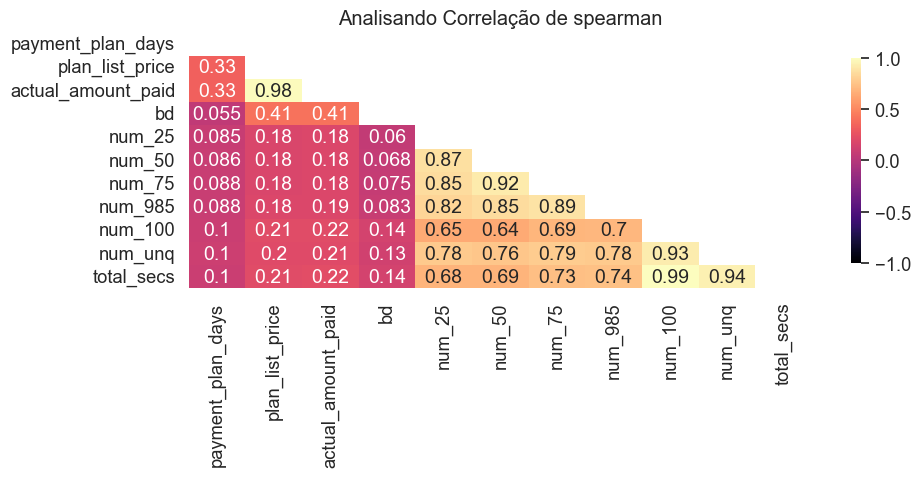

In [27]:
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))
analisa_correlacao("spearman", df_eda_continuas[variaveis_continuas])

- Analisando se há diferença significativa entre clientes Churn e Não Churn 

In [28]:
def compara_medias_amostras(df, variavel):

    def teste_hipotese_z_duas_amostras_independentes(amostra1, amostra2, variavel):
        print(f"Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável '{variavel}'.")
        print(f"Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável '{variavel}'.")
        print()
        
        z_stat, p_value = ztest(amostra1, amostra2)

        alpha = 0.05
        alpha_bicaudal = alpha / 2  

        if p_value < alpha_bicaudal:
            print(f'Pelo Teste de Hipótese Z bicaudal, o p-valor foi de {p_value:.4f}, logo, rejeita-se H0.')
        else:
            print(f'Pelo Teste de Hipótese Z bicaudal, o p-valor foi de {p_value:.4f}, logo, não rejeita-se H0.')


    # Aplica o Teorema do Limite Central, gerando duas distribuições de médias amostras que aproximam-se de uma Normal
    df_com_churn = df.loc[df["churn"] == 1]
    df_sem_churn = df.loc[df["churn"] == 0]

    
    medias_amostrais_com_churn = []
    medias_amostrais_sem_churn = []

    for i in range(10000):
        amostra_churn = random.choices(df_com_churn[variavel].values, k=1000)
        media_amostra_churn = np.mean(amostra_churn)
        medias_amostrais_com_churn.append(media_amostra_churn)

        amostra_sem_churn = random.choices(df_sem_churn[variavel].values, k=1000)
        media_amostra_sem_churn = np.mean(amostra_sem_churn)
        medias_amostrais_sem_churn.append(media_amostra_sem_churn)

    teste_hipotese_z_duas_amostras_independentes(medias_amostrais_com_churn, medias_amostrais_sem_churn, variavel)

    # Plotando os histogramas sobrepostos
    plt.figure(figsize = (8,4))
    plt.hist(medias_amostrais_com_churn, bins=30, alpha=0.5, label='Churn', linewidth=5, color = "red")  # alpha controla a transparência
    plt.hist(medias_amostrais_sem_churn, bins=30, alpha=0.5, label='sem Churn', linewidth=5, color = "green")
    plt.legend()  # Mostra a legenda com os rótulos
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.title(f'Distribuição das Médias Amostrais de "{variavel}" ')
    plt.grid(True)
    plt.show()

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'payment_plan_days'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'payment_plan_days'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


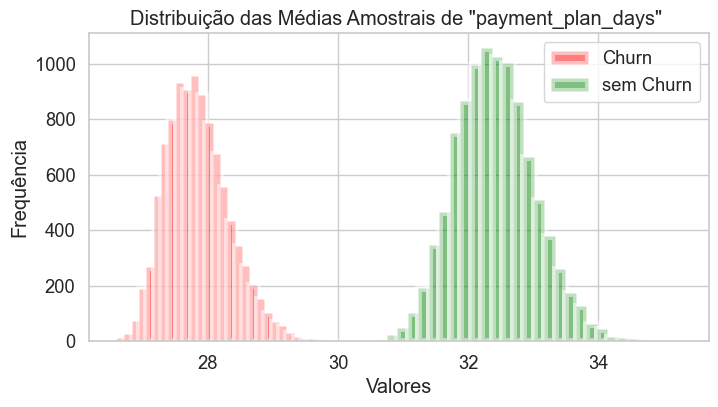

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'plan_list_price'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'plan_list_price'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


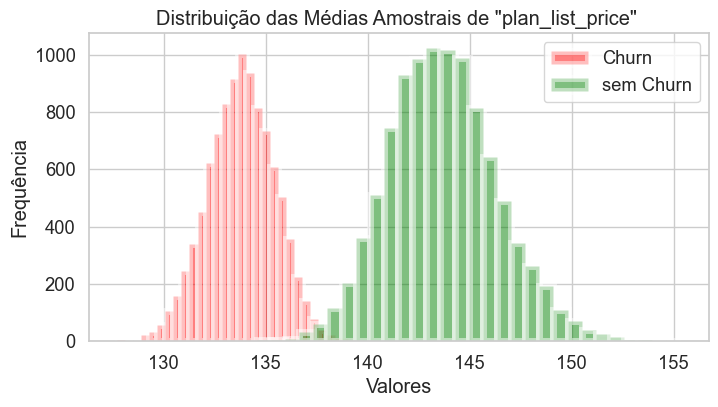

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'actual_amount_paid'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'actual_amount_paid'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


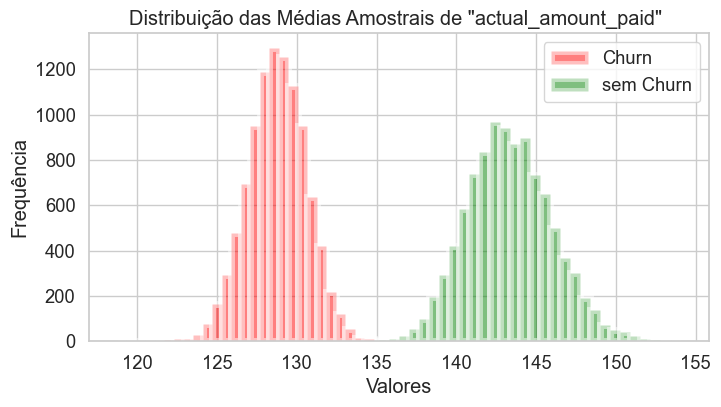

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'bd'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'bd'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


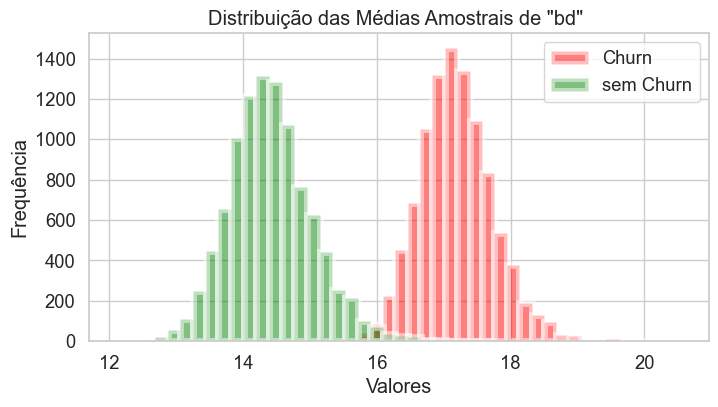

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_25'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_25'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


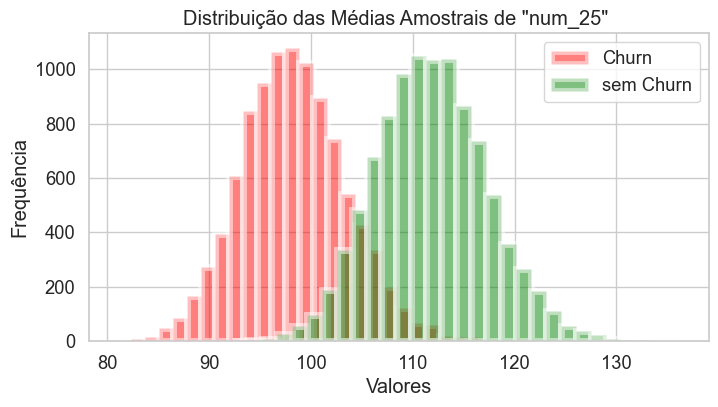

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_50'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_50'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


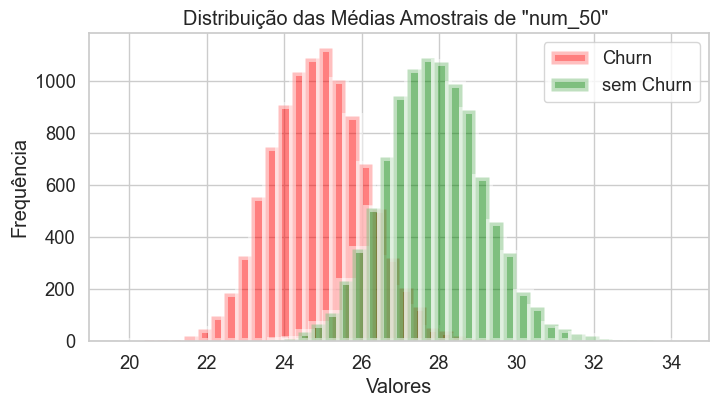

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_75'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_75'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


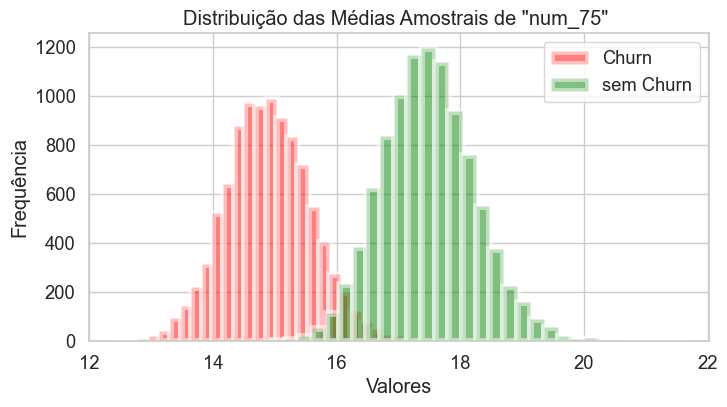

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_985'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_985'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


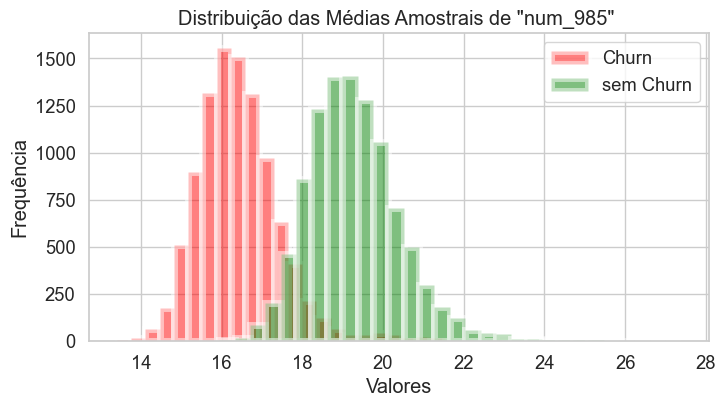

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_100'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_100'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


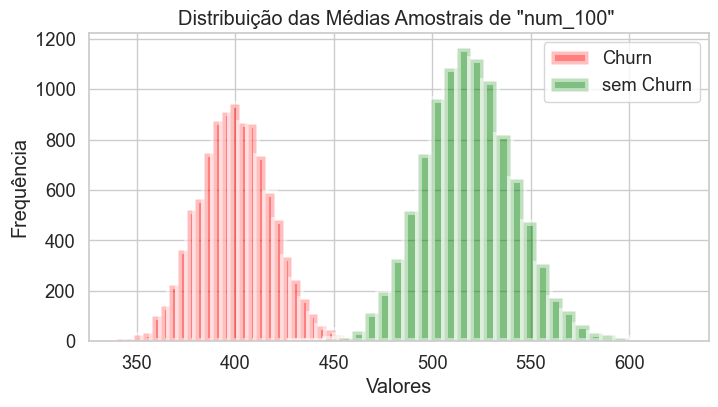

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'num_unq'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'num_unq'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


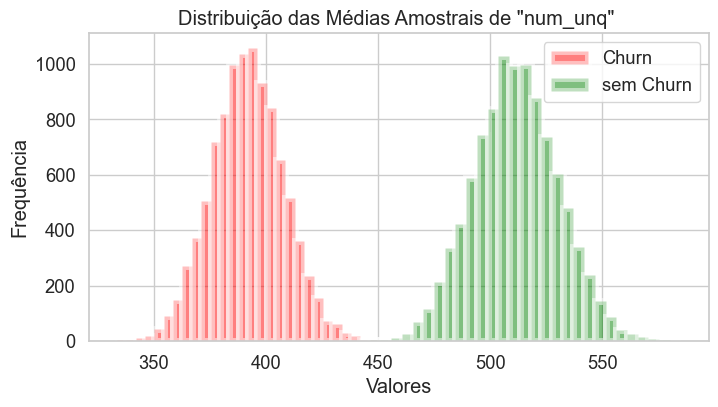

Hipótese Nula (H0): A média amostral do público com Churn e do público sem Churn são iguais para a variável 'total_secs'.
Hipótese Alternativa (H1): A média amostral do público com Churn e do público sem Churn são diferentes para a variável 'total_secs'.

Pelo Teste de Hipótese Z bicaudal, o p-valor foi de 0.0000, logo, rejeita-se H0.


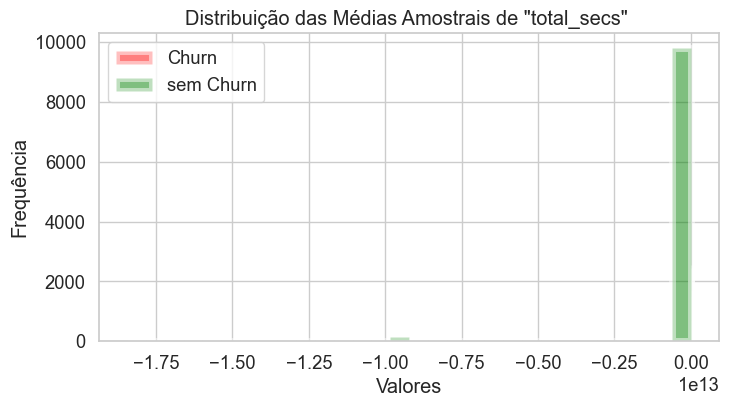

In [29]:
# COrrigindo formato das variáveis
df_eda_continuas = df_train[variaveis_continuas + ["churn"]].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))
    compara_medias_amostras(df_eda_continuas, col)

# <font color='green' style='font-size: 30px;'> 3.4) Análise de Variáveis Categóricas </font>
<hr style='border: 2px solid green;'>

> 1. A respeito da análise de variáveis categóricas, decidiu-se utilizar o WOE (Weight of Evidence). 

> 2. O WOE é uma métrica a qual identifica aassociação entre uma determinada classse e a variável resposta. Neste caso, a classe "A" da variável categórica pode ter ou não uma associação forte em relação ao cliente abandonar a empresa.

> 3. Valores positivos de WOE indicam que a categoria está associada a um maior risco de churn, enquanto valores negativos indicam menor risco

- Análise por Weight of Evidence

In [30]:
def woe(df, feature, target):
    churn = df.loc[df[target] == 1].groupby(feature, as_index = False)[target].count().rename({target:'churn'}, axis = 1)
    sem_churn = df.loc[df[target] == 0].groupby(feature, as_index = False)[target].count().rename({target:'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)
    woe.sort_values(by = 'woe', ascending = True, inplace = True)
    
    weight_of_evidence = woe['woe'].unique()


    x = list(woe[feature])
    y = list(woe['woe'])

    plt.figure(figsize=(10, 4))
    plt.plot(x, y, marker='o', linestyle='--', linewidth=2, color='#1FB3E5')

    for label, value in zip(x, y):
        plt.text(x=label, y=value, s=str(value), fontsize=10, color='red', ha='left', va='center', rotation=45)

    plt.title(f'Weight of Evidence da variável "{feature}"', fontsize=14)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Weight of Evidence', fontsize=14)
    plt.xticks(ha='right', fontsize=10, rotation=45)
    plt.show()

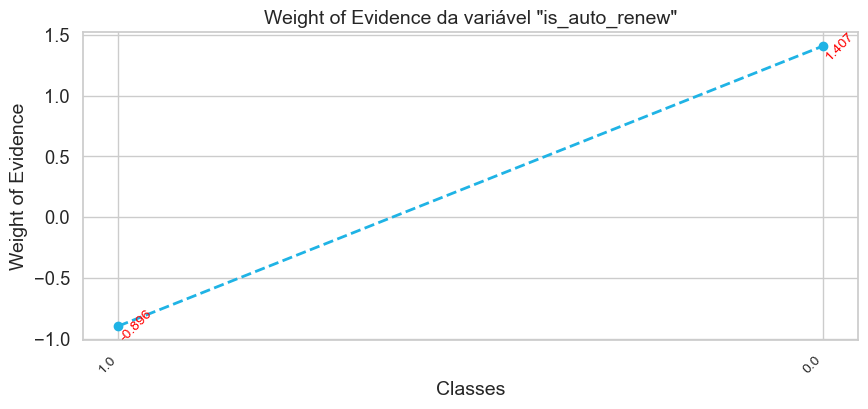

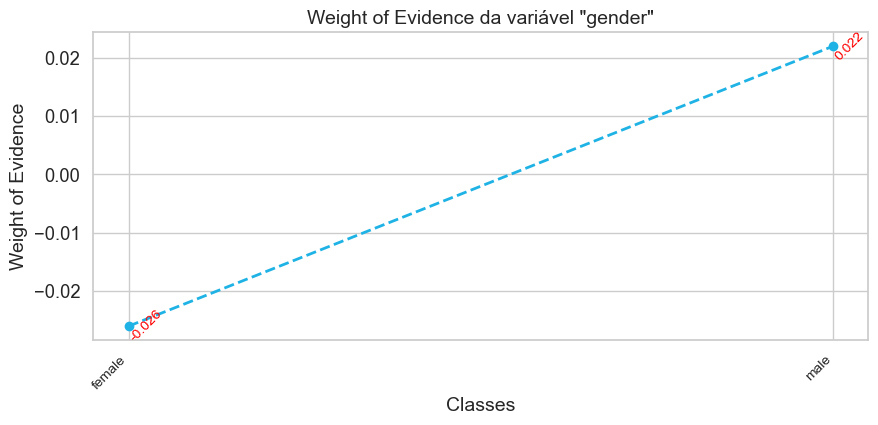

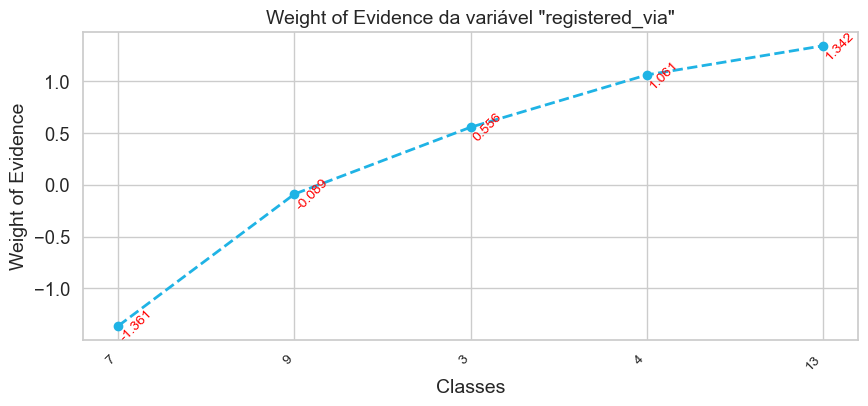

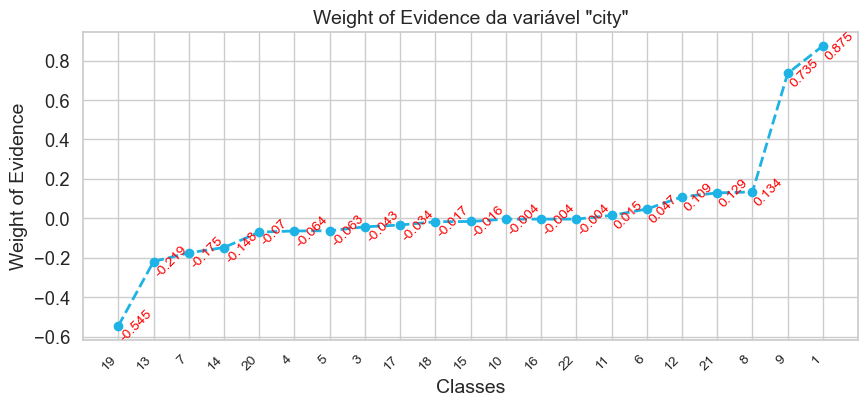

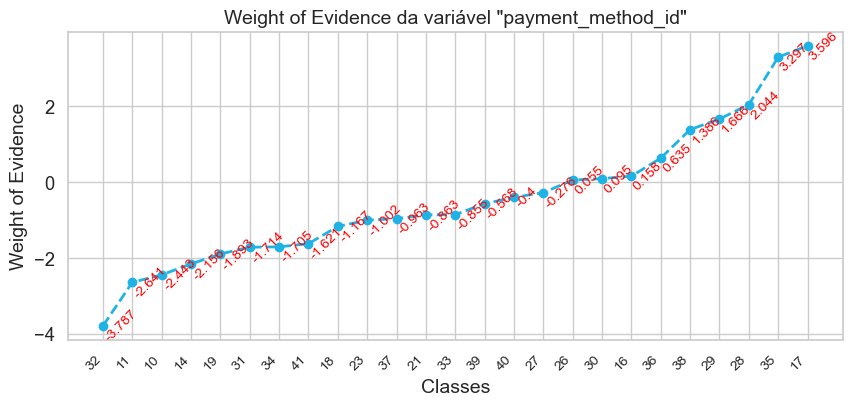

In [31]:
df_eda_categoricas = df_train[variaveis_categoricas + ["churn"]].dropna().copy()
for col in df_eda_categoricas[variaveis_categoricas].columns:
    df_eda_categoricas[col] = df_eda_categoricas[col].apply(lambda x:str(x))
    woe(df_eda_categoricas, col, "churn")

<font color='red' style='font-size: 40px;'> 4)  Feature Engineering </font>
<hr style='border: 2px solid red;'>

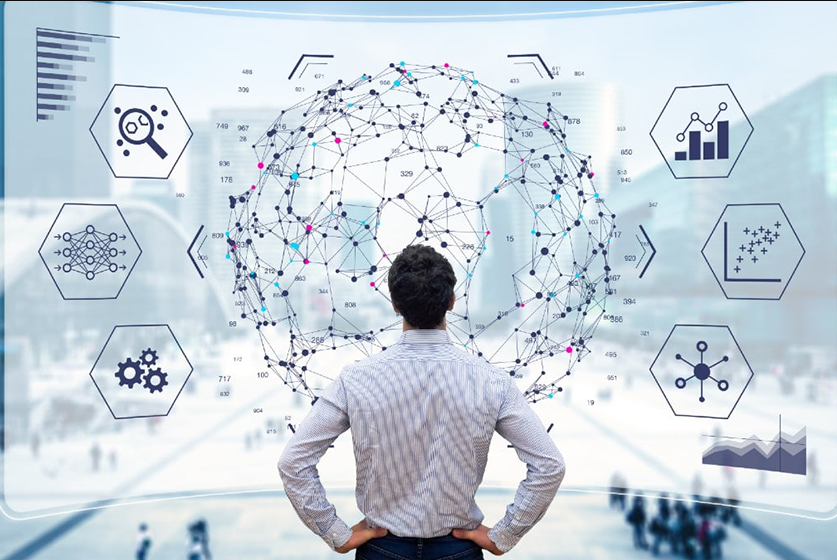

### 1) Base Members

> 1. msno: user id

> 2. city: cidade

> 3. bd: idade --> essa coluna tem outliers desde -7000 até 2015

> 4. registered_via: tipo de registro

> 5. registration_init_time: data do registro inicial no formato %Y%m%d

> 6. gender: gênero

> 7. is_ativo: assinatura ativa (Target Classificador Problema 1)

> 8. safra: safra

### 2) Base Transacations

> 1. msno: user id

> 2. payment_method_id: método de pagamento

> 3. payment_plan_days: quantidade de dias de afiliação

> 4. plan_list_price: preço

> 5. actual_amount_paid: montante pago

> 6. is_auto_renew: flag renovação automática

> 7. transaction_date: data da transação no formato %Y%m%d

> 8. membership_expire_date: data de expiração da afiliação

> 9. is_cancel: flag que indica se o usuário cancelou ou não a afiliação nesta transação

> 10. safra: safra

### 3) Base User Logs

> 1. msno: user id

> 2. num_25: quantidade de músicas tocadas por menos de 25% da duração da música

> 3. num_50: quantidade de músicas tocadas entre 25% e 50% da duração da música

> 4. num_75: quantidade de músicas tocadas entre 50% e 75% da duração da música

> 5. num_985: quantidade de músicas tocadas entre 75% até 98.5% da duração da música

> 6. num_100: quantidade de músicas tocadas entre 98.5% até 100% da duração da música

> 7. num_unq: quantidade única de músicas já tocadas

> 8. total_scs: número total de segundos tocados

> 9. safra: safra

In [32]:
### Puxando informações de Treino, Validação, Teste e OOT

df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")
df_valid = pd.read_parquet("../00_DataMaster/data/df_valid.parquet")
df_test = pd.read_parquet("../00_DataMaster/data/df_test.parquet")
df_oot = pd.read_parquet("../00_DataMaster/data/df_oot.parquet")


colunas_ordenadas = [
    "msno", "churn", "safra", 
    'is_auto_renew', 'is_cancel', 'gender', 'registered_via', 'city', 'payment_method_id', 
    'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
    "registration_init_time", "transaction_date", "membership_expire_date"
] 

df_train = df_train[colunas_ordenadas]
df_valid = df_valid[colunas_ordenadas]
df_test = df_test[colunas_ordenadas]
df_oot = df_oot[colunas_ordenadas]

# <font color='green' style='font-size: 30px;'> 4.1) Feautre 1 - Quantidade de meses desde a data de registro  </font>
<hr style='border: 2px solid green;'>

> 1. Podemos avaliar a data de registro do cliente e entender quais são clientes que estão registrados há muito tempo, assim como os novos clientes 

> 2. Pode ser que o tempo de registro nos traga alguma informação interessante

In [33]:
def months_as_a_registered(df):

    df["registration_init_time"] = df["registration_init_time"].apply(lambda x:str(x)[:6])

    # Converter as colunas para objetos datetime
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m')
    df['safra'] = pd.to_datetime(df['safra'], format='%Y%m')

    # Calcular a diferença de meses
    df['months_as_a_registered'] = (df['safra'].dt.year - df['registration_init_time'].dt.year) * 12 + (df['safra'].dt.month - df['registration_init_time'].dt.month)
    df["safra"] = df["safra"].apply(lambda x:str(x)[:7].replace("-", ""))

    return df['months_as_a_registered']

In [34]:
df_train['months_as_a_registered'] = months_as_a_registered(df_train)

# <font color='green' style='font-size: 30px;'> 4.2) Features 3 - Prorporção de músicas com ao menos 50% do tempo escutado  </font>
<hr style='border: 2px solid green;'>


> 1. Pela análise exploratória, notou-se forte correlação entre a quantidade de músicas tocadas sob uma certa duração e a duração subsequente. Isso significa que num_25 está muito correlacionada com num_50, ao passo que esta é muito correlacionada com num_75

> 2. Mesmo assim, num_25 não tem tanta correlação com num_100. Além disso, pelos gráficos mostrados na análise de bootstrap vimos que o num_25 e num_50 possuíam uma sobreposição de distribuições para o público com churn e sem churn, ao passo que o num_75, num_985 e num_100 não possuíam essa sobreposição.

> 3. Dada a situação, significa que há uma certa diferença entre pessoas que terminam de escutar suas músicas e aquelas que não terminam, portanto, criaremos uma variável que represente isso

In [35]:
def num_more_than_50(df):

    df["num_less_than_50"] = df["num_25"] + df["num_50"]
    df["num_more_than_50"] = df["num_75"] + df["num_985"] + df["num_100"]
    df["%num_more_than_50"] = round(df["num_more_than_50"]/(df["num_more_than_50"]+df["num_less_than_50"])*100, 2)

    return df["%num_more_than_50"]


In [36]:
df_train["%num_more_than_50"] = num_more_than_50(df_train)

# <font color='green' style='font-size: 30px;'> 4.3) Criação de Features envolvendo tempo  </font>
<hr style='border: 2px solid green;'>

> 1. Como temos acesso a safras antigas, pode-se criar variáveis atreladas ao tempo

> 2. Esse tipo de variável é importante pois ela consegue suavizar a variável pura, de modo que grandes picos/vales fiquem menos expressos. Isso é bom, visto que passamos para o modelo o comportamento comum do cliente, e não possíveis outliers, conferindo maior estabilidade ao modelo

> 3. Decidiu-se salvar um .parquet com as features processadas para facilitar o desenvolvimento do projeto, pois o cálculo das médias móveis demorava em torno de 15min

In [37]:
def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]

In [38]:
def moving_average(df, feature, window):

    df[f"{feature}_mov_avg_m{window}"] = df.groupby('msno')[feature].rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)
                                           
    return df[f"{feature}_mov_avg_m{window}"]

In [39]:
def moving_max(df, feature, window):

    df[f"{feature}_max_m{window}"] = df.groupby('msno')[feature].rolling(window=window, min_periods=1).max().reset_index(level=0, drop=True)
    
    return df[f"{feature}_max_m{window}"]

In [40]:
def moving_min(df, feature, window):

    df[f"{feature}_min_m{window}"] = df.groupby('msno')[feature].rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)
    
    return df[f"{feature}_min_m{window}"]

In [41]:
### Puxando informações das safras antigas

tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes[["msno", "safra", "payment_plan_days", "actual_amount_paid"]].sort_values(by=['msno', 'safra'], ascending = True)
tabela_de_transacoes["payment_plan_days"] = changing_feature_type(tabela_de_transacoes, "payment_plan_days", "float")
tabela_de_transacoes["actual_amount_paid"] = changing_feature_type(tabela_de_transacoes, "actual_amount_paid", "float")

tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["%num_more_than_50"] = num_more_than_50(tabela_user_logs)
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs[["msno", "safra", 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]].sort_values(by=['msno', 'safra'], ascending = True)

# Criando Features envolvendo tempo

for feature in ['payment_plan_days', 'actual_amount_paid']:
    tabela_de_transacoes[f"{feature}_mov_avg_m{6}"] = moving_average(tabela_de_transacoes, feature, 6)

for feature in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]:
    tabela_user_logs[f"{feature}_mov_avg_m{6}"] = moving_average(tabela_user_logs, feature, 6)

# Salvando em um .parquet para facilitar o pré-processamento

tabela_de_transacoes_media_movel = tabela_de_transacoes.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", "safra", 'payment_plan_days_mov_avg_m6', 'actual_amount_paid_mov_avg_m6',

]]
tabela_user_logs_media_movel = tabela_user_logs.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", 
       "safra", 
       'num_25_mov_avg_m6', 
       'num_50_mov_avg_m6', 
       'num_75_mov_avg_m6', 
       'num_985_mov_avg_m6', 
       'num_100_mov_avg_m6', 
       'num_unq_mov_avg_m6', 
       '%num_more_than_50_mov_avg_m6', 

]]

tabela_de_transacoes_media_movel.to_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet", index = False)
tabela_user_logs_media_movel.to_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet", index = False)

del tabela_de_transacoes
del tabela_user_logs
del tabela_de_transacoes_media_movel
del tabela_user_logs_media_movel

In [42]:
### Puxando informações das safras antigas

tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes[["msno", "safra", "payment_plan_days", "actual_amount_paid"]].sort_values(by=['msno', 'safra'], ascending = True)
tabela_de_transacoes["payment_plan_days"] = changing_feature_type(tabela_de_transacoes, "payment_plan_days", "float")
tabela_de_transacoes["actual_amount_paid"] = changing_feature_type(tabela_de_transacoes, "actual_amount_paid", "float")

tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["%num_more_than_50"] = num_more_than_50(tabela_user_logs)
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs[["msno", "safra", 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]].sort_values(by=['msno', 'safra'], ascending = True)

# Criando Features envolvendo tempo

for feature in ['payment_plan_days', 'actual_amount_paid']:
    tabela_de_transacoes[f"{feature}_mov_max_m{6}"] = moving_max(tabela_de_transacoes, feature, 6)

for feature in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]:
    tabela_user_logs[f"{feature}_mov_max_m{6}"] = moving_max(tabela_user_logs, feature, 6)

# Salvando em um .parquet para facilitar o pré-processamento

tabela_de_transacoes_max_movel = tabela_de_transacoes.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", "safra", 'payment_plan_days_mov_max_m6','actual_amount_paid_mov_max_m6',

]]
tabela_user_logs_max_movel = tabela_user_logs.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", 
       "safra", 
       'num_25_mov_max_m6', 
       'num_50_mov_max_m6', 
       'num_75_mov_max_m6', 
       'num_985_mov_max_m6', 
       'num_100_mov_max_m6', 
       'num_unq_mov_max_m6', 
       '%num_more_than_50_mov_max_m6', 

]]

tabela_de_transacoes_max_movel.to_parquet("../00_DataMaster/data/tabela_de_transacoes_max_movel.parquet", index = False)
tabela_user_logs_max_movel.to_parquet("../00_DataMaster/data/tabela_user_logs_max_movel.parquet", index = False)

del tabela_de_transacoes
del tabela_user_logs
del tabela_de_transacoes_max_movel
del tabela_user_logs_max_movel

In [43]:
### Puxando informações das safras antigas

tabela_de_transacoes = pd.read_parquet("../00_DataMaster/data/transactions.parquet")
tabela_de_transacoes["safra"] = tabela_de_transacoes["safra"].apply(lambda x:str(x))
tabela_de_transacoes = tabela_de_transacoes[["msno", "safra", "payment_plan_days", "actual_amount_paid"]].sort_values(by=['msno', 'safra'], ascending = True)
tabela_de_transacoes["payment_plan_days"] = changing_feature_type(tabela_de_transacoes, "payment_plan_days", "float")
tabela_de_transacoes["actual_amount_paid"] = changing_feature_type(tabela_de_transacoes, "actual_amount_paid", "float")

tabela_user_logs = pd.read_parquet("../00_DataMaster/data/user_logs.parquet")
tabela_user_logs["%num_more_than_50"] = num_more_than_50(tabela_user_logs)
tabela_user_logs["safra"] = tabela_user_logs["safra"].apply(lambda x:str(x))
tabela_user_logs = tabela_user_logs[["msno", "safra", 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]].sort_values(by=['msno', 'safra'], ascending = True)

# Criando Features envolvendo tempo

for feature in ['payment_plan_days', 'actual_amount_paid']:
    tabela_de_transacoes[f"{feature}_mov_min_m{6}"] = moving_min(tabela_de_transacoes, feature, 6)

for feature in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', "num_unq", "%num_more_than_50"]:
    tabela_user_logs[f"{feature}_mov_min_m{6}"] = moving_min(tabela_user_logs, feature, 6)

# Salvando em um .parquet para facilitar o pré-processamento

tabela_de_transacoes_min_movel = tabela_de_transacoes.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", "safra", 'payment_plan_days_mov_min_m6','actual_amount_paid_mov_min_m6',

]]
tabela_user_logs_min_movel = tabela_user_logs.sort_values(by = ["msno", "safra"], ascending = True)[[
       "msno", 
       "safra", 
       'num_25_mov_min_m6', 
       'num_50_mov_min_m6', 
       'num_75_mov_min_m6', 
       'num_985_mov_min_m6', 
       'num_100_mov_min_m6', 
       'num_unq_mov_min_m6', 
       '%num_more_than_50_mov_min_m6', 

]]

tabela_de_transacoes_min_movel.to_parquet("../00_DataMaster/data/tabela_de_transacoes_min_movel.parquet", index = False)
tabela_user_logs_min_movel.to_parquet("../00_DataMaster/data/tabela_user_logs_min_movel.parquet", index = False)

del tabela_de_transacoes
del tabela_user_logs
del tabela_de_transacoes_min_movel
del tabela_user_logs_min_movel

In [44]:
def get_temporal_features(df):

    tabela_de_transacoes_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet")
    tabela_user_logs_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet")

    tabela_de_transacoes_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_max_movel.parquet")
    tabela_user_logs_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_max_movel.parquet")

    tabela_de_transacoes_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_min_movel.parquet")
    tabela_user_logs_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_min_movel.parquet")

    df = df.merge(tabela_de_transacoes_media_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_media_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_max_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_max_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_min_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_min_movel, on = ["msno", "safra"], how = "left")

    return df

In [45]:
df_train = get_temporal_features(df_train)

# <font color='green' style='font-size: 30px;'> 4.4) Features 4 - Agrupamento das cidades e dos métodos de pagamento com base no WOE  </font>
<hr style='border: 2px solid green;'>


> 1. Pela análise exploratória, viu-se que existem cidades com maior tendência ao CHURN e outras com menos. Sendo assim, pode-se agrupar categorias com WOE semelhante

> 2. Esse agrupamento é importante pois reduz a quantidade de categorias, auxiliando na inserção de viés ao modelo e reduzindo o Overfitting sem perder informações relevantes

> 3. Seguindo a mesma linha de raciocínio, aplicou-se o mesmo método para os métodos de pagamento

In [46]:
def transform_to_percentiles(df, n, variavel_continua):
    # Calcula os limites dos percentiles
    percentile_limits = [i / n for i in range(n+1)] 
    
    # Aplica a função qcut para transformar a variável em percentiles
    percentiles = pd.qcut(df[variavel_continua], q=n, labels=False, duplicates='drop')
    
    return percentiles

In [47]:
# Calcula o Woe para cada classe
for feature in ["city", "payment_method_id"]:
    churn = df_train.dropna().loc[df_train.dropna()["churn"] == 1].groupby(feature, as_index = False)["churn"].count().rename({"churn":'churn'}, axis = 1)
    sem_churn = df_train.dropna().loc[df_train.dropna()["churn"] == 0].groupby(feature, as_index = False)["churn"].count().rename({"churn":'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)

    # Cria os percentis para agrupar classes de WOE semelhante e calcula o WOE médio

    woe["percentiles"] = transform_to_percentiles(woe[[feature, "woe"]], 5, "woe")
    woe_groupped = woe.groupby("percentiles", as_index = False)["woe"].mean().rename({"woe":f"woe_mean_{feature}"}, axis = 1)
    woe = woe.merge(woe_groupped, on = "percentiles", how = "left")
    woe = woe[[feature, "woe", "percentiles", f"woe_mean_{feature}"]]
    woe.sort_values(by = "woe", ascending = True, inplace = True)

    display(woe)

city   woe  percentiles  woe_mean_city
10   19 -0.43            0          -0.20
4    13 -0.21            0          -0.20
5    14 -0.15            0          -0.20
18    7 -0.14            0          -0.20
15    4 -0.07            0          -0.20
16    5 -0.07            1          -0.05
8    17 -0.05            1          -0.05
11   20 -0.04            1          -0.05
14    3 -0.03            1          -0.05
7    16 -0.01            2          -0.01
6    15 -0.01            2          -0.01
9    18 -0.01            2          -0.01
13   22 -0.00            2          -0.01
1    10  0.02            3           0.05
2    11  0.03            3           0.05
17    6  0.04            3           0.05
3    12  0.11            3           0.05
19    8  0.13            4           0.47
12   21  0.16            4           0.47
20    9  0.78            4           0.47
0     1  0.82            4           0.47

payment_method_id   woe  percentiles  woe_mean_payment_method_id
13                32 -3.79            0                       -2.33
0                 14 -2.20            0                       -2.33
4                 19 -1.99            0                       -2.33
12                31 -1.86            0                       -2.33
15                34 -1.80            0                       -2.33
22                41 -1.68            1                       -1.25
3                 18 -1.28            1                       -1.25
18                37 -1.04            1                       -1.25
5                 21 -1.01            1                       -1.25
14                33 -0.94            2                       -0.65
6                 23 -0.93            2                       -0.65
20                39 -0.63            2                       -0.65
21                40 -0.44            2                       -0.65
8                 27 -0.32            2                       -0.65
7                 26 -0.02            3                        0.21
11                30  0.04            3                        0.21
1                 16  0.16            3                        0.21
17                36  0.66            3                        0.21
19                38  1.41            4                        2.34
10                29  1.69            4                        2.34
9                 28  2.07            4                        2.34
16                35  2.92            4                        2.34
2                 17  3.60            4                        2.34

In [48]:
def groupy_categorical_woe_for_city(df):
    df['city'] = (
                np.where(df['city'].isin(['13', '14', '17', '5', '4']), 0, 
                np.where(df['city'].isin(['19', '15', '7', '11']), 1, 
                np.where(df['city'].isin(['3', '18', '22','6']), 2, 
                np.where(df['city'].isin(['10', '8', '12']), 3, 
                np.where(df['city'].isin(['21', '20', '9', '1']), 4, 
                np.nan)))))
    )

    return df['city']

def groupy_categorical_woe_for_payment_method_id(df):
    df['payment_method_id'] = (
                np.where(df['payment_method_id'].isin(['32', '14', '19', '31', '34']), 0, 
                np.where(df['payment_method_id'].isin(['41', '10', '11', '21', '18']), 1, 
                np.where(df['payment_method_id'].isin(['23','33', '37', '39', '40']), 2, 
                np.where(df['payment_method_id'].isin(['27', '30', '16', '26', '36']), 3, 
                np.where(df['payment_method_id'].isin(['38', '29','28', '35', '17']), 4, 
                np.nan)))))
    )


    return df['payment_method_id']
    

In [49]:
df_train['city'] = groupy_categorical_woe_for_city(df_train)
df_train['payment_method_id'] = groupy_categorical_woe_for_payment_method_id(df_train)

<font color='red' style='font-size: 40px;'> 5)  Pré-Processamento </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 5.1) Aplicando o Feature Enginerring  </font>
<hr style='border: 2px solid green;'>

> 1. Puxando todas as variáveis de entrada do Modelo

In [50]:
def months_as_a_registered(df):

    df["registration_init_time"] = df["registration_init_time"].apply(lambda x:str(x)[:6])

    # Converter as colunas para objetos datetime
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m')
    df['safra'] = pd.to_datetime(df['safra'], format='%Y%m')

    # Calcular a diferença de meses
    df['months_as_a_registered'] = (df['safra'].dt.year - df['registration_init_time'].dt.year) * 12 + (df['safra'].dt.month - df['registration_init_time'].dt.month)
    df["safra"] = df["safra"].apply(lambda x:str(x)[:7].replace("-", ""))

    return df['months_as_a_registered']

def num_more_than_50(df):

    df["num_less_than_50"] = df["num_25"] + df["num_50"]
    df["num_more_than_50"] = df["num_75"] + df["num_985"] + df["num_100"]
    df["%num_more_than_50"] = round(df["num_more_than_50"]/(df["num_more_than_50"]+df["num_less_than_50"])*100, 2)

    return df["%num_more_than_50"]

def groupy_categorical_woe_for_city(df):
    df['city'] = (
                np.where(df['city'].isin(['13', '14', '17', '5', '4']), 0, 
                np.where(df['city'].isin(['19', '15', '7', '11']), 1, 
                np.where(df['city'].isin(['3', '18', '22','6']), 2, 
                np.where(df['city'].isin(['10', '8', '12']), 3, 
                np.where(df['city'].isin(['21', '20', '9', '1']), 4, 
                np.nan)))))
    )

    return df['city']

def groupy_categorical_woe_for_payment_method_id(df):
    df['payment_method_id'] = (
                np.where(df['payment_method_id'].isin(['32', '14', '19', '31', '34']), 0, 
                np.where(df['payment_method_id'].isin(['41', '10', '11', '21', '18']), 1, 
                np.where(df['payment_method_id'].isin(['23','33', '37', '39', '40']), 2, 
                np.where(df['payment_method_id'].isin(['27', '30', '16', '26', '36']), 3, 
                np.where(df['payment_method_id'].isin(['38', '29','28', '35', '17']), 4, 
                np.nan)))))
    )


    return df['payment_method_id']

def get_temporal_features(df):

    tabela_de_transacoes_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet")
    tabela_user_logs_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet")

    tabela_de_transacoes_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_max_movel.parquet")
    tabela_user_logs_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_max_movel.parquet")

    tabela_de_transacoes_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_min_movel.parquet")
    tabela_user_logs_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_min_movel.parquet")

    df = df.merge(tabela_de_transacoes_media_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_media_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_max_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_max_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_min_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_min_movel, on = ["msno", "safra"], how = "left")

    return df
    


In [51]:
### Puxando informações de Treino

df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")

colunas_ordenadas = [
    "msno", "churn", "safra", 
    'is_auto_renew', 'is_cancel', 'gender', 'registered_via', 'city', 'payment_method_id', 
    'payment_plan_days', 'plan_list_price','actual_amount_paid', 'bd', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
    "registration_init_time", "transaction_date", "membership_expire_date"
] 

df_train = df_train[colunas_ordenadas]

# Aplicando Feature Engineering
df_train['months_as_a_registered'] = months_as_a_registered(df_train)
df_train['%num_more_than_50'] = num_more_than_50(df_train)
df_train['city'] = groupy_categorical_woe_for_city(df_train)
df_train['payment_method_id'] = groupy_categorical_woe_for_payment_method_id(df_train)
df_train = get_temporal_features(df_train)

# # Organizando

variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']

variaveis_continuas = [
    'bd',
    'months_as_a_registered',
    'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
    'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
    'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
    'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
    'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
    'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
    'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
    'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
    '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
]

safra = ["safra"]
target = ["churn"]
user_id = ["msno"]

df_train = df_train[target + user_id + safra + variaveis_categoricas + variaveis_continuas]

# <font color='green' style='font-size: 30px;'> 5.2) Correção da Tipagem de Dados </font>
<hr style='border: 2px solid green;'>

> 1. Corrigindo a tipagem dos dados 

In [52]:
def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]

In [53]:
df_train["is_auto_renew"] = changing_feature_type(df_train, "is_auto_renew", "int")
df_train["bd"] = changing_feature_type(df_train, "bd", "int")
df_train["registered_via"] = changing_feature_type(df_train, "registered_via", "int")
df_train["payment_plan_days"] = changing_feature_type(df_train, "payment_plan_days", "float")
df_train["actual_amount_paid"] = changing_feature_type(df_train, "actual_amount_paid", "float")

# <font color='green' style='font-size: 30px;'> 5.3) Tratamento dos registros inconsistentes (Erros de Cadastro ou Nulos)</font>
<hr style='border: 2px solid green;'>

> 1. Como vimos anteriormente, valores abaixo do p1 e acima do p998m são Outliers extremos. Para algumas variáveis, embora sejam Outliers extremos, ainda sim são valores possíveis, contudo, algumas delas possuem domínio específico

> 2. A variável de "bd" diz respeito à idade do cliente, portanto, obrigatoriamente ela deve ser maior que 0 e não deveria alcançar números muito altos dada a expectativa de vida do ser humano. Sendo assim, decidiu-se trocar a idade de clientes com idade menor que 0 ou acima de 100 anos pelo valor da **mediana dos dados**

> 3. Em relação as demais variáveis contínuas, optou-se também por substituir valores menores que 0 pela **mediana dos dados**, pois dada as descrições de cada variável, é impossível termos valores negativos

> 4. Quanto aos valores nulos, para as categóricas imputamos com a moda de cada variável e mediana para as variáveis contínuas

In [54]:
def plota_grafico_linhas(df, x, y, nao_calcula_media, title):

    if nao_calcula_media:
        # Criando o gráfico de linha
        plt.figure(figsize=(18, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        media = df[y].mean()
        # Criando o gráfico de linha
        plt.figure(figsize=(18, 6))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando linha da média
        plt.axhline(y=media, color='r', linestyle='--', linewidth=1, label=f'Média: {media:.2f}')
        plt.legend()

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [55]:
def analisa_distribuicao_via_percentis(df, variaveis):
    def sublinha_percentis(s):
        is_1_percentile = s.name == '1%'
        is_99_8_percentile = s.name == '99.8%'
        if is_1_percentile or is_99_8_percentile:
            return ['background-color: blue'] * len(s)
        else:
            return [''] * len(s)

    percentis = df[variaveis].describe(percentiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 0.995, 0.998]).style.apply(sublinha_percentis, axis=1)    

    return percentis

In [56]:
def mode_training(df):
    variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
    moda_dict = pd.DataFrame({
        'variavel': df[variaveis_categoricas].mode().iloc[0].index,
        'moda': df[variaveis_categoricas].mode().iloc[0].values
        }
    )
    moda_dict.to_excel("../00_DataMaster/pre_processing/mode_training.xlsx", index = False)
    print("Excel com as modas Salvo!!")

def pre_processing_categorical_nulls(df):
    variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
    moda_dict = pd.read_excel("../00_DataMaster/pre_processing/mode_training.xlsx").set_index('variavel')['moda'].to_dict()

    def apply_mode_calculator(df, feature, median_dict):
        df[feature] = np.where(df[feature].isnull(), moda_dict[feature], df[feature])
        return df[feature]

    for categorica in variaveis_categoricas:
        df[categorica] = apply_mode_calculator(df, categorica, moda_dict)

    return df

In [57]:
def median_training(df):
    variaveis_continuas = [
        'bd',
        'months_as_a_registered',
        'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
        'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
        'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
        'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
        'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
        'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
        'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
        'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
        '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
    ]
    mediana_dict = pd.DataFrame(df[variaveis_continuas].median()).reset_index().rename({"index":"variavel", 0:"mediana"}, axis = 1)
    mediana_dict.to_excel("../00_DataMaster/pre_processing/median_training.xlsx", index = False)
    print("Excel com as medianas Salvo!!")

def pre_processing_quantitative_nulls(df):

    variaveis_continuas = [
        'bd',
        'months_as_a_registered',
        'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
        'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
        'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
        'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
        'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
        'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
        'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
        'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
        '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
    ]
    mediana_dict = pd.read_excel("../00_DataMaster/pre_processing/median_training.xlsx").set_index('variavel')['mediana'].to_dict()

    def apply_median_calculator(df, feature, median_dict):
        if feature == "bd":
            df[feature] = np.where((df[feature] < 0) | (df[feature] > 100) | (df[feature].isnull()), median_dict[feature], df[feature])
        else:
            df[feature] = np.where((df[feature] < 0) | (df[feature].isnull()), median_dict[feature], df[feature])
        return df[feature]

    for continua in variaveis_continuas:
        df[continua] = apply_median_calculator(df, continua, mediana_dict)

    return df

In [58]:
mode_training(df_train)
median_training(df_train)

df_train = pre_processing_categorical_nulls(df_train)
df_train = pre_processing_quantitative_nulls(df_train)
print("Preenchimento com Moda e Mediana prontos!!!")

Excel com as modas Salvo!!
Excel com as medianas Salvo!!
Preenchimento com Moda e Mediana prontos!!!


In [59]:
### Retirando amostras nulas para ver a distribuição
df_eda_continuas = df_train[variaveis_continuas].dropna().copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))

analisa_distribuicao_via_percentis(df_eda_continuas, variaveis_continuas)

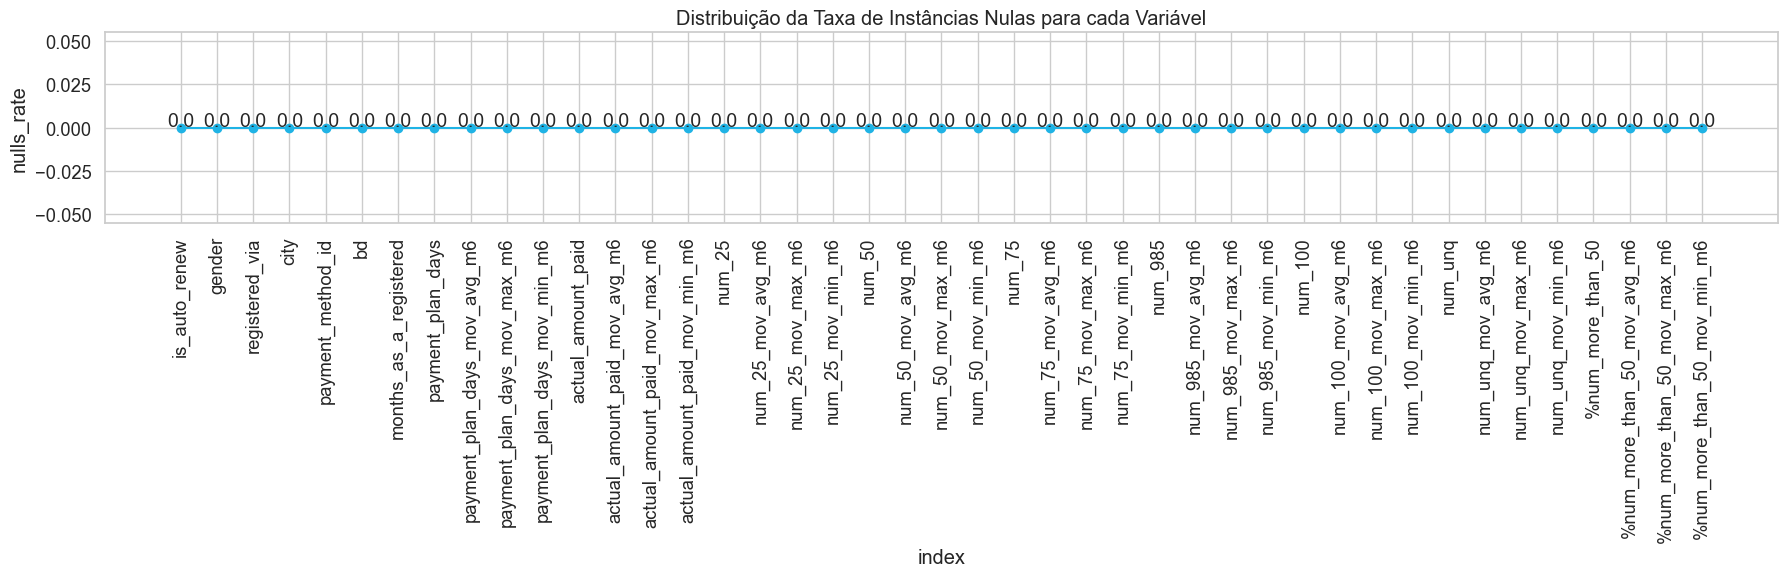

In [60]:
df_nulls = (
    pd.DataFrame(
        df_train
        .drop(["msno", "safra", "churn"], axis = 1)
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_train.shape[0])*100, 2)
plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

# <font color='green' style='font-size: 30px;'> 5.4) Encoder de Categóricas </font>
<hr style='border: 2px solid green;'>

> 1. Muitos algoritmos não aceitam categorias durante o treinamento, portanto, temos de trocar as categorias por números. 

> 2. Sendo assim, a idéia é usar o WOE como Target Encoder, pois ele garante a mudança da categoria por um valor numérico que a represente corretamente, mantendo sua relação quanto a Target

> 3. Além disso, ele é capaz de reduzir a dimensionalidade quando comparado a outros Encoders, como o Binary ou o One Hot, por exemplo

In [61]:
def woe_training(df, feature):
    churn = df.dropna().loc[df.dropna()["churn"] == 1].groupby(feature, as_index = False)["churn"].count().rename({"churn":'churn'}, axis = 1)
    sem_churn = df.dropna().loc[df.dropna()["churn"] == 0].groupby(feature, as_index = False)["churn"].count().rename({"churn":'sem_churn'}, axis = 1)

    woe = churn.merge(sem_churn, on = feature, how = 'left')
    woe['percent_churn'] = woe['churn']/woe['churn'].sum()
    woe['percent_sem_churn'] = woe['sem_churn']/woe['sem_churn'].sum()
    woe['woe'] = round(np.log(woe['percent_churn']/woe['percent_sem_churn']), 3)
    woe = woe[[feature, "woe"]]
    woe.rename({f"{feature}":"variavel"}, axis = 1)
    woe.sort_values(by = "woe", ascending = True, inplace = True)
    woe.to_excel(f"../00_DataMaster/pre_processing/target_encoder_{feature}.xlsx", index = False)
    print(f"Excel com o WOE da variável {feature} Salvo!!")

In [62]:
for categorica in variaveis_categoricas:
    woe_training(df_train, categorica)

Excel com o WOE da variável is_auto_renew Salvo!!
Excel com o WOE da variável gender Salvo!!
Excel com o WOE da variável registered_via Salvo!!
Excel com o WOE da variável city Salvo!!
Excel com o WOE da variável payment_method_id Salvo!!


In [63]:
def target_encoder_woe(df):

    woe_is_auto_renew = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_is_auto_renew.xlsx").set_index('is_auto_renew')['woe'].to_dict()
    woe_gender = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_gender.xlsx").set_index('gender')['woe'].to_dict()
    woe_registered_via = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_registered_via.xlsx").set_index('registered_via')['woe'].to_dict()
    woe_city = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_city.xlsx").set_index('city')['woe'].to_dict()
    woe_payment_method_id = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_payment_method_id.xlsx").set_index('payment_method_id')['woe'].to_dict()

    df["is_auto_renew"] = df['is_auto_renew'].map(woe_is_auto_renew)
    df["gender"] = df['gender'].map(woe_gender)
    df["registered_via"] = df['registered_via'].map(woe_registered_via)
    df["city"] = df['city'].map(woe_city)
    df["payment_method_id"] = df['payment_method_id'].map(woe_payment_method_id)

    return df

In [64]:
df_train = target_encoder_woe(df_train)

In [65]:
df_train.head()

churn                                          msno   safra  is_auto_renew  gender  registered_via  city  payment_method_id    bd  months_as_a_registered  payment_plan_days  payment_plan_days_mov_avg_m6  payment_plan_days_mov_max_m6  payment_plan_days_mov_min_m6  actual_amount_paid  actual_amount_paid_mov_avg_m6  actual_amount_paid_mov_max_m6  actual_amount_paid_mov_min_m6  num_25  num_25_mov_avg_m6  num_25_mov_max_m6  num_25_mov_min_m6  num_50  num_50_mov_avg_m6  num_50_mov_max_m6  num_50_mov_min_m6  num_75  num_75_mov_avg_m6  num_75_mov_max_m6  num_75_mov_min_m6  num_985  num_985_mov_avg_m6  num_985_mov_max_m6  num_985_mov_min_m6  num_100  num_100_mov_avg_m6  num_100_mov_max_m6  num_100_mov_min_m6  num_unq  num_unq_mov_avg_m6  num_unq_mov_max_m6  num_unq_mov_min_m6  %num_more_than_50  %num_more_than_50_mov_avg_m6  %num_more_than_50_mov_max_m6  %num_more_than_50_mov_min_m6
0      0  cBzaCb0FX4Z21RyCH4H6/nPgaEgccSznUEBl+umr06E=  201603          -0.38    0.28            0.34  0.21              -0.25 26.00                  125.00              30.00                         30.00                         30.00                         30.00              149.00                         149.00                         149.00                         149.00   67.00              64.50             109.00              64.50   13.00              14.33              22.00              14.33   15.00              11.33              24.00              11.33    18.00               15.17               21.00               15.17   505.00              651.00             1035.00              651.00   309.00              420.00              815.00              420.00              87.06                         89.52                         91.77                         89.52
1      0  cBzaCb0FX4Z21RyCH4H6/nPgaEgccSznUEBl+umr06E=  201604          -0.38    0.28            0.34  0.21              -0.25 26.00                  126.00              30.00                         30.00                         30.00                         30.00              149.00                         149.00                         149.00                         149.00   86.00              60.67              86.00              60.67   31.00              15.83              31.00              15.83   14.00               9.67              15.00               9.67    23.00               15.50               23.00               15.50  1024.00              649.17             1024.00              649.17   575.00              380.00              575.00              380.00              90.07                         89.67                         91.77                         89.67
2      0  cBzaCb0FX4Z21RyCH4H6/nPgaEgccSznUEBl+umr06E=  201605          -0.38    0.28            0.34  0.21              -0.25 26.00                  127.00              30.00                         30.00                         30.00                         30.00              149.00                         149.00                         149.00                         149.00   43.00              58.00              86.00              58.00   12.00              15.33              31.00              15.33   16.00              11.67              16.00              11.67     9.00               14.50               23.00               14.50   524.00              602.17             1024.00              602.17   163.00              324.00              575.00              324.00              90.89                         89.52                         91.03                         89.52
3      0  cBzaCb0FX4Z21RyCH4H6/nPgaEgccSznUEBl+umr06E=  201606          -0.38    0.28            0.34  0.21              -0.25 26.00                  128.00              30.00                         30.00                         30.00                         30.00              149.00                         149.00                         149.00                         149.00   53.00              57.67              86.00              57.67

<font color='red' style='font-size: 40px;'> 6)  Feature Selection </font>
<hr style='border: 2px solid red;'>

In [66]:
######################### FEATURE ENGINEERING #####################################################
def months_as_a_registered(df):

    df["registration_init_time"] = df["registration_init_time"].apply(lambda x:str(x)[:6])

    # Converter as colunas para objetos datetime
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m')
    df['safra'] = pd.to_datetime(df['safra'], format='%Y%m')

    # Calcular a diferença de meses
    df['months_as_a_registered'] = (df['safra'].dt.year - df['registration_init_time'].dt.year) * 12 + (df['safra'].dt.month - df['registration_init_time'].dt.month)
    df["safra"] = df["safra"].apply(lambda x:str(x)[:7].replace("-", ""))

    return df['months_as_a_registered']

def num_more_than_50(df):

    df["num_less_than_50"] = df["num_25"] + df["num_50"]
    df["num_more_than_50"] = df["num_75"] + df["num_985"] + df["num_100"]
    df["%num_more_than_50"] = round(df["num_more_than_50"]/(df["num_more_than_50"]+df["num_less_than_50"])*100, 2)

    return df["%num_more_than_50"]

def groupy_categorical_woe_for_city(df):
    df['city'] = (
                np.where(df['city'].isin(['13', '14', '17', '5', '4']), 0, 
                np.where(df['city'].isin(['19', '15', '7', '11']), 1, 
                np.where(df['city'].isin(['3', '18', '22','6']), 2, 
                np.where(df['city'].isin(['10', '8', '12']), 3, 
                np.where(df['city'].isin(['21', '20', '9', '1']), 4, 
                np.nan)))))
    )

    return df['city']

def groupy_categorical_woe_for_payment_method_id(df):
    df['payment_method_id'] = (
                np.where(df['payment_method_id'].isin(['32', '14', '19', '31', '34']), 0, 
                np.where(df['payment_method_id'].isin(['41', '10', '11', '21', '18']), 1, 
                np.where(df['payment_method_id'].isin(['23','33', '37', '39', '40']), 2, 
                np.where(df['payment_method_id'].isin(['27', '30', '16', '26', '36']), 3, 
                np.where(df['payment_method_id'].isin(['38', '29','28', '35', '17']), 4, 
                np.nan)))))
    )


    return df['payment_method_id']

def get_temporal_features(df):

    tabela_de_transacoes_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet")
    tabela_user_logs_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet")

    tabela_de_transacoes_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_max_movel.parquet")
    tabela_user_logs_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_max_movel.parquet")

    tabela_de_transacoes_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_min_movel.parquet")
    tabela_user_logs_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_min_movel.parquet")

    df = df.merge(tabela_de_transacoes_media_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_media_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_max_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_max_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_min_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_min_movel, on = ["msno", "safra"], how = "left")

    return df

######################### PRÉ-PROCESSAMENTO #####################################################

def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]

def pre_processing_categorical_nulls(df):
    variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
    moda_dict = pd.read_excel("../00_DataMaster/pre_processing/mode_training.xlsx").set_index('variavel')['moda'].to_dict()

    def apply_mode_calculator(df, feature, median_dict):
        df[feature] = np.where(df[feature].isnull(), moda_dict[feature], df[feature])
        return df[feature]

    for categorica in variaveis_categoricas:
        df[categorica] = apply_mode_calculator(df, categorica, moda_dict)

    return df

def pre_processing_quantitative_nulls(df):

    variaveis_continuas = [
        'bd',
        'months_as_a_registered',
        'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
        'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
        'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
        'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
        'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
        'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
        'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
        'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
        '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
    ]

    mediana_dict = pd.read_excel("../00_DataMaster/pre_processing/median_training.xlsx").set_index('variavel')['mediana'].to_dict()

    def apply_median_calculator(df, feature, median_dict):
        if feature == "bd":
            df[feature] = np.where((df[feature] < 0) | (df[feature] > 100) | (df[feature].isnull()), median_dict[feature], df[feature])
        else:
            df[feature] = np.where((df[feature] < 0) | (df[feature].isnull()), median_dict[feature], df[feature])
        return df[feature]

    for continua in variaveis_continuas:
        df[continua] = apply_median_calculator(df, continua, mediana_dict)

    return df

def target_encoder_woe(df):

    woe_is_auto_renew = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_is_auto_renew.xlsx").set_index('is_auto_renew')['woe'].to_dict()
    woe_gender = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_gender.xlsx").set_index('gender')['woe'].to_dict()
    woe_registered_via = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_registered_via.xlsx").set_index('registered_via')['woe'].to_dict()
    woe_city = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_city.xlsx").set_index('city')['woe'].to_dict()
    woe_payment_method_id = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_payment_method_id.xlsx").set_index('payment_method_id')['woe'].to_dict()

    df["is_auto_renew"] = df['is_auto_renew'].map(woe_is_auto_renew)
    df["gender"] = df['gender'].map(woe_gender)
    df["registered_via"] = df['registered_via'].map(woe_registered_via)
    df["city"] = df['city'].map(woe_city)
    df["payment_method_id"] = df['payment_method_id'].map(woe_payment_method_id)

    return df


# <font color='green' style='font-size: 30px;'> 6.1) Leitura de todos os dados</font>
<hr style='border: 2px solid green;'>

In [67]:
### Puxando informações de Treino

df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")

# Aplicando Feature Engineering
df_train['months_as_a_registered'] = months_as_a_registered(df_train)
df_train['%num_more_than_50'] = num_more_than_50(df_train)
df_train['city'] = groupy_categorical_woe_for_city(df_train)
df_train['payment_method_id'] = groupy_categorical_woe_for_payment_method_id(df_train)
df_train = get_temporal_features(df_train)

# Aplicando Pré-Processamento
df_train["is_auto_renew"] = changing_feature_type(df_train, "is_auto_renew", "int")
df_train["bd"] = changing_feature_type(df_train, "bd", "int")
df_train["registered_via"] = changing_feature_type(df_train, "registered_via", "int")
df_train["payment_plan_days"] = changing_feature_type(df_train, "payment_plan_days", "float")
df_train["actual_amount_paid"] = changing_feature_type(df_train, "actual_amount_paid", "float")

df_train = pre_processing_categorical_nulls(df_train)
df_train = pre_processing_quantitative_nulls(df_train)

df_train = target_encoder_woe(df_train)

# Organizando

variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
variaveis_continuas = [
    'bd',
    'months_as_a_registered',
    'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
    'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
    'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
    'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
    'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
    'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
    'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
    'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
    '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
]
safra = ["safra"]
target = ["churn"]
user_id = ["msno"]

df_train = df_train[target + user_id + safra + variaveis_categoricas + variaveis_continuas]

# <font color='green' style='font-size: 30px;'> 6.2) Exclusão de variáveis contínuas altamente correlacionadas</font>
<hr style='border: 2px solid green;'>

> 1. O primeiro passo é excluir variáveis que não entrarão no modelo. A variável que sofrerá exclusão inicial é a "gender", pois ela apresentava quase 50% dos dados nulos. A necessidade de imputação de 50% dos valores é um risco muito alto, portanto, decidiu-se retirá-la do treinamento

> 2. Posteriormente, viu-se pela análise exploratória que a variável "plan_list_price" era praticamente idêntica à "actual_amount_paid", bem como a "num_unq" era extremamente correlacionada com a "total_secs". Dessa forma, optou-se por remover previamente todas as variáveis que dizem respeito a "plan_list_price" e "total_secs"

> 3. Finalmente, decidiu-se eliminar as variáveis com sufixo "max" e "min", mantendo as de sufixo "avg", pois a média descreve melhor a distribuição de uma variável do que máximos e mínimos

In [68]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(30,15))
    corr_matrix = df.corr(method=metodo)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='magma', annot=True, fmt=".1f",
                          cbar_kws={"shrink": .12}, mask=mask, annot_kws={"size": 15}, cbar = False)
    
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14)
    
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

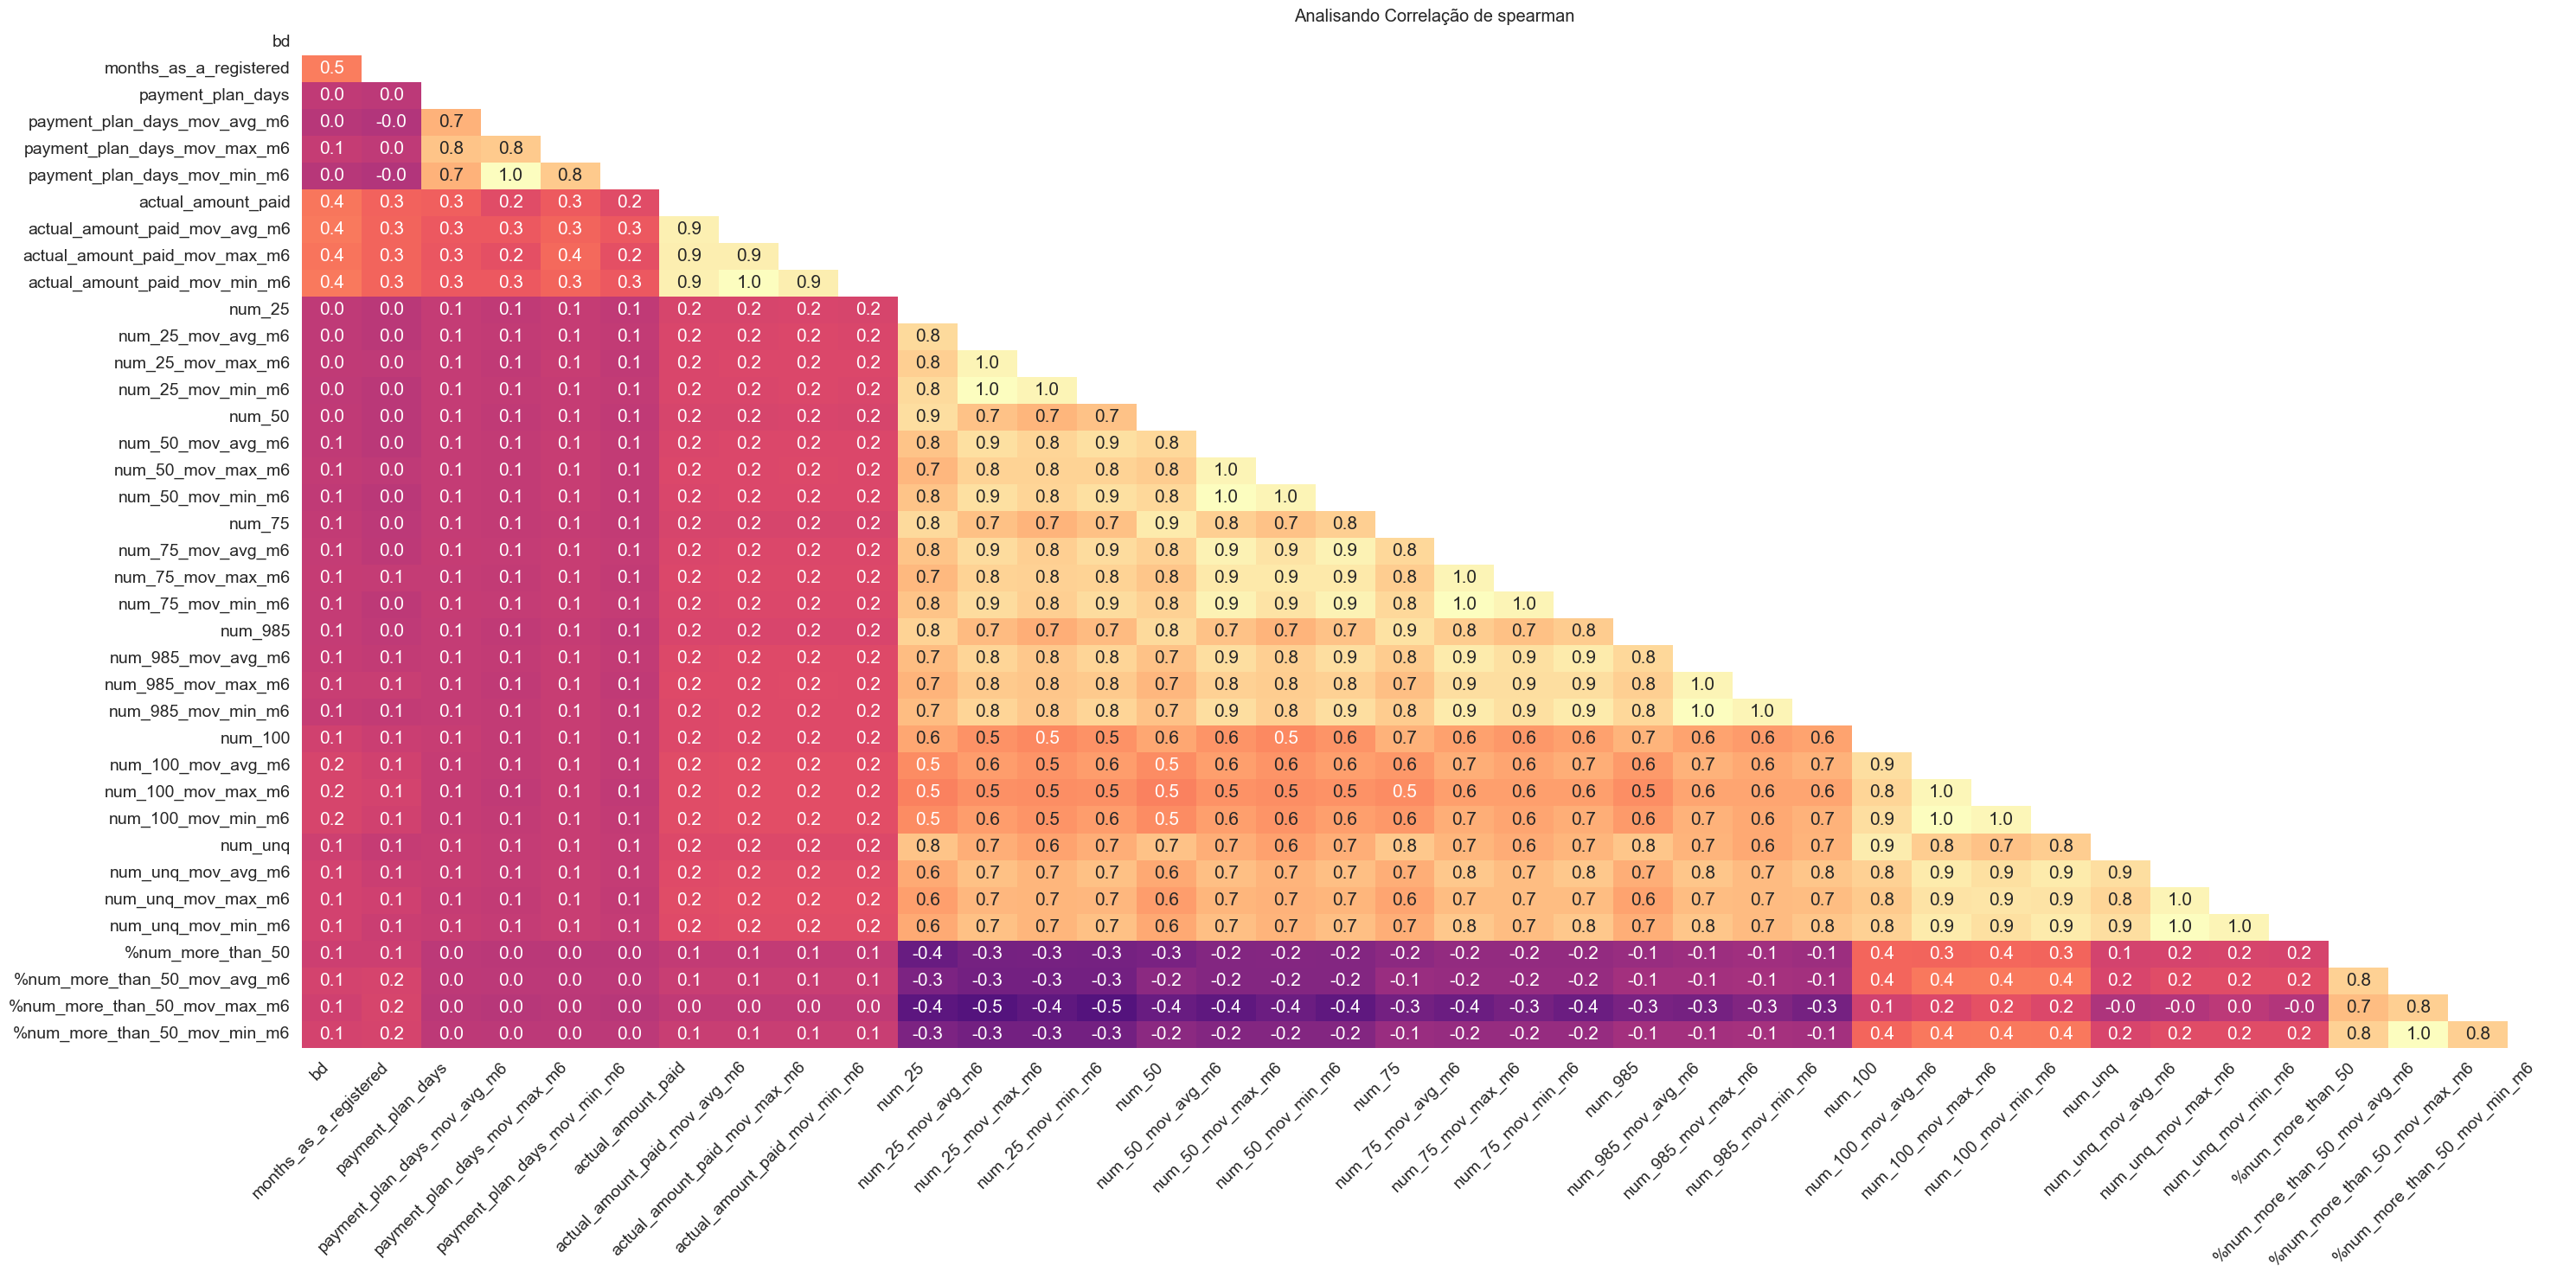

In [69]:
df_eda_continuas = df_train[variaveis_continuas].copy()
for col in df_eda_continuas[variaveis_continuas]:
    df_eda_continuas[col] = df_eda_continuas[col].apply(lambda x:float(x))
analisa_correlacao("spearman", df_eda_continuas[variaveis_continuas])

# <font color='green' style='font-size: 30px;'> 6.3) Random Forest Feature Importance </font>
<hr style='border: 2px solid green;'>

> 1. Posteriormente, utilizou-se uma Random Forest Feature Importance para selecionar as variáveis mais importantes. A "feature importance" (importância das características) é uma medida que avalia o grau de contribuição de cada variável de entrada na capacidade preditiva de um modelo de árvore. Ela fornece uma pontuação ou ranking que indica a relevância relativa de cada variável, atribuindo os melhores scores para as features que mais contribuem para a redução da função de custo

> 2. Além disso, a Random Forest é um modelo Ensemble que baseia-se no Bagging, ou seja, é um modelo robusto ao overfitting 

> 3. A Random Forest foi treinada de maneira simples, justamente para que seja capaz de nos informas as melhores variáveis. Em relação ao class weight escolhido:

- Representatividade dos Dados: Usar a proporção dos dados como ponto de partida é uma abordagem racional, pois diretamente reflete a distribuição real das classes no conjunto de dados. Ajustar o modelo para considerar essa distribuição ajuda a garantir que o modelo esteja melhor preparado para capturar a variabilidade da classe minoritária.

- Base Sólida para Otimização: Começar com a proporção dos dados fornece uma base sólida para o otimizador. Esse ponto de partida é um reflexo justo e realista do desbalanceamento, permitindo que o otimizador faça ajustes incrementais mais precisos e eficazes a partir daí.


In [70]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

In [71]:
def remove_features_feature_importance(target, df, class_weight, threshold):

    # Separa entre Features e Target
    x, y = separa_feature_target(target, df)

    # Criar o modelo de Random Forest
    model = RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=20, class_weight={0:1, 1:class_weight})

    # Treinar o modelo
    model.fit(x, y)

    # Obter as importâncias das features
    feature_importances = model.feature_importances_

    # Selecionar as features com importância maior que zero
    selected_features = list(x.columns[feature_importances > threshold])
    selected_features.append(target)

    feature_importance_df = pd.DataFrame({
        'feature': x.columns,
        'importance': feature_importances
    }).sort_values(by = 'importance', ascending = False)
    feature_importance_df = feature_importance_df.loc[feature_importance_df['importance'] > 0]
    feature_importance_df['importance'] = feature_importance_df['importance']*100

    return selected_features, feature_importance_df

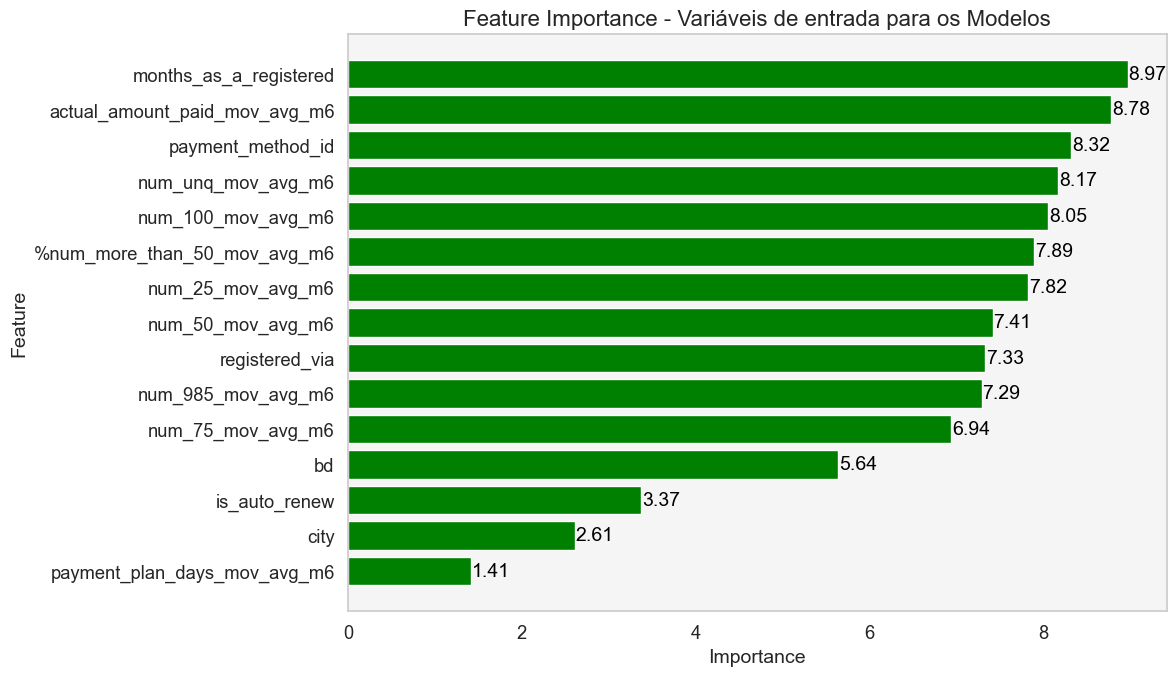

In [72]:
# Seleciona Features com Feature Importance > 0, ou seja, agregam algo para o modelo
features, feature_importances = remove_features_feature_importance('churn', df_train[['churn', 'is_auto_renew', 'registered_via','city', 'payment_method_id','bd','months_as_a_registered','payment_plan_days_mov_avg_m6','actual_amount_paid_mov_avg_m6','num_25_mov_avg_m6','num_50_mov_avg_m6','num_75_mov_avg_m6','num_985_mov_avg_m6','num_100_mov_avg_m6','num_unq_mov_avg_m6','%num_more_than_50_mov_avg_m6']].dropna().copy(), 15, 0)
feature_importances = feature_importances.loc[feature_importances['importance'] > 1] 

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid", font_scale=1.2)

bars = plt.barh(feature_importances['feature'], feature_importances['importance'], color='green')
plt.title("Feature Importance - Variáveis de entrada para os Modelos", fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontsize=14)


plt.tight_layout()
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')
plt.gca().invert_yaxis()
plt.show()


<font color='red' style='font-size: 40px;'> 7)  Modelagem (Foco em Aprendizado Supervisionado) </font>
<hr style='border: 2px solid red;'>

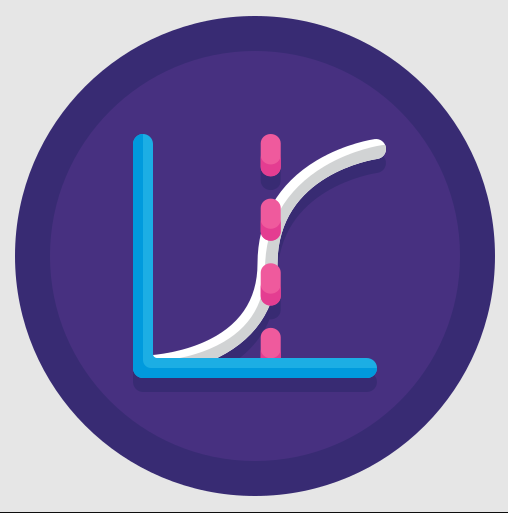

In [73]:
######################### FEATURE ENGINEERING #####################################################
def months_as_a_registered(df):

    df["registration_init_time"] = df["registration_init_time"].apply(lambda x:str(x)[:6])

    # Converter as colunas para objetos datetime
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m')
    df['safra'] = pd.to_datetime(df['safra'], format='%Y%m')

    # Calcular a diferença de meses
    df['months_as_a_registered'] = (df['safra'].dt.year - df['registration_init_time'].dt.year) * 12 + (df['safra'].dt.month - df['registration_init_time'].dt.month)
    df["safra"] = df["safra"].apply(lambda x:str(x)[:7].replace("-", ""))

    return df['months_as_a_registered']

def num_more_than_50(df):

    df["num_less_than_50"] = df["num_25"] + df["num_50"]
    df["num_more_than_50"] = df["num_75"] + df["num_985"] + df["num_100"]
    df["%num_more_than_50"] = round(df["num_more_than_50"]/(df["num_more_than_50"]+df["num_less_than_50"])*100, 2)

    return df["%num_more_than_50"]

def groupy_categorical_woe_for_city(df):
    df['city'] = (
                np.where(df['city'].isin(['13', '14', '17', '5', '4']), 0, 
                np.where(df['city'].isin(['19', '15', '7', '11']), 1, 
                np.where(df['city'].isin(['3', '18', '22','6']), 2, 
                np.where(df['city'].isin(['10', '8', '12']), 3, 
                np.where(df['city'].isin(['21', '20', '9', '1']), 4, 
                np.nan)))))
    )

    return df['city']

def groupy_categorical_woe_for_payment_method_id(df):
    df['payment_method_id'] = (
                np.where(df['payment_method_id'].isin(['32', '14', '19', '31', '34']), 0, 
                np.where(df['payment_method_id'].isin(['41', '10', '11', '21', '18']), 1, 
                np.where(df['payment_method_id'].isin(['23','33', '37', '39', '40']), 2, 
                np.where(df['payment_method_id'].isin(['27', '30', '16', '26', '36']), 3, 
                np.where(df['payment_method_id'].isin(['38', '29','28', '35', '17']), 4, 
                np.nan)))))
    )


    return df['payment_method_id']

def get_temporal_features(df):

    tabela_de_transacoes_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_media_movel.parquet")
    tabela_user_logs_media_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_media_movel.parquet")

    tabela_de_transacoes_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_max_movel.parquet")
    tabela_user_logs_max_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_max_movel.parquet")

    tabela_de_transacoes_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_de_transacoes_min_movel.parquet")
    tabela_user_logs_min_movel = pd.read_parquet("../00_DataMaster/data/tabela_user_logs_min_movel.parquet")

    df = df.merge(tabela_de_transacoes_media_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_media_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_max_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_max_movel, on = ["msno", "safra"], how = "left")

    df = df.merge(tabela_de_transacoes_min_movel, on = ["msno", "safra"], how = "left")
    df = df.merge(tabela_user_logs_min_movel, on = ["msno", "safra"], how = "left")

    return df

######################### PRÉ-PROCESSAMENTO #####################################################

def changing_feature_type(df, feature, type):

    if type == "int":
        df[feature] = df[feature].apply(lambda x: int(x) if pd.notnull(x) else 999999)
    else:
        df[feature] = df[feature].apply(lambda x: float(x) if pd.notnull(x) else 999999)

    df.replace(999999, np.nan, inplace=True)

    return df[feature]

def pre_processing_categorical_nulls(df):
    variaveis_categoricas = ['is_auto_renew', 'gender', 'registered_via', 'city', 'payment_method_id']
    moda_dict = pd.read_excel("../00_DataMaster/pre_processing/mode_training.xlsx").set_index('variavel')['moda'].to_dict()

    def apply_mode_calculator(df, feature, median_dict):
        df[feature] = np.where(df[feature].isnull(), moda_dict[feature], df[feature])
        return df[feature]

    for categorica in variaveis_categoricas:
        df[categorica] = apply_mode_calculator(df, categorica, moda_dict)

    return df

def pre_processing_quantitative_nulls(df):

    variaveis_continuas = [
        'bd',
        'months_as_a_registered',
        'payment_plan_days', 'payment_plan_days_mov_avg_m6', 'payment_plan_days_mov_max_m6', 'payment_plan_days_mov_min_m6',
        'actual_amount_paid', 'actual_amount_paid_mov_avg_m6', 'actual_amount_paid_mov_max_m6', 'actual_amount_paid_mov_min_m6',
        'num_25', 'num_25_mov_avg_m6', 'num_25_mov_max_m6', 'num_25_mov_min_m6', 
        'num_50', 'num_50_mov_avg_m6', 'num_50_mov_max_m6','num_50_mov_min_m6', 
        'num_75', 'num_75_mov_avg_m6', 'num_75_mov_max_m6','num_75_mov_min_m6',
        'num_985', 'num_985_mov_avg_m6', 'num_985_mov_max_m6','num_985_mov_min_m6', 
        'num_100', 'num_100_mov_avg_m6', 'num_100_mov_max_m6','num_100_mov_min_m6', 
        'num_unq', 'num_unq_mov_avg_m6','num_unq_mov_max_m6', 'num_unq_mov_min_m6',
        '%num_more_than_50', '%num_more_than_50_mov_avg_m6','%num_more_than_50_mov_max_m6','%num_more_than_50_mov_min_m6' 
    ]

    mediana_dict = pd.read_excel("../00_DataMaster/pre_processing/median_training.xlsx").set_index('variavel')['mediana'].to_dict()

    def apply_median_calculator(df, feature, median_dict):
        if feature == "bd":
            df[feature] = np.where((df[feature] < 0) | (df[feature] > 100) | (df[feature].isnull()), median_dict[feature], df[feature])
        else:
            df[feature] = np.where((df[feature] < 0) | (df[feature].isnull()), median_dict[feature], df[feature])
        return df[feature]

    for continua in variaveis_continuas:
        df[continua] = apply_median_calculator(df, continua, mediana_dict)

    return df

def target_encoder_woe(df):

    woe_is_auto_renew = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_is_auto_renew.xlsx").set_index('is_auto_renew')['woe'].to_dict()
    woe_gender = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_gender.xlsx").set_index('gender')['woe'].to_dict()
    woe_registered_via = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_registered_via.xlsx").set_index('registered_via')['woe'].to_dict()
    woe_city = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_city.xlsx").set_index('city')['woe'].to_dict()
    woe_payment_method_id = pd.read_excel(f"../00_DataMaster/pre_processing/target_encoder_payment_method_id.xlsx").set_index('payment_method_id')['woe'].to_dict()

    df["is_auto_renew"] = df['is_auto_renew'].map(woe_is_auto_renew).fillna(0)
    df["gender"] = df['gender'].map(woe_gender).fillna(0)
    df["registered_via"] = df['registered_via'].map(woe_registered_via).fillna(0)
    df["city"] = df['city'].map(woe_city).fillna(0)
    df["payment_method_id"] = df['payment_method_id'].map(woe_payment_method_id).fillna(0)

    return df


# <font color='green' style='font-size: 30px;'> 7.1) Leitura de todos os dados </font>
<hr style='border: 2px solid green;'>

In [74]:
### Puxando informações de Treino + Validação + Teste + OOT

df_train = pd.read_parquet("../00_DataMaster/data/df_train.parquet")
df_valid = pd.read_parquet("../00_DataMaster/data/df_valid.parquet")
df_test = pd.read_parquet("../00_DataMaster/data/df_test.parquet")
df_oot = pd.read_parquet("../00_DataMaster/data/df_oot.parquet")

# <font color='green' style='font-size: 30px;'> 7.2) Feature Engineering + Pré-Processamento + Feature Selection</font>
<hr style='border: 2px solid green;'>

In [75]:
def apply_pre_processing_feature_eng_feature_selection(df):

    # Aplicando Feature Engineering
    df['months_as_a_registered'] = months_as_a_registered(df)
    df['%num_more_than_50'] = num_more_than_50(df)
    df['city'] = groupy_categorical_woe_for_city(df)
    df['payment_method_id'] = groupy_categorical_woe_for_payment_method_id(df)
    df = get_temporal_features(df)

    # Aplicando Pré-Processamento
    df["is_auto_renew"] = changing_feature_type(df, "is_auto_renew", "int")
    df["bd"] = changing_feature_type(df, "bd", "int")
    df["registered_via"] = changing_feature_type(df, "registered_via", "int")
    df["payment_plan_days"] = changing_feature_type(df, "payment_plan_days", "float")
    df["actual_amount_paid"] = changing_feature_type(df, "actual_amount_paid", "float")

    df = pre_processing_categorical_nulls(df)
    df = pre_processing_quantitative_nulls(df)
    df = target_encoder_woe(df)

    # Organizando
    variaveis_selecionadas =  [
            'registered_via',
            'months_as_a_registered',
            'city',
            'is_auto_renew',
            'payment_method_id',
            'bd',
            'payment_plan_days_mov_avg_m6',
            'actual_amount_paid_mov_avg_m6', 
            'num_25_mov_avg_m6',
            'num_50_mov_avg_m6',
            'num_75_mov_avg_m6',
            'num_985_mov_avg_m6',
            'num_100_mov_avg_m6',
            'num_unq_mov_avg_m6',
            '%num_more_than_50_mov_avg_m6'
        ]
    safra = ["safra"]
    target = ["churn"]
    user_id = ["msno"]

    df = df[target + user_id + safra + variaveis_selecionadas]

    return df

In [76]:
df_train = apply_pre_processing_feature_eng_feature_selection(df_train)
df_valid = apply_pre_processing_feature_eng_feature_selection(df_valid)
df_test = apply_pre_processing_feature_eng_feature_selection(df_test)
df_oot = apply_pre_processing_feature_eng_feature_selection(df_oot)

# <font color='green' style='font-size: 30px;'> 7.3) Treinamento dos Modelos </font>
<hr style='border: 2px solid green;'>

> 1. Para a parte de modelagem, escolheu-se três modelos: Regressão Logística, Random Forest e XGBoost:

- A Regressão Logística foi escolhida por ser um modelo estável e muito tradicional, com boa capacidade de interpretababilidade 

- A Random Forest é um ensemble o qual utiliza Bagging, portanto, ela reduz expressivamente a variância e previne problemas como Overfitting. 

- O XGBoost, ao lado do CatBoost, é provavelmente o modelo de Boosting com maior poder preditivo que existe atualmente, permitindo que as previsões sejam muito precisas. 


> 2. Realizou-se a consolidação das Métricas de Treino, Teste e Validação Cruzada para cada um dos Modelos: 

- As métricas são consistentes e têm bom desempenho em todos os conjuntos, portanto, isso sugere que o modelo está generalizando bem para dados não vistos e ele é estável, provando que não está superajustado (overfitting).

- Para a definição a métrica de maior importância, levou-se em consideração o retorno financeiro estimado de cada classificação em casos de VN, FN, FP, VP

- As métricas mais importantes para este caso são o Recall, AUC e KS. 

- Altos valores de Recall significam menor número de Falsos Negativos (instâncias que seriam churn mas meu modelo erra afirmando que permaneceriam como clientes), portanto, estamos aumentando a detecção de quem sairia,  e diminuindo a perda de negócios para a instituição.

- A Curva ROC representa a Taxa de Verdadeiros Positivos (o verdadeiro churn) vs Taxa de Falsos Positivos (quem não é churn mas foi marcado como churn). Sob ela, existe a AUC, a qual reflete o quão bem o modelo classifica ambas classes (0 e 1) em relação a diversos thresholds, portanto, quanto maior ela for, melhor eu classifico quem é churn e quem não é.

- Altos valores de KS significam que meu modelo consegue separar melhor os clientes churn dos que não são.

- LogLoss é uma medida que quantifica o quanto os scores de saída de um modelo estão distantes de sua classe real. Essa métrica é interessante pois ela ordena os modelos que possuem um score mais próximo da label real. Ela assemelha-se a um MSE (não são a mesma coisa, elas apenas tem um funcionamento parecido!!!!!) e quanto menor seu valor, melhor o modelo é

> 3. Pelos resultados expressos, viu-se que o modelo com melhor performance foi o XGBoost, portanto, ele será levado para a etapa de otimização

In [77]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

In [78]:
def train_min_max_scaler(df, type):

    cols = list(df.drop(['churn', 'msno', 'safra'], axis = 1).columns)

    # O FILLNA(0) É UMA CONTINGÊNCIA --> A VARIÁVEL 'REGISTERED_VIA' VEIO COM WOE ZERADO POIS NA AMOSTRA DE TREINO NÃO HAVIAM CLIENTES COM CHURN, 
    # SENDO ASSIM, O REGISTED_VIA = 10 FICOU WOE NULO, MAS FORAM APENAS 2 REGISTROS, ENTÃO SEM PROBLEMAS!!!!!
    # O FILLNA(0) NÃO PREJUDICA MEU TREINAMENTO, POIS UM WOE = 0 SIGNIFICA QUE A VARIÁVEL NÃO TEM NENHUMA ASSOCIAÇÃO ENTRE A CLASSE 0 E 1, OU SEJA, ELA É NEUTRA E NÃO AFETA A DECISÃO DO MODELO
    
    df = df[cols]
    df = df.fillna(0)

    scaler = MinMaxScaler()
    scaler.fit(df)
    joblib.dump(scaler, "../00_DataMaster/pre_processing/scaler.pkl")
    print('Scaler Treinado e Salvo com sucesso!')

In [79]:
def Classificador(classificador, x_train, y_train, x_test, y_test, class_weight):

    # Puxa o Scaler Treinado com os dados de Treino
    scaler = joblib.load("../00_DataMaster/pre_processing/scaler.pkl")

    
    cols = list(x_train.drop(['msno', 'safra'], axis = 1).columns)

    # O FILLNA(0) É UMA CONTINGÊNCIA --> A VARIÁVEL 'REGISTERED_VIA' VEIO COM WOE ZERADO POIS NA AMOSTRA DE TREINO NÃO HAVIAM CLIENTES COM CHURN, 
    # SENDO ASSIM, O REGISTED_VIA = 10 FICOU WOE NULO, MAS FORAM APENAS 2 REGISTROS, ENTÃO SEM PROBLEMAS!!!!!
    # O FILLNA(0) NÃO PREJUDICA MEU TREINAMENTO, POIS UM WOE = 0 SIGNIFICA QUE A VARIÁVEL NÃO TEM NENHUMA ASSOCIAÇÃO ENTRE A CLASSE 0 E 1, OU SEJA, ELA É NEUTRA E NÃO AFETA A DECISÃO DO MODELO
    
    x_train = x_train[cols].fillna(0)
    x_test = x_test[cols].fillna(0)

    # Define as colunas categóricas e numéricas
    models = {
        'Regressão Logística': make_pipeline(
            ColumnTransformer([
                ('scaler', make_pipeline(scaler), cols)
            ]),
            LogisticRegression(
                random_state=42, # Semente aleatória para reproducibilidade dos resultados
                class_weight={0: 1, 1: class_weight}, # Peso atribuído às classes. Pode ser útil para lidar com conjuntos de dados desbalanceados.
                C=1, # Parâmetro de regularização inversa. Controla a força da regularização.
                penalty='l2', # Tipo de regularização. 'l1', 'l2', 'elasticnet', ou 'none'.
                max_iter=50, # Número máximo de iterações para a convergência do otimizador.
                solver='liblinear' # Algoritmo de otimização. 'newton-cg', 'lbfgs', 'liblinear' (gradiente descendente), 'sag' (Stochastic gradient descent), 'saga' (Stochastic gradient descent que suporta reg L1).
                )
        ),
        'Random Forest': make_pipeline(
        RandomForestClassifier(
            random_state=42,            # Semente aleatória para reproducibilidade dos resultados
            criterion='entropy',       # Critério usado para medir a qualidade de uma divisão
            n_estimators=50,           # Número de árvores na floresta (equivalente ao n_estimators no XGBoost)
            max_depth = 6,                # Profundidade máxima de cada árvore
            class_weight={0:1, 1:class_weight},  # Peso das classes em casos desequilibrados
            min_samples_split=2,        # O número mínimo de amostras necessárias para dividir um nó interno
            min_samples_leaf=1,         # O número mínimo de amostras necessárias para ser um nó folha
            max_features='auto',        # O número máximo de características a serem consideradas para a melhor divisão
            max_leaf_nodes=None,        # O número máximo de folhas que uma árvore pode ter
            bootstrap=True               # Se deve ou não amostrar com substituição ao construir árvores
            )
        ),
        'XGBoost': make_pipeline(
        XGBClassifier(
            random_state=42,            # Semente aleatória para reproducibilidade dos resultados
            n_estimators=50,           # Número de árvores no modelo (equivalente ao n_estimators na Random Forest)
            max_depth = 6,                # Profundidade máxima de cada árvore
            learning_rate = 0.04,         # Taxa de aprendizado - controla a contribuição de cada árvore
            eval_metric='logloss',      # Métrica de avaliação durante o treinamento, 'logloss' é comum para problemas de classificação binária
            objective='binary:logistic',# Define o objetivo do modelo, 'binary:logistic' para classificação binária
            scale_pos_weight=class_weight,  # Peso das classes positivas em casos desequilibrados
            reg_alpha=1,                # Termo de regularização L1 (penalidade nos pesos)
            reg_lambda=0,               # Termo de regularização L2 (penalidade nos quadrados dos pesos)
            gamma=1,                    # Controle de poda da árvore, maior gamma leva a menos crescimento da árvore
            colsample_bytree=0.5,       # Fração de características a serem consideradas ao construir cada árvore
            subsample=0.5,              # Fração de amostras a serem usadas para treinar cada árvore
            base_score=0.5              # Threshold de Probabilidade de Decisão do Classificador (geralmente é 0.5 para problemas de classificação binária)
            )
        )
    }

    if classificador in models:
        model = models[classificador]
    else:
        print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test

In [80]:
def validacao_cruzada_classificacao(classificador, df, target_column, n_splits, class_weight):

    columns_selected = [
            'registered_via',
            'months_as_a_registered',
            'city',
            'is_auto_renew',
            'payment_method_id',
            'bd',
            'payment_plan_days_mov_avg_m6',
            'actual_amount_paid_mov_avg_m6', 
            'num_25_mov_avg_m6',
            'num_50_mov_avg_m6',
            'num_75_mov_avg_m6',
            'num_985_mov_avg_m6',
            'num_100_mov_avg_m6',
            'num_unq_mov_avg_m6',
            '%num_more_than_50_mov_avg_m6',
            'churn'
        ]
    

    df_raw = df[columns_selected].copy()

    # Inicializar o KFold para dividir os dados
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Listas para armazenar as métricas para cada fold
    accuracy_scores = [] # Lista para armazenar os valores de ACURÁCIA
    precision_scores = [] # Lista para armazenar os valores de PRECISION
    recall_scores = [] # Lista para armazenar os valores de RECALL
    f1_scores = [] # Lista para armazenar os valores de F1
    auc_scores = []  # Lista para armazenar os valores de AUC
    ks_scores = []   # Lista para armazenar os valores de KS
    logloss_scores = [] # Lista para armazenar os valores de LogLoss
    cv_results = []  # Lista para armazenar os resultados da VALIDAÇÃO CRUZADA

    # Loop pelos folds
    for train_idx, test_idx in kfold.split(df_raw):
        # Criar DataFrames de treino e teste
        df_train = df_raw.iloc[train_idx]
        df_test = df_raw.iloc[test_idx]

        # Filtragem das Features que passaram no Feature Selection
        df_train = df_train[columns_selected]
        df_test = df_test[columns_selected]

        # Separação Feature e Target
        x_train, y_train = separa_feature_target('churn', df_train)
        x_test, y_test = separa_feature_target('churn', df_test)

    # Roda Modelos
        models = {
            'Regressão Logística': make_pipeline(
                LogisticRegression(
                    random_state=42, # Semente aleatória para reproducibilidade dos resultados
                    class_weight={0: 1, 1: class_weight}, # Peso atribuído às classes. Pode ser útil para lidar com conjuntos de dados desbalanceados.
                    C=1, # Parâmetro de regularização inversa. Controla a força da regularização.
                    penalty='l2', # Tipo de regularização. 'l1', 'l2', 'elasticnet', ou 'none'.
                    max_iter=50, # Número máximo de iterações para a convergência do otimizador.
                    solver='liblinear' # Algoritmo de otimização. 'newton-cg', 'lbfgs', 'liblinear' (gradiente descendente), 'sag' (Stochastic gradient descent), 'saga' (Stochastic gradient descent que suporta reg L1).
                    )
            ),
            'Random Forest': make_pipeline(
            RandomForestClassifier(
                random_state=42,            # Semente aleatória para reproducibilidade dos resultados
                criterion='entropy',       # Critério usado para medir a qualidade de uma divisão
                n_estimators=50,           # Número de árvores na floresta (equivalente ao n_estimators no XGBoost)
                max_depth = 6,                # Profundidade máxima de cada árvore
                class_weight={0:1, 1:class_weight},  # Peso das classes em casos desequilibrados
                min_samples_split=2,        # O número mínimo de amostras necessárias para dividir um nó interno
                min_samples_leaf=1,         # O número mínimo de amostras necessárias para ser um nó folha
                max_features='auto',        # O número máximo de características a serem consideradas para a melhor divisão
                max_leaf_nodes=None,        # O número máximo de folhas que uma árvore pode ter
                bootstrap=True               # Se deve ou não amostrar com substituição ao construir árvores
                )
            ),
            'XGBoost': make_pipeline(
            XGBClassifier(
                random_state=42,            # Semente aleatória para reproducibilidade dos resultados
                tree_method = 'gpu_hist',
                n_estimators=50,           # Número de árvores no modelo (equivalente ao n_estimators na Random Forest)
                max_depth = 6,                # Profundidade máxima de cada árvore
                learning_rate = 0.04,         # Taxa de aprendizado - controla a contribuição de cada árvore
                eval_metric='logloss',      # Métrica de avaliação durante o treinamento, 'logloss' é comum para problemas de classificação binária
                objective='binary:logistic',# Define o objetivo do modelo, 'binary:logistic' para classificação binária
                scale_pos_weight=class_weight,  # Peso das classes positivas em casos desequilibrados
                reg_alpha=1,                # Termo de regularização L1 (penalidade nos pesos)
                reg_lambda=0,               # Termo de regularização L2 (penalidade nos quadrados dos pesos)
                gamma=1,                    # Controle de poda da árvore, maior gamma leva a menos crescimento da árvore
                colsample_bytree=0.5,       # Fração de características a serem consideradas ao construir cada árvore
                subsample=0.5,              # Fração de amostras a serem usadas para treinar cada árvore
                base_score=0.5              # Threshold de Probabilidade de Decisão do Classificador (geralmente é 0.5 para problemas de classificação binária)
                )
            )
        }

        if classificador in models:
            model = models[classificador]
        else:
            print('Utilize Regressão Logística, Random Forest ou XGBoost como opções de Classificadores!')

        # Treinar o modelo usando os dados de treinamento
        model.fit(x_train, y_train)

        # Obter as probabilidades previstas para ambas as classes
        y_proba = model.predict_proba(x_test)

        # Fazer as previsões usando o modelo nos dados de teste
        y_pred = model.predict(x_test)

        # Calcular as métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        y_proba = model.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        ks = max(tpr - fpr)
        logloss = log_loss(y_test, y_proba[:, 1])

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        auc_scores.append(roc_auc)
        ks_scores.append(ks)
        logloss_scores.append(logloss)

        # Adicionar resultados de validação cruzada ao DataFrame
        fold_results = pd.DataFrame({
            'churn': y_test['churn'].values,
            'y_predict': y_pred,
            'predict_proba_0': y_proba[:, 0],  # Probabilidade da classe 0
            'predict_proba_1': y_proba[:, 1]  # Probabilidade da classe 1
        })
        cv_results.append(fold_results)


    # Calcular a média das métricas para todos os folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores),
    mean_ks = np.mean(ks_scores)
    mean_logloss = np.mean(logloss_scores)

    # Criar um DataFrame com as métricas
    metricas_finais = pd.DataFrame({
        'Acuracia': mean_accuracy,
        'Precisao': mean_precision,
        'Recall': mean_recall,
        'F1-Score': mean_f1,
        'AUC':mean_auc,
        'KS': mean_ks,
        'LogLoss': mean_logloss,
        'Etapa': 'validacao_cruzada',
        'Classificador': classificador
    }, index=[1])

    return metricas_finais, cv_results

In [81]:
def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test, y_predict_proba_train, y_predict_proba_test, etapa_1, etapa_2):

    predict_proba_train = pd.DataFrame(y_predict_proba_train.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
    predict_proba_test = pd.DataFrame(y_predict_proba_test.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

    # Treino
    accuracy_train = accuracy_score(y_train, y_predict_train)
    precision_train = precision_score(y_train, y_predict_train)
    recall_train = recall_score(y_train, y_predict_train)
    f1_train = f1_score(y_train, y_predict_train)
    roc_auc_train = roc_auc_score(y_train['churn'], predict_proba_train['predict_proba_1'])
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train['churn'], predict_proba_train['predict_proba_1'])
    ks_train = max(tpr_train - fpr_train)
    logloss_train = log_loss(y_train['churn'], predict_proba_train['predict_proba_1'])
    metricas_treino = pd.DataFrame(
        {
            'Acuracia': accuracy_train, 
            'Precisao': precision_train, 
            'Recall': recall_train, 
            'F1-Score': f1_train, 
            'AUC': roc_auc_train, 
            'KS': ks_train, 
            'LogLoss':logloss_train,
            'Etapa': etapa_1, 
            'Classificador': classificador
        }, 
        index=[0]
    )
    
    # Teste
    accuracy_test = accuracy_score(y_test, y_predict_test)
    precision_test = precision_score(y_test, y_predict_test)
    recall_test = recall_score(y_test, y_predict_test)
    f1_test = f1_score(y_test, y_predict_test)
    roc_auc_test = roc_auc_score(y_test['churn'], predict_proba_test['predict_proba_1'])
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test['churn'], predict_proba_test['predict_proba_1'])
    ks_test = max(tpr_test - fpr_test)
    logloss_test = log_loss(y_test['churn'], predict_proba_test['predict_proba_1'])
    metricas_teste = pd.DataFrame(
        {
            'Acuracia': accuracy_test, 
            'Precisao': precision_test, 
            'Recall': recall_test, 
            'F1-Score': f1_test, 
            'AUC': roc_auc_test, 
            'KS': ks_test, 
            'LogLoss':logloss_test,
            'Etapa': etapa_2, 
            'Classificador': classificador
        }, 
        index=[0]
    )
    
    # Consolidando
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais


def metricas_classificacao_modelos_juntos(lista_modelos):
    if len(lista_modelos) > 0:
        metricas_modelos = pd.concat(lista_modelos)#.set_index('Classificador')
    else:
        metricas_modelos = lista_modelos[0]
    # Redefina o índice para torná-lo exclusivo
    df = metricas_modelos.reset_index(drop=True)
    df = df.round(2)

    # Função para formatar as células com base na Etapa
    def color_etapa(val):
        color = 'black'
        if val == 'treino':
            color = 'blue'
        elif val == 'teste':
            color = 'red'
        return f'color: {color}; font-weight: bold;'

    # Função para formatar os valores com até duas casas decimais
    def format_values(val):
        if isinstance(val, (int, float)):
            return f'{val:.2f}'
        return val

    # Estilizando o DataFrame
    styled_df = df.style\
        .format(format_values)\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: white; font-size: 14px', subset=pd.IndexSlice[:, :])\
        .applymap(color_etapa, subset=pd.IndexSlice[:, :])\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px', subset=pd.IndexSlice[:, 'Acuracia':'F1-Score'])\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px', subset=pd.IndexSlice[:, 'Etapa'])\
        .set_table_styles([
            {'selector': 'thead', 'props': [('color', 'black'), ('font-weight', 'bold'), ('background-color', 'lightgray')]}
        ])

    # Mostrando o DataFrame estilizado
    styled_df
    return styled_df

In [82]:
x_train = separa_feature_target('churn', df_train)[0]
y_train = separa_feature_target('churn', df_train)[1]

x_valid = separa_feature_target('churn', df_valid)[0]
y_valid = separa_feature_target('churn', df_valid)[1]

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(1370504, 17)
(1370504, 1)
(151938, 17)
(151938, 1)


In [83]:
train_min_max_scaler(df_train, 'train')

Scaler Treinado e Salvo com sucesso!


In [84]:
#Regressão Logística
reg_logistic, y_predict_train_reg_logistic, y_predict_valid_reg_logistic,  y_predict_proba_train_reg_logistic, y_predict_proba_valid_reg_logistic = Classificador(
                                                                                                                                                    'Regressão Logística', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_valid, 
                                                                                                                                                    y_valid, 
                                                                                                                                                    15)
metricas_reg_logistic = metricas_classificacao('Regressão Logística', y_train, y_predict_train_reg_logistic, y_valid, y_predict_valid_reg_logistic, y_predict_proba_train_reg_logistic, y_predict_proba_valid_reg_logistic, 'treino', 'validacao')
metricas_validacao_cruzada_reg_logistic, results_validacao_cruzada_reg_logistic = validacao_cruzada_classificacao('Regressão Logística', pd.concat([df_train, df_valid]), 'churn', 5, 15)
print('Rodou Regressão Logística!')
print()

# Random Forest
random_forest, y_predict_train_random_forest, y_predict_valid_random_forest, y_predict_proba_train_random_forest, y_predict_proba_valid_random_forest = Classificador(
                                                                                                                                                    'Random Forest', 
                                                                                                                                                    x_train, 
                                                                                                                                                    y_train, 
                                                                                                                                                    x_valid, 
                                                                                                                                                    y_valid, 
                                                                                                                                                    15)
metricas_random_forest = metricas_classificacao('Random Forest', y_train, y_predict_train_random_forest, y_valid, y_predict_valid_random_forest, y_predict_proba_train_random_forest, y_predict_proba_valid_random_forest, 'treino', 'validacao')
metricas_validacao_cruzada_random_forest, results_validacao_cruzada_random_forest = validacao_cruzada_classificacao('Random Forest', pd.concat([df_train, df_valid]), 'churn', 5, 15)
print('Rodou Random Forest!')
print()

# XGBoost
xgboost, y_predict_train_xgboost, y_predict_valid_xgboost, y_predict_proba_train_xgboost, y_predict_proba_valid_xgboost = Classificador(
                                                                                                                        'XGBoost', 
                                                                                                                        x_train, 
                                                                                                                        y_train, 
                                                                                                                        x_valid, 
                                                                                                                        y_valid, 
                                                                                                                        15)
metricas_xgboost = metricas_classificacao('XGBoost', y_train, y_predict_train_xgboost, y_valid, y_predict_valid_xgboost, y_predict_proba_train_xgboost, y_predict_proba_valid_xgboost, 'treino', 'validacao')
metricas_validacao_cruzada_xgboost, results_validacao_cruzada_xgboost = validacao_cruzada_classificacao('XGBoost', pd.concat([df_train, df_valid]), 'churn', 5, 15)
print('Rodou XGBoost!')
print()

Rodou Regressão Logística!

Rodou Random Forest!

Rodou XGBoost!



In [85]:
print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
     [
         metricas_reg_logistic, 
         metricas_validacao_cruzada_reg_logistic,
         metricas_random_forest,
         metricas_validacao_cruzada_random_forest,
         metricas_xgboost,
         metricas_validacao_cruzada_xgboost,
     ]
)
display(metricas_finais)

Métricas Finais


# <font color='green' style='font-size: 30px;'> 7.4) Otimização </font>
<hr style='border: 2px solid green;'>

> 1. Optou-se por utilizar um Algoritmo de Busca Bayesiana para achar a melhor combinação de hiperparâmetros

> 2. Esse algoritmo aplica probabilidades condicionais para decidir, no fim, a combinação de hiperparâmetros que possui a maior probabilidade de maximizar a métrica desejada

> 3. Após a otimização, notou-se uma melhora expressiva do Recall, AUC e KS , contando com apenas uma ligeira perda do Precision.

> 4. Como hiperparâmetros de otimização, escolheu-se os seguintes:

- Logloss: A função de custo utilizada para que o modelo calculasse os erros foi a LogLoss (Função de Perda Logarítmica), a qual quantifica o erro em problemas de classificação binária ou multilabel. Ela é usada para calcular o gradiente e a Hessianiana, que são usados no processo de otimização do modelo por meio do algoritmo de boosting. Portanto, a LogLoss influencia diretamente a construção de cada árvore durante o treinamento do XGBoost. A LogLoss é uma medida que penaliza mais fortemente as previsões que estão longe do valor real, incentivando o modelo a fazer previsões mais precisas em qt_parcelasos de probabilidade. Ela é uma métrica apropriada para problemas de classificação binária e multiclasse.

- Número de Estimadores: O Número de estimador diz respeito à quantidade de árvores treinadas dentro de um modelo de Boosting. O número ideal foi 100, portanto, 100 árvores foram treinadas a fim de corrigir os erros de predição até acharmos o melhor modelo possível.

- Profundidade da Árvore: É o número de profundidade da árvore, ou seja, o número de features que a árvore utiliza para de fato decidir a classificação da instância. O ranking de folhas é criado através do ganho de informação ou medida de impureza

- Learning Rate: É a taxa de aprendizado do modelo, ou seja, decide a contribuição de cada árvore para o modelo multiplicando a contribuição de cada árvore e assim ajustando a magnitude das atualizações feitas em cada passo.

- Regularização L1 (Lasso) e Regularização L2 (Ridge): No XGBoost, os qt_parcelasos "reg_alpha" e "reg_lambda" são utilizados para controlar a regularização L1 e L2. O primeiro penaliza os valores absolutos dos pesos associados aos qt_parcelasos lineares (ou seja, as "folhas") da árvore e incentiva alguns desses pesos a se tornarem exatamente zero, resultando em uma árvore mais esparsa; ao passo que o segundo penaliza os quadrados dos valores dos pesos associados aos qt_parcelasos lineares da árvore e desencoraja fortemente valores grandes dos pesos, promovendo árvores com valores de peso menores. Essas técnicas afetam os valores associados aos splits e folhas da árvore, agindo como penalizações que controlam a complexidade do modelo.

- Gamma: O hiperparâmetro gamma controla a poda da árvore, portanto, valores mais altos impedem que a árvore cresça sem parar. Isso é útil pois tira complexidade do modelo, sendo também um hiperparâmetro de regularização

- Número de Colunas e Amostras: O Colsample-bytree e o subsample servem para definir respectivamente o percentual de colunas e amostras que serão utilizadas na criação das árvores do modelo

- Class Weight: Como o problema trata-se de uma situação de desbalanceamento, o class_weight permite que pesos diferentes sejam atribuidos às classes durante o treinamento, tornando o modelo mais sensível à classe minoritária e ela tenha mais influência no treinamento a fim de melhorar os resultados.

In [86]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y

In [87]:
def otimizacao(classificador, x_train, y_train, x_test, y_test):
    cols = list(x_train.drop(['msno', 'safra'], axis = 1).columns)

    # O FILLNA(0) É UMA CONTINGÊNCIA --> A VARIÁVEL 'REGISTERED_VIA' VEIO COM WOE ZERADO POIS NA AMOSTRA DE TREINO NÃO HAVIAM INADIMPLENTES, 
    # SENDO ASSIM, O REGISTED_VIA = 10 FICOU WOE NULO, MAS FORAM APENAS 2 REGISTROS, ENTÃO SEM PROBLEMAS!!!!!
    # O FILLNA(0) NÃO PREJUDICA MEU TREINAMENTO, POIS UM WOE = 0 SIGNIFICA QUE A VARIÁVEL NÃO TEM NENHUMA ASSOCIAÇÃO ENTRE A CLASSE 0 E 1, OU SEJA, ELA É NEUTRA E NÃO AFETA A DECISÃO DO MODELO
    
    x_train = x_train[cols].fillna(0)
    x_test = x_test[cols].fillna(0)

    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        BayesSearchCV(
            XGBClassifier(random_state=42, tree_method = 'gpu_hist', eval_metric='logloss', objective='binary:logistic'),
            {
                'n_estimators': (50, 75, 100), # Número de Árvores construídas
                'max_depth': (4, 5, 6, 7), # Profundidade Máxima de cada Árvore
                'learning_rate': (0.01, 0.03, 0.05), # Tamanho do passo utilizado no Método do Gradiente Descendente
                'reg_alpha':(0.5, 1), # Valor do Alpha aplicado durante a Regularização Lasso L1 
                'reg_lambda':(0.5, 1), # Valor do Lambda aplicado durante a Regularização Ridge L2
                'gamma':(0.5, 1), # Valor mínimo permitido para um Nó de Árvore ser aceito. Ajuda a controlar o crescimento das Árvores, evitando divisões insignificantes
                'colsample_bytree':(0.5, 1), # Porcentagem de Colunas utilizada para a amostragem aleatória durante a criação das Árvores
                'subsample':(0.5, 1), # Porcentagem de Linhas utilizada para a amostragem aleatória durante a criação das Árvores
                'scale_pos_weight':(12, 15, 18, 20), # Peso atribuído a classe positiva, aumentando a importância da classe minoritária
            },
            n_iter=10,
            random_state=42,
            n_jobs=-1,
            scoring='recall',
            cv=5
        )
    )

    np.int = int # CORREÇÃO POIS O MÉTODO .fit() DA CLASSE SKOPT ESTAVA COM PROBLEMAS DEVIDO A ATUALIZAÇÃO DO NUMPY

    # Treina o modelo
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    y_proba_train = model.predict_proba(x_train)
    y_proba_test = model.predict_proba(x_test)

    melhores_hiperparametros = model.named_steps['bayessearchcv'].best_params_
    hiperparametros = pd.DataFrame([melhores_hiperparametros])

    best_hiperpams = []
    for chave, valor in melhores_hiperparametros.items():
        best_hiperpams.append([chave, valor])

    pivot = pd.DataFrame(best_hiperpams).T
    pivot.columns = pivot.iloc[0]
    pivot = pivot.drop(0)

    # Crie um DataFrame a partir dos hiperparâmetros
    df = hiperparametros.reset_index(drop=True)
    df = df.round(2)

    def color_etapa(val):
        color = 'black'
        if val == 'treino':
            color = 'blue'
        elif val == 'teste':
            color = 'red'
        return f'color: {color}; font-weight: bold;'

    # Função para formatar os valores com até duas casas decimais
    def format_values(val):
        if isinstance(val, (int, float)):
            return f'{val:.2f}'
        return val

    # Estilizando o DataFrame
    styled_df = df.style\
        .format(format_values)\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: white; font-size: 14px')\
        .applymap(color_etapa, subset=pd.IndexSlice[:, :])\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px')\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px')\
        .set_table_styles([
            {'selector': 'thead', 'props': [('color', 'black'), ('font-weight', 'bold'), ('background-color', 'lightgray')]}
        ])

    return model, y_pred_train, y_pred_test, y_proba_train, y_proba_test, styled_df, pivot

In [88]:
def validacao_cruzada_classificacao_otimizada(classificador, df, target_column, n_splits, best_hiperpams):

    columns_selected = [
            'registered_via',
            'months_as_a_registered',
            'city',
            'is_auto_renew',
            'payment_method_id',
            'bd',
            'payment_plan_days_mov_avg_m6',
            'actual_amount_paid_mov_avg_m6', 
            'num_25_mov_avg_m6',
            'num_50_mov_avg_m6',
            'num_75_mov_avg_m6',
            'num_985_mov_avg_m6',
            'num_100_mov_avg_m6',
            'num_unq_mov_avg_m6',
            '%num_more_than_50_mov_avg_m6',
            'churn'
        ]
    

    df_raw = df[columns_selected].copy()

    # Inicializar o KFold para dividir os dados
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Listas para armazenar as métricas para cada fold
    accuracy_scores = [] # Lista para armazenar os valores de ACURÁCIA
    precision_scores = [] # Lista para armazenar os valores de PRECISION
    recall_scores = [] # Lista para armazenar os valores de RECALL
    f1_scores = [] # Lista para armazenar os valores de F1
    auc_scores = []  # Lista para armazenar os valores de AUC
    ks_scores = []   # Lista para armazenar os valores de KS
    logloss_scores = [] # Lista para armazenar os valores de LogLoss
    cv_results = []  # Lista para armazenar os resultados da VALIDAÇÃO CRUZADA

    # Loop pelos folds
    for train_idx, test_idx in kfold.split(df_raw):
        # Criar DataFrames de treino e teste
        df_train = df_raw.iloc[train_idx]
        df_test = df_raw.iloc[test_idx]

        # Filtragem das Features que passaram no Feature Selection
        df_train = df_train[columns_selected]
        df_test = df_test[columns_selected]

        # Separação Feature e Target
        x_train, y_train = separa_feature_target('churn', df_train)
        x_test, y_test = separa_feature_target('churn', df_test)

        # Melhores Hiperparâmetros
        melhores_hiperparametros = best_hiperpams
        colsample_bytree = round(melhores_hiperparametros['colsample_bytree'][1], 2)
        gamma = round(melhores_hiperparametros['gamma'][1], 2)
        learning_rate = round(melhores_hiperparametros['learning_rate'][1], 2)
        max_depth = int(round(melhores_hiperparametros['max_depth'][1], 2))
        n_estimators = int(round(melhores_hiperparametros['n_estimators'][1], 2))
        reg_alpha = round(melhores_hiperparametros['reg_alpha'][1], 2)
        reg_lambda = round(melhores_hiperparametros['reg_lambda'][1], 2)
        scale_pos_weight = int(round(melhores_hiperparametros['scale_pos_weight'][1], 2))
        subsample = round(melhores_hiperparametros['subsample'][1], 2)

        # Roda Modelo
        model = make_pipeline(
            XGBClassifier(
                random_state=42,            # Semente aleatória para reproducibilidade dos resultados
                tree_method = 'gpu_hist',
                n_estimators=n_estimators,           # Número de árvores no modelo (equivalente ao n_estimators na Random Forest)
                max_depth = max_depth,                # Profundidade máxima de cada árvore
                learning_rate = learning_rate,         # Taxa de aprendizado - controla a contribuição de cada árvore
                eval_metric='logloss',      # Métrica de avaliação durante o treinamento, 'logloss' é comum para problemas de classificação binária
                objective='binary:logistic',# Define o objetivo do modelo, 'binary:logistic' para classificação binária
                scale_pos_weight=scale_pos_weight,  # Peso das classes positivas em casos desequilibrados
                reg_alpha=reg_alpha,                # Termo de regularização L1 (penalidade nos pesos)
                reg_lambda=reg_lambda,               # Termo de regularização L2 (penalidade nos quadrados dos pesos)
                gamma=gamma,                    # Controle de poda da árvore, maior gamma leva a menos crescimento da árvore
                colsample_bytree=colsample_bytree,       # Fração de características a serem consideradas ao construir cada árvore
                subsample=subsample,              # Fração de amostras a serem usadas para treinar cada árvore
                )
            )

        # Treinar o modelo usando os dados de treinamento
        model.fit(x_train, y_train)

        # Obter as probabilidades previstas para ambas as classes
        y_proba = model.predict_proba(x_test)

        # Fazer as previsões usando o modelo nos dados de teste
        y_pred = model.predict(x_test)

        # Calcular as métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        y_proba = model.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        ks = max(tpr - fpr)
        logloss = log_loss(y_test, y_proba[:, 1])

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        auc_scores.append(roc_auc)
        ks_scores.append(ks)
        logloss_scores.append(logloss)

        # Adicionar resultados de validação cruzada ao DataFrame
        fold_results = pd.DataFrame({
            'churn': y_test['churn'].values,
            'y_predict': y_pred,
            'predict_proba_0': y_proba[:, 0],  # Probabilidade da classe 0
            'predict_proba_1': y_proba[:, 1]  # Probabilidade da classe 1
        })
        cv_results.append(fold_results)


    # Calcular a média das métricas para todos os folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores),
    mean_ks = np.mean(ks_scores)
    mean_logloss = np.mean(logloss_scores)

    # Criar um DataFrame com as métricas
    metricas_finais = pd.DataFrame({
        'Acuracia': mean_accuracy,
        'Precisao': mean_precision,
        'Recall': mean_recall,
        'F1-Score': mean_f1,
        'AUC':mean_auc,
        'KS': mean_ks,
        'LogLoss': mean_logloss,
        'Etapa': 'validacao_cruzada',
        'Classificador': classificador
    }, index=[1])

    return metricas_finais, cv_results

In [89]:
def metricas_classificacao(classificador, y_train, y_predict_train, y_test, y_predict_test, y_predict_proba_train, y_predict_proba_test, etapa_1, etapa_2):

    predict_proba_train = pd.DataFrame(y_predict_proba_train.tolist(), columns=['predict_proba_0', 'predict_proba_1'])
    predict_proba_test = pd.DataFrame(y_predict_proba_test.tolist(), columns=['predict_proba_0', 'predict_proba_1'])

    # Treino
    accuracy_train = accuracy_score(y_train, y_predict_train)
    precision_train = precision_score(y_train, y_predict_train)
    recall_train = recall_score(y_train, y_predict_train)
    f1_train = f1_score(y_train, y_predict_train)
    roc_auc_train = roc_auc_score(y_train['churn'], predict_proba_train['predict_proba_1'])
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train['churn'], predict_proba_train['predict_proba_1'])
    ks_train = max(tpr_train - fpr_train)
    logloss_train = log_loss(y_train['churn'], predict_proba_train['predict_proba_1'])
    metricas_treino = pd.DataFrame(
        {
            'Acuracia': accuracy_train, 
            'Precisao': precision_train, 
            'Recall': recall_train, 
            'F1-Score': f1_train, 
            'AUC': roc_auc_train, 
            'KS': ks_train, 
            'LogLoss':logloss_train,
            'Etapa': etapa_1, 
            'Classificador': classificador
        }, 
        index=[0]
    )
    
    # Teste
    accuracy_test = accuracy_score(y_test, y_predict_test)
    precision_test = precision_score(y_test, y_predict_test)
    recall_test = recall_score(y_test, y_predict_test)
    f1_test = f1_score(y_test, y_predict_test)
    roc_auc_test = roc_auc_score(y_test['churn'], predict_proba_test['predict_proba_1'])
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test['churn'], predict_proba_test['predict_proba_1'])
    ks_test = max(tpr_test - fpr_test)
    logloss_test = log_loss(y_test['churn'], predict_proba_test['predict_proba_1'])
    metricas_teste = pd.DataFrame(
        {
            'Acuracia': accuracy_test, 
            'Precisao': precision_test, 
            'Recall': recall_test, 
            'F1-Score': f1_test, 
            'AUC': roc_auc_test, 
            'KS': ks_test, 
            'LogLoss':logloss_test,
            'Etapa': etapa_2, 
            'Classificador': classificador
        }, 
        index=[0]
    )
    
    # Consolidando
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

def metricas_classificacao_modelos_juntos(lista_modelos):
    if len(lista_modelos) > 0:
        metricas_modelos = pd.concat(lista_modelos)#.set_index('Classificador')
    else:
        metricas_modelos = lista_modelos[0]
    # Redefina o índice para torná-lo exclusivo
    df = metricas_modelos.reset_index(drop=True)
    df = df.round(2)

    # Função para formatar as células com base na Etapa
    def color_etapa(val):
        color = 'black'
        if val == 'treino':
            color = 'blue'
        elif val == 'teste':
            color = 'red'
        return f'color: {color}; font-weight: bold;'

    # Função para formatar os valores com até duas casas decimais
    def format_values(val):
        if isinstance(val, (int, float)):
            return f'{val:.2f}'
        return val

    # Estilizando o DataFrame
    styled_df = df.style\
        .format(format_values)\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: white; font-size: 14px', subset=pd.IndexSlice[:, :])\
        .applymap(color_etapa, subset=pd.IndexSlice[:, :])\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px', subset=pd.IndexSlice[:, 'Acuracia':'F1-Score'])\
        .applymap(lambda x: 'color: black; font-weight: bold; background-color: #white; font-size: 14px', subset=pd.IndexSlice[:, 'Etapa'])\
        .set_table_styles([
            {'selector': 'thead', 'props': [('color', 'black'), ('font-weight', 'bold'), ('background-color', 'lightgray')]}
        ])

    # Mostrando o DataFrame estilizado
    styled_df
    return styled_df


In [90]:
# Otimizador via Bayes Search
model_otimizado, y_predict_train_otimizado, y_predict_valid_otimizado, y_proba_train_otimizado, y_proba_valid_otimizado, hiperparametros, best_hiperpams = otimizacao('XGBoost', x_train, y_train, x_valid, y_valid)
metricas_otimizadas_xgboost = metricas_classificacao('Bayes Search + XGBoost', y_train, y_predict_train_otimizado, y_valid, y_predict_valid_otimizado, y_proba_train_otimizado, y_proba_valid_otimizado, 'treino', 'validacao')

# Validação cruzada com os hiperparâmetros do Otimizador Bayes Search
metricas_validacao_cruzada_otimizada_xgboost, results_validacao_cruzada_otimizada_xgboost = validacao_cruzada_classificacao_otimizada('Bayes Search + XGBoost', pd.concat([df_train, df_valid]), 'churn', 5, best_hiperpams)

In [91]:
# Validação cruzada com os hiperparâmetros do Otimizador Bayes Search
metricas_validacao_cruzada_otimizada_xgboost, results_validacao_cruzada_otimizada_xgboost = validacao_cruzada_classificacao_otimizada('Bayes Search + XGBoost', pd.concat([df_train, df_valid]), 'churn', 5, best_hiperpams)

# Métricas Otimizadas
print(f'Melhores Hiperparâmetros')
display(hiperparametros)
print('Métricas Finais')
metricas_finais = metricas_classificacao_modelos_juntos(
     [
         metricas_otimizadas_xgboost,
         metricas_validacao_cruzada_otimizada_xgboost
     ]
)
display(metricas_finais)

Melhores Hiperparâmetros


Métricas Finais


# <font color='green' style='font-size: 30px;'> 7.5) Estabilidade ao longo das Safras + Calibração de Probabilidade </font>
<hr style='border: 2px solid green;'>


> 1. Embora os resultados do Modelo Otimizado sejam bastante promissores, é importante salientar que ainda não são suficientes para decidirmos se o modelo está perfeito

> 2. Nesse âmbito, existem duas análises importantes: estabilidade e calibração de probabilidade

> 3. A estabilidade é importante para avaliarmos se as métricas são estáveis ao longo do tempo, ou seja, o modelo é robusto com o passar dos meses

> 4. A calibração da probabilidade é importante pois o modelo tem de refletir o que acontece na vida real. Se colocássemos um limiar muito baixo, ou seja, clientes com baixa probabilidade de serem churn serem marcados como churn, com certeza acertaríamos todos da classe positiva, todavia,  estaríamos classificando muitos clientes como churn de maneira errada, e isso na vida real tem um custo alto!

> 5. Sendo assim, optou-se por definir como Threshold o limiar cujo fornece uma taxa de churn médio similar à taxa de churn real


In [92]:
def metricas_estabilidade(classificador, x_amostra_1, y_amostra_1, y_predict_amostra_1, y_predict_proba_amostra_1, x_amostra_2, y_amostra_2, y_predict_amostra_2, y_predict_proba_amostra_2):
    df_amostra_1 = x_amostra_1.copy()
    df_amostra_1['churn'] = y_amostra_1
    df_amostra_1['y_predict_amostra_1'] = y_predict_amostra_1

    churn_por_safra_amostra_1 = df_amostra_1[["msno", "safra", "churn", "y_predict_amostra_1"]].groupby("safra").agg({"churn":"sum", "msno":"count", "y_predict_amostra_1":"sum"}).reset_index()
    churn_por_safra_amostra_1["%churn_real_por_safra"] = round(churn_por_safra_amostra_1["churn"]/churn_por_safra_amostra_1["msno"]*100, 2)
    churn_por_safra_amostra_1["%churn_predito_por_safra"] = round(churn_por_safra_amostra_1["y_predict_amostra_1"]/churn_por_safra_amostra_1["msno"]*100, 2)

    df_amostra_2 = x_amostra_2.copy()
    df_amostra_2['churn'] = y_amostra_2
    df_amostra_2['y_predict_amostra_2'] = y_predict_amostra_2

    churn_por_safra_amostra_2 = df_amostra_2[["msno", "safra", "churn", "y_predict_amostra_2"]].groupby("safra").agg({"churn":"sum", "msno":"count", "y_predict_amostra_2":"sum"}).reset_index()
    churn_por_safra_amostra_2["%churn_real_por_safra"] = round(churn_por_safra_amostra_2["churn"]/churn_por_safra_amostra_2["msno"]*100, 2)
    churn_por_safra_amostra_2["%churn_predito_por_safra"] = round(churn_por_safra_amostra_2["y_predict_amostra_2"]/churn_por_safra_amostra_2["msno"]*100, 2)

    # Criando o gráfico de linha
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Gráfico para os dados de treino
    ax1.plot(churn_por_safra_amostra_1['safra'], churn_por_safra_amostra_1['%churn_real_por_safra'], marker='o', linestyle='-', color='blue', label='% Churn Real')
    ax1.plot(churn_por_safra_amostra_1['safra'], churn_por_safra_amostra_1['%churn_predito_por_safra'], marker='o', linestyle='-', color='red', label='% Churn Predito')
    ax1.set_title('Taxa de Churn Real vs Predito por Safra (Treino)')
    ax1.set_xlabel('Safra')
    ax1.set_ylabel('Taxa de Churn (%)')
    ax1.legend()
    ax1.grid(True)
    ax1.set_xticklabels(churn_por_safra_amostra_1['safra'], rotation=90)
    for i in range(len(churn_por_safra_amostra_1)):
        ax1.annotate(f'{churn_por_safra_amostra_1["%churn_real_por_safra"][i]:.1f}', 
                     (churn_por_safra_amostra_1['safra'][i], churn_por_safra_amostra_1['%churn_real_por_safra'][i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', color='blue')
        ax1.annotate(f'{churn_por_safra_amostra_1["%churn_predito_por_safra"][i]:.1f}', 
                     (churn_por_safra_amostra_1['safra'][i], churn_por_safra_amostra_1['%churn_predito_por_safra'][i]), 
                     textcoords="offset points", xytext=(0,-10), ha='center', color='red')

    # Gráfico para os dados de amostra_2e
    ax2.plot(churn_por_safra_amostra_2['safra'], churn_por_safra_amostra_2['%churn_real_por_safra'], marker='o', linestyle='-', color='blue', label='% Churn Real')
    ax2.plot(churn_por_safra_amostra_2['safra'], churn_por_safra_amostra_2['%churn_predito_por_safra'], marker='o', linestyle='-', color='red', label='% Churn Predito')
    ax2.set_title('Taxa de Churn Real vs Predito por Safra (amostra_2e)')
    ax2.set_xlabel('Safra')
    ax2.set_ylabel('Taxa de Churn (%)')
    ax2.legend()
    ax2.grid(True)
    ax2.set_xticklabels(churn_por_safra_amostra_2['safra'], rotation=90)
    for i in range(len(churn_por_safra_amostra_2)):
        ax2.annotate(f'{churn_por_safra_amostra_2["%churn_real_por_safra"][i]:.1f}', 
                     (churn_por_safra_amostra_2['safra'][i], churn_por_safra_amostra_2['%churn_real_por_safra'][i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', color='blue')
        ax2.annotate(f'{churn_por_safra_amostra_2["%churn_predito_por_safra"][i]:.1f}', 
                     (churn_por_safra_amostra_2['safra'][i], churn_por_safra_amostra_2['%churn_predito_por_safra'][i]), 
                     textcoords="offset points", xytext=(0,-10), ha='center', color='red')

    plt.tight_layout()
    plt.show()


In [93]:
def calibracao_probabilidade(x, y):
    df_threshold = pd.concat([x, y], axis=1).copy()
    cols = list(df_threshold.drop(['churn', 'msno', 'safra'], axis=1).columns)

    # O FILLNA(0) É UMA CONTINGÊNCIA
    x = df_threshold[cols].fillna(0).copy()
    y = df_threshold['churn'].copy()

    # Define o modelo de XGBoost com a otimização de hiperparâmetros via BayesSearch
    model = make_pipeline(
        XGBClassifier(
            random_state=42,
            tree_method='gpu_hist',
            n_estimators=50,
            max_depth=5,
            learning_rate=0.01,
            eval_metric='logloss',
            objective='binary:logistic',
            scale_pos_weight=20,
            reg_alpha=0.73,
            reg_lambda=0.58,
            gamma=0.96,
            colsample_bytree=0.72,
            subsample=0.78,
        )
    )

    # Treina o modelo
    model.fit(x, y)

    y_pred = model.predict(x)
    y_predict_proba = model.predict_proba(x)
    df_threshold = df_threshold[['churn', 'msno', 'safra']]
    df_threshold['y_predict'] = y_pred
    df_threshold['Proba Churn'] = y_predict_proba[:, 1]

    # Salva os Thresholds e suas Taxas de Churn
    list_threshold = [round(percentil, 2) for percentil in df_threshold[['Proba Churn']].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])['Proba Churn'].iloc[4:].values]
    list_taxa_churn_medio = []
    list_taxa_churn_predito_medio = []

    # Faz a condição de decisão baseado no threshold
    for threshold in list_threshold:
        df_threshold['y_predict_threshold'] = np.where(df_threshold['Proba Churn'] <= threshold, 0, 1)
        teste_threshold = df_threshold[["msno", "safra", "churn", "y_predict_threshold"]].groupby("safra").agg({"msno": "count", "churn": "sum", "y_predict_threshold": "sum"}).reset_index()
        teste_threshold["%churn_real_por_safra"] = round(teste_threshold["churn"] / teste_threshold["msno"] * 100, 2)
        teste_threshold["%churn_predito_por_safra"] = round(teste_threshold["y_predict_threshold"] / teste_threshold["msno"] * 100, 2)

        list_taxa_churn_medio.append(teste_threshold["%churn_real_por_safra"].mean())
        list_taxa_churn_predito_medio.append(teste_threshold["%churn_predito_por_safra"].mean())

    threshold = pd.DataFrame({'threshold': list_threshold, 'taxa_churn_medio': list_taxa_churn_medio, 'taxa_churn_predito_medio': list_taxa_churn_predito_medio})

    sns.set(style="whitegrid", font_scale=1.2)
    plt.figure(figsize=(20, 6))  # Define o tamanho do gráfico

    # Cria o gráfico usando a função de formatação personalizada
    plt.plot(threshold['threshold'], threshold['taxa_churn_medio'], marker='o', color='blue', linewidth=2, label='Taxa Churn Médio')
    plt.plot(threshold['threshold'], threshold['taxa_churn_predito_medio'], marker='o', color='#E51F1F', linewidth=2, label='Taxa Churn Predito Médio')

    # Adiciona linhas verticais pontilhadas para cada threshold
    for x, y in zip(threshold['threshold'], threshold['taxa_churn_predito_medio']):
        plt.vlines(x, 0, y, colors='gray', linestyles='dashed', alpha=1)

    plt.title("Calibração do Threshold de Probabilidade para Taxa de Churn")
    plt.xlabel('Threshold Probabilidade', fontsize=14)
    plt.ylabel('Taxa de Churn (%)', fontsize=14)

    plt.xticks(threshold['threshold'], rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Adiciona a legenda
    plt.legend()

    # Calcula a diferença absoluta entre taxa_churn_medio e taxa_churn_predito_medio
    threshold['diferenca'] = abs(threshold['taxa_churn_medio'] - threshold['taxa_churn_predito_medio'])

    # Encontra o índice da menor diferença
    indice_menor_diferenca = threshold['diferenca'].idxmin()

    # Formata o valor da menor diferença
    menor_diferenca = threshold['diferenca'].min()
    valor_formatado = f'{menor_diferenca:.2f}'

    # Anotação com o valor da menor diferença
    plt.text(
        threshold['threshold'][indice_menor_diferenca],
        threshold['taxa_churn_predito_medio'][indice_menor_diferenca],
        f'Menor diferença: {valor_formatado}',
        fontsize=14,
        color='red',
        ha='left',
        va='center'
    )

    plt.locator_params(axis='y', nbins=8)
    plt.tight_layout()
    plt.show()


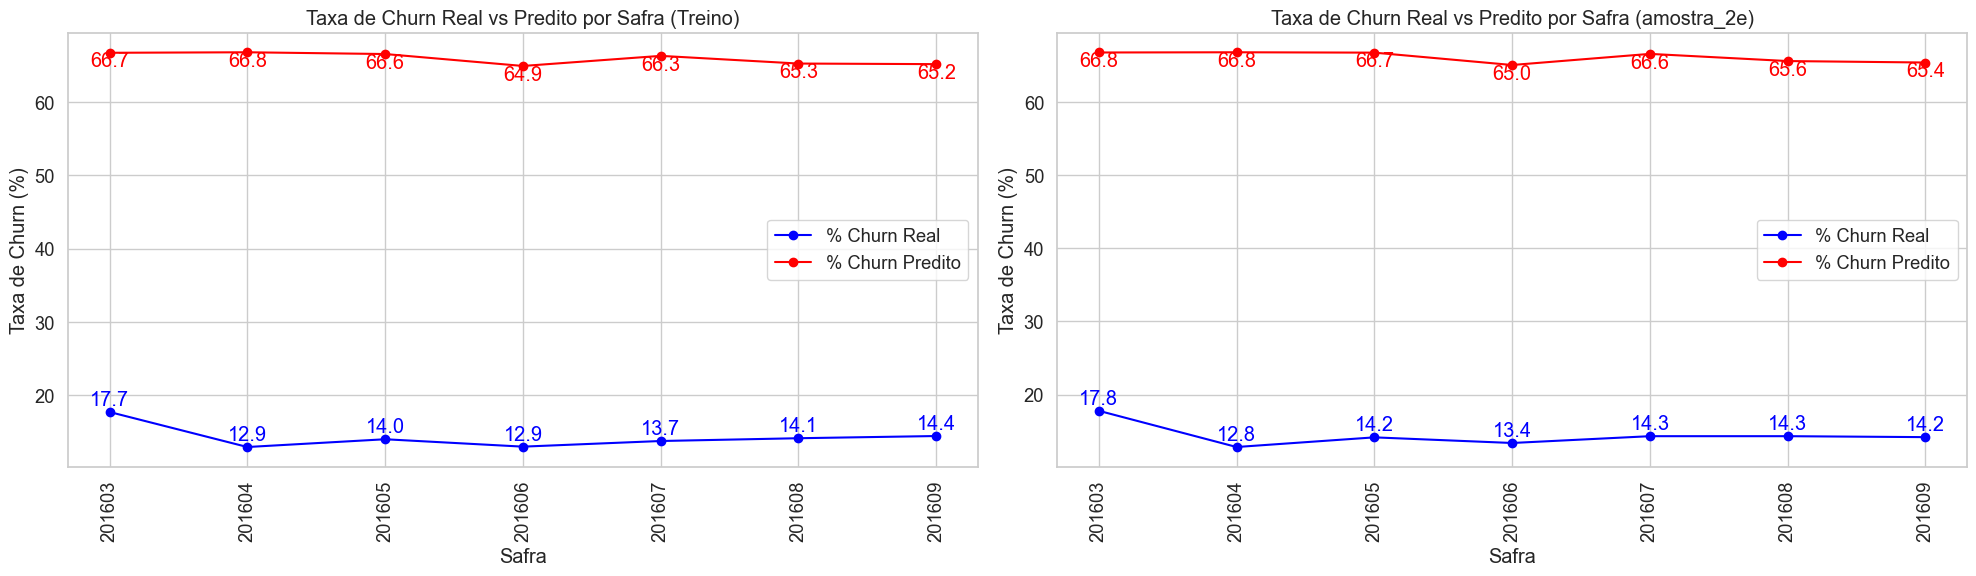

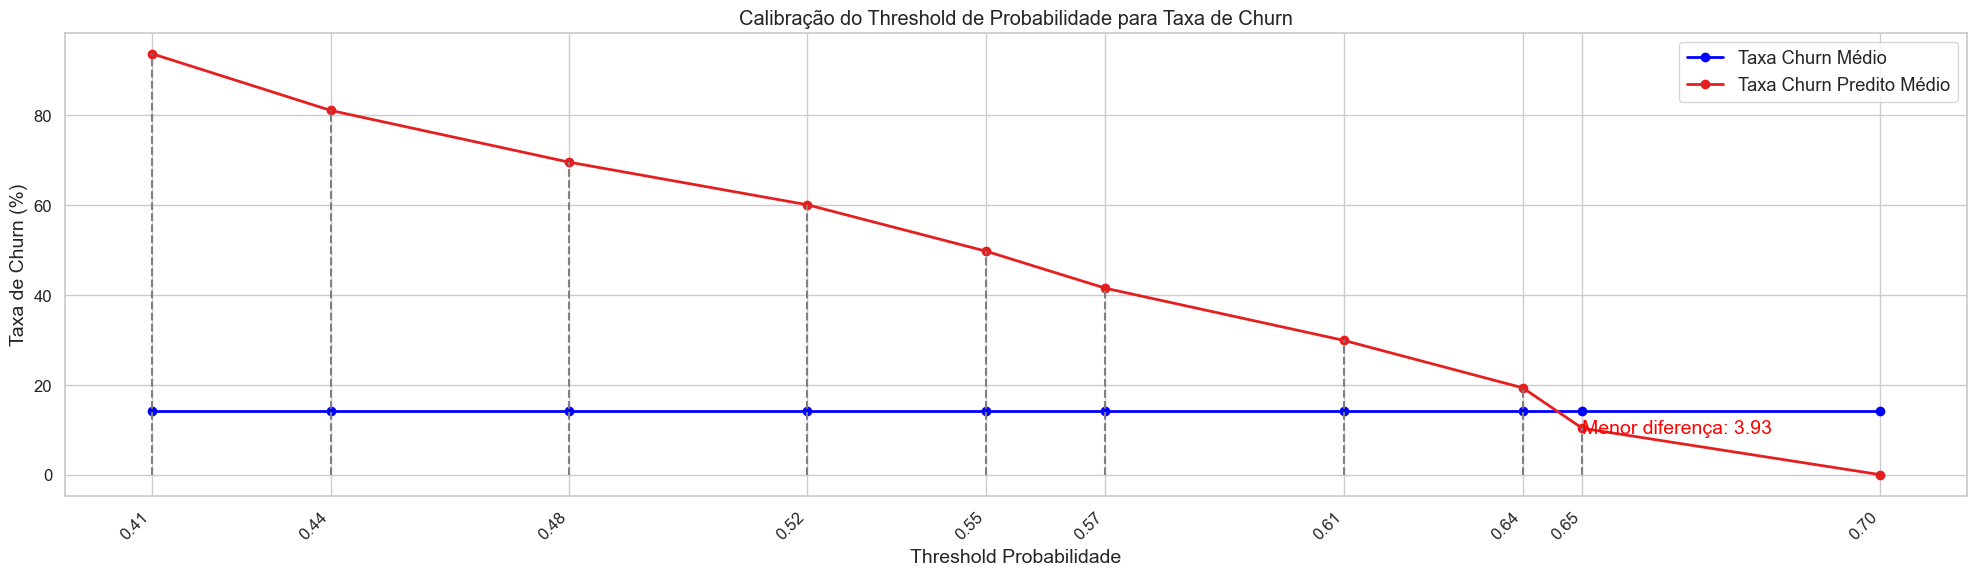

In [94]:
metricas_estabilidade('XGBoost Otimizado', x_train, y_train, y_predict_train_otimizado, y_proba_train_otimizado, x_valid, y_valid, y_predict_valid_otimizado, y_proba_train_otimizado)
calibracao_probabilidade(x_train, y_train)

# <font color='green' style='font-size: 30px;'> 7.6) Resultados Esperados - Problema 1 (Baseando no Teste + OOT)</font>
<hr style='border: 2px solid green;'>

> 1. Comparar o quanto a solução trouxe de ganho financeiro vs 3 meses gratuitos para esses clientes (como era a ideia anteriormente)

In [166]:
def metricas_estabilidade_final(classificador, df):
    df_estabilidade = df.copy()

    # Calcular taxa de churn por safra
    churn_por_safra = df_estabilidade[["msno", "safra", "churn", "churn_predict_calib"]].groupby("safra").agg({"churn":"sum", "msno":"count", "churn_predict_calib":"sum"}).reset_index()
    churn_por_safra["%churn_real_por_safra"] = round(churn_por_safra["churn"]/churn_por_safra["msno"]*100, 2)
    churn_por_safra["%churn_predito_por_safra"] = round(churn_por_safra["churn_predict_calib"]/churn_por_safra["msno"]*100, 2)

    safras = ['201603', '201604', '201605', '201606', '201607', '201608', '201609', '201610']
    metrics = {'safra': [], 'recall': [], 'ks': []}

    for safra in safras:
        # Avaliação Final
        df_safras = df.loc[df['safra'] == safra].copy()
        y_true = df_safras['churn']
        y_predict = df_safras['churn_predict_calib']
        y_predict_proba_1 = df_safras['churn_predict_proba_1'].values

        # Cálculo das métricas
        recall = recall_score(y_true, y_predict)
        fpr, tpr, _ = roc_curve(y_true, y_predict_proba_1)
        ks = max(tpr - fpr)

        # Adicionar métricas à lista
        metrics['safra'].append(safra)
        metrics['recall'].append(recall)
        metrics['ks'].append(ks)

    # Convertendo métricas em DataFrame
    metrics_df = pd.DataFrame(metrics)

    # Criando gráficos
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Gráfico de linhas para Recall e KS
    ax1.plot(metrics_df['safra'], metrics_df['recall'] * 100, marker='o', linestyle='-', color='orange', label='Recall')
    ax1.plot(metrics_df['safra'], metrics_df['ks'] * 100, marker='o', linestyle='-', color='purple', label='KS')

    # Adicionando números em cada bolinha
    for i in range(len(metrics_df)):
        ax1.annotate(f'{metrics_df["recall"].iloc[i] * 100:.2f}', 
                     (metrics_df['safra'].iloc[i], metrics_df['recall'].iloc[i] * 100), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='orange')
        ax1.annotate(f'{metrics_df["ks"].iloc[i] * 100:.2f}', 
                     (metrics_df['safra'].iloc[i], metrics_df['ks'].iloc[i] * 100), 
                     textcoords="offset points", xytext=(0,-10), ha='center', fontsize=9, color='purple')

    ax1.set_title(f'KS e Recall por Safra ({classificador})')
    ax1.set_xlabel('Safra')
    ax1.set_ylabel('Valor (%)')
    ax1.set_ylim(0, 100)  # Definindo limite do eixo Y
    ax1.legend()
    ax1.grid(True)
    ax1.set_xticks(metrics_df['safra'])
    ax1.set_xticklabels(metrics_df['safra'], rotation=45)

    # Gráfico de taxa de churn
    ax2.plot(churn_por_safra['safra'], churn_por_safra['%churn_real_por_safra'], marker='o', linestyle='-', color='blue', label='% Churn Real')
    ax2.plot(churn_por_safra['safra'], churn_por_safra['%churn_predito_por_safra'], marker='o', linestyle='--', color='red', label='% Churn Predito')

    # Adicionando as anotações
    for i in range(len(churn_por_safra)):
        ax2.annotate(f'{churn_por_safra["%churn_real_por_safra"].iloc[i]:.1f}', 
                     (churn_por_safra['safra'].iloc[i], churn_por_safra['%churn_real_por_safra'].iloc[i]), 
                     textcoords="offset points", xytext=(0,-10), ha='center', fontsize=9, color='blue')
        ax2.annotate(f'{churn_por_safra["%churn_predito_por_safra"].iloc[i]:.1f}', 
                     (churn_por_safra['safra'].iloc[i], churn_por_safra['%churn_predito_por_safra'].iloc[i]), 
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

    ax2.set_title(f'Taxa de Churn Real vs Predito por Safra ({classificador})')
    ax2.set_xlabel('Safra')
    ax2.set_ylabel('Taxa de Churn (%)')
    ax2.set_ylim(0, 100)  # Ajustar conforme necessário para a taxa de churn
    ax2.legend()
    ax2.grid(True)
    ax2.set_xticks(churn_por_safra['safra'])
    ax2.set_xticklabels(churn_por_safra['safra'], rotation=45)

    plt.tight_layout()
    plt.show()


In [167]:
def modelo_classificador_churn_oficial(df_train, df_test, df_oot, opcao):

    base_train = df_train.copy()
    base_test = df_test.copy()
    base_oot = df_oot.copy()

    # Prepara as Amostras
    base_train['tipo_amostra'] = 'train'
    base_test['tipo_amostra'] = 'test'
    base_oot['tipo_amostra'] = 'oot'
    df = pd.concat([base_train, base_test, base_oot])

    # Prepara DataFrame para Treinamento ou Escoragem
    cols = list(df.drop(['churn', 'msno', 'safra', 'tipo_amostra'], axis=1).columns)

    # Treina e Salva o Modelo
    if opcao == 'salvar':

        # df_model = df.loc[(df['tipo_amostra'] == 'train') & (~df['safra'].isin(['201601', '201602']))]
        # df_model = df.loc[(df['tipo_amostra'] == 'train') & (~df['safra'].isin(['201601', '201602', '201603', '201611']))]
        df_model = df.loc[(df['tipo_amostra'] == 'train')]

        x_model = df_model[cols].copy()
        y_model = df_model['churn'].copy()

        classificador_churn = make_pipeline(
            XGBClassifier(
                random_state=42,
                tree_method='gpu_hist',
                n_estimators=50,
                max_depth=5,
                learning_rate=0.01,
                eval_metric='logloss',
                objective='binary:logistic',
                scale_pos_weight=20,
                reg_alpha=0.73,
                reg_lambda=0.58,
                gamma=0.96,
                colsample_bytree=0.72,
                subsample=0.78,
            )
        )

        classificador_churn.fit(x_model, y_model)
        joblib.dump(classificador_churn, "../00_DataMaster/pre_processing/classificador_churn.pkl")

        return print('Modelo de Churn Treinado e Salvo com Sucesso!')

    else:
        # Carrega o Classificador e Escora para as bases de Teste e OOT
        classificador_churn = joblib.load("../00_DataMaster/pre_processing/classificador_churn.pkl")
        df_scoring = df.loc[df['tipo_amostra'].isin(['test', 'oot'])].copy()
        df_scoring['churn_predict'] = classificador_churn.predict(df_scoring[cols])
        df_scoring['churn_predict_proba_0'] = classificador_churn.predict_proba(df_scoring[cols])[:, 0]
        df_scoring['churn_predict_proba_1'] = classificador_churn.predict_proba(df_scoring[cols])[:, 1]
        df_scoring['churn_predict_calib'] = np.where(df_scoring['churn_predict_proba_1'] <= 0.64, 0, 1)
        df_scoring = df_scoring[['tipo_amostra', 'msno', 'safra', 'churn', 'churn_predict', 'churn_predict_calib', 'churn_predict_proba_0', 'churn_predict_proba_1']]

        return df_scoring


Modelo de Churn Treinado e Salvo com Sucesso!


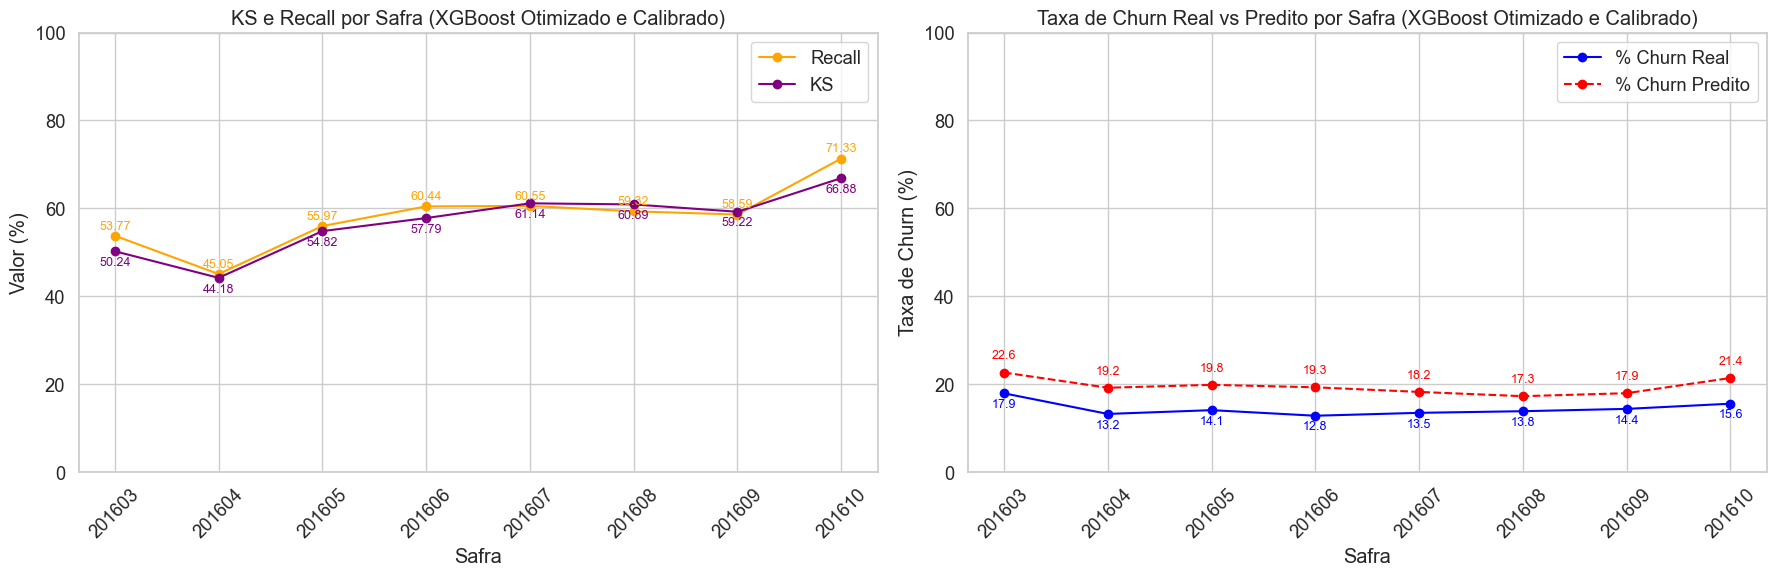

In [168]:
# Treinando o Modelo
modelo_classificador_churn_oficial(df_train, df_test, df_oot, 'salvar')

# Escorando o Modelo para a Base Final
df_analise_final = modelo_classificador_churn_oficial(df_train, df_test, df_oot, 'escoragem')

# Avaliação Final
metricas_estabilidade_final(
    'XGBoost Otimizado e Calibrado', 
    df_analise_final
)



<font color='red' style='font-size: 40px;'> 8) Modelagem (Foco em Aprendizado Não-Supervisionado) </font>
<hr style='border: 2px solid red;'>